## Influence of hardware on Input Sensitivity



In [1]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans
# get interactions of features
from sklearn.preprocessing import PolynomialFeatures


# we use it to interact with the file system
import os
# compute time
from time import time

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# no warning
import warnings
warnings.filterwarnings("ignore")

### Import data

In [27]:
data_dir = "./data/"

data = dict()

inputs_perf = ['size', 'etime', 'fps', 'kbs']

inputs_feat = ["cabac", "ref", "deblock", "analyse", "me", "subme", "mixed_ref", "me_range", "trellis", 
                "8x8dct", "fast_pskip", "chroma_qp_offset", "bframes", "b_pyramid", "b_adapt", "direct", 
                "weightb", "open_gop", "weightp", "scenecut", "rc_lookahead", "mbtree", "qpmax", "aq-mode"]

inputs_categ = ['analyse', 'me', 'direct', 'deblock', 'b_adapt', 'b_pyramid', 
                        'open_gop', 'rc_lookahead', 'scenecut', 'weightb']

inputs_num = np.setdiff1d(inputs_feat, inputs_categ)

files = os.listdir(data_dir+'1')
files.remove("lscpu.txt")

inputs_names = dict()

for i in range(len(files)):
    f = files[i]
    inputs_names[i] = f

inputs_count = len(files)

hard_count = 30

for index_hard in range(hard_count):
    
    data_path = data_dir+str(index_hard+1)+'/'
    
    for index_input in range(inputs_count):
        
        path_input = files[index_input]
        
        df = pd.read_csv(data_path+path_input)
        data[index_hard, 
             index_input] = df[inputs_num].join(pd.get_dummies(df[inputs_categ])).join(df[inputs_perf])

In [28]:
data[2,1]

,8x8dct,aq-mode,bframes,cabac,chroma_qp_offset,fast_pskip,mbtree,me_range,mixed_ref,qpmax,...,rc_lookahead_None,scenecut_0,scenecut_40,scenecut_None,weightb_1,weightb_None,size,etime,fps,kbs
0,0,0,0,0,0,1,0,16,0,69,...,1,1,0,0,0,1,1661679,0.762,3474.88,664.67
1,1,1,3,1,0,1,0,16,0,69,...,1,0,1,0,1,0,1264942,1.554,2355.64,505.98
2,0,0,0,0,0,1,0,16,0,69,...,1,1,0,0,0,1,1119763,1.197,3148.37,447.91
3,1,1,8,1,0,1,1,16,1,69,...,0,1,0,0,1,0,860344,3.132,658.73,344.14
4,1,0,8,1,0,1,1,16,1,69,...,0,1,0,0,1,0,561359,2.533,769.59,224.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,1,3,1,0,1,1,16,0,69,...,0,0,1,0,1,0,714175,3.734,939.38,285.67
197,1,1,3,1,0,1,1,16,1,69,...,0,0,1,0,1,0,688365,2.837,828.04,275.35
198,1,1,3,1,0,1,1,24,0,69,...,0,0,1,0,1,0,692025,2.321,1367.77,276.81
199,1,1,3,1,-2,0,1,16,1,69,...,0,0,1,0,1,0,997535,3.652,910.64,399.01


In [29]:
data[1,1]

,8x8dct,aq-mode,bframes,cabac,chroma_qp_offset,fast_pskip,mbtree,me_range,mixed_ref,qpmax,...,rc_lookahead_None,scenecut_0,scenecut_40,scenecut_None,weightb_1,weightb_None,size,etime,fps,kbs
0,0,0,0,0,0,1,0,16,0,69,...,1,1,0,0,0,1,1661679,0.817,4795.63,664.67
1,1,1,3,1,0,1,0,16,0,69,...,1,0,1,0,1,0,1264942,1.504,2982.92,505.98
2,0,0,0,0,0,1,0,16,0,69,...,1,1,0,0,0,1,1119763,1.282,3846.82,447.91
3,1,1,8,1,0,1,1,16,1,69,...,0,1,0,0,1,0,858960,3.485,605.77,343.58
4,1,0,8,1,0,1,1,16,1,69,...,0,1,0,0,1,0,561426,2.811,731.67,224.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,1,3,1,0,1,1,16,0,69,...,0,0,1,0,1,0,714845,4.338,850.82,285.94
197,1,1,3,1,0,1,1,16,1,69,...,0,0,1,0,1,0,689529,3.151,733.81,275.81
198,1,1,3,1,0,1,1,24,0,69,...,0,0,1,0,1,0,691967,2.506,1289.17,276.79
199,1,1,3,1,-2,0,1,16,1,69,...,0,0,1,0,1,0,996863,4.043,833.07,398.75


## Correlations between inputs

In [30]:
def plot_correlationmatrix_dendogram(index_hardware, dim):
    # index_hardware : the index of the hardware
    # dim : dimension
    # output : a plot of an ordered correlogram of the different compile-time options

    corr = [[0 for x in range(inputs_count)] for y in range(inputs_count)]

    for i in range(inputs_count):
        for j in range(inputs_count):
            # A distribution of bitrates will have a correlaiton of 1 with itself
            if (i == j):
                corr[i][j] = 1
            else:
                # we compute the Spearman correlation between the input video i and the input video j
                corr[i][j] = sc.spearmanr(data[index_hardware, i][dim],
                                          data[index_hardware, j][dim]).correlation

    # we transform our matrix into a dataframe
    df = pd.DataFrame(corr)
    # we replace nan correlations (with a distribution whose values are all equal to 0)
    df = df.fillna(0)

    # group the videos, we choose the ward method 
    # single link method (minimum of distance) leads to numerous tiny clusters
    # centroid or average tend to split homogeneous clusters
    # and complete link aggregates unbalanced groups. 
    links = linkage(df, method="ward",)
    order = leaves_list(links)
    
    # Generate a mask for the upper triangle
    # we order the correlation following the aggregation clustering
    mask = np.zeros_like(corr, dtype=np.bool)

    for i in range(inputs_count):
        for j in range(inputs_count):    
            if i>j:
                mask[order[i]][order[j]] = True
    
    # compute the actual clustermap
    g = sns.clustermap(df, cmap="vlag", mask=mask, method="ward",
                   linewidths=0, figsize=(13, 13), 
                   cbar_kws={"ticks":[k/5 for k in np.arange(-10,10,1)]}, 
                   vmin =-1)
    g.ax_heatmap.set_yticklabels([])
    g.ax_heatmap.set_xticklabels([])
    g.ax_heatmap.tick_params(right=False, bottom=False)
    # abcissa and ordered labels
    g.ax_heatmap.set_xlabel("Inputs", fontsize = 18)
    g.ax_heatmap.set_ylabel("Inputs", fontsize = 18)
    # we show the graph
    plt.show()

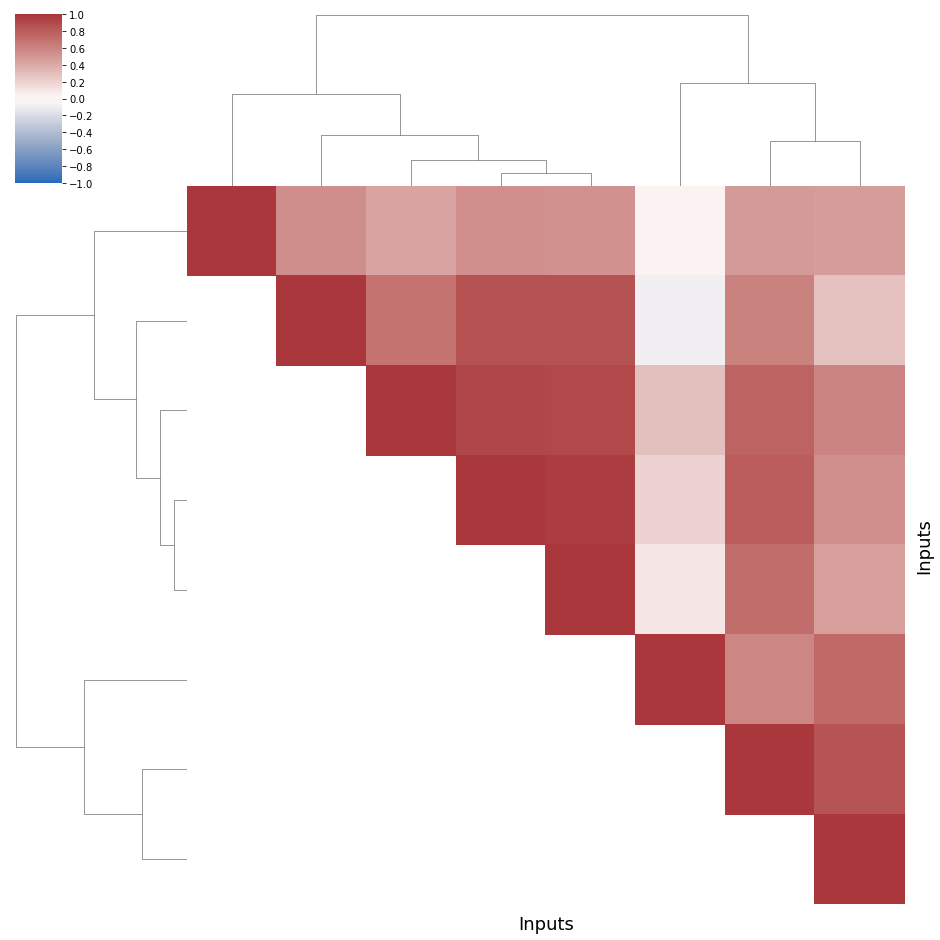

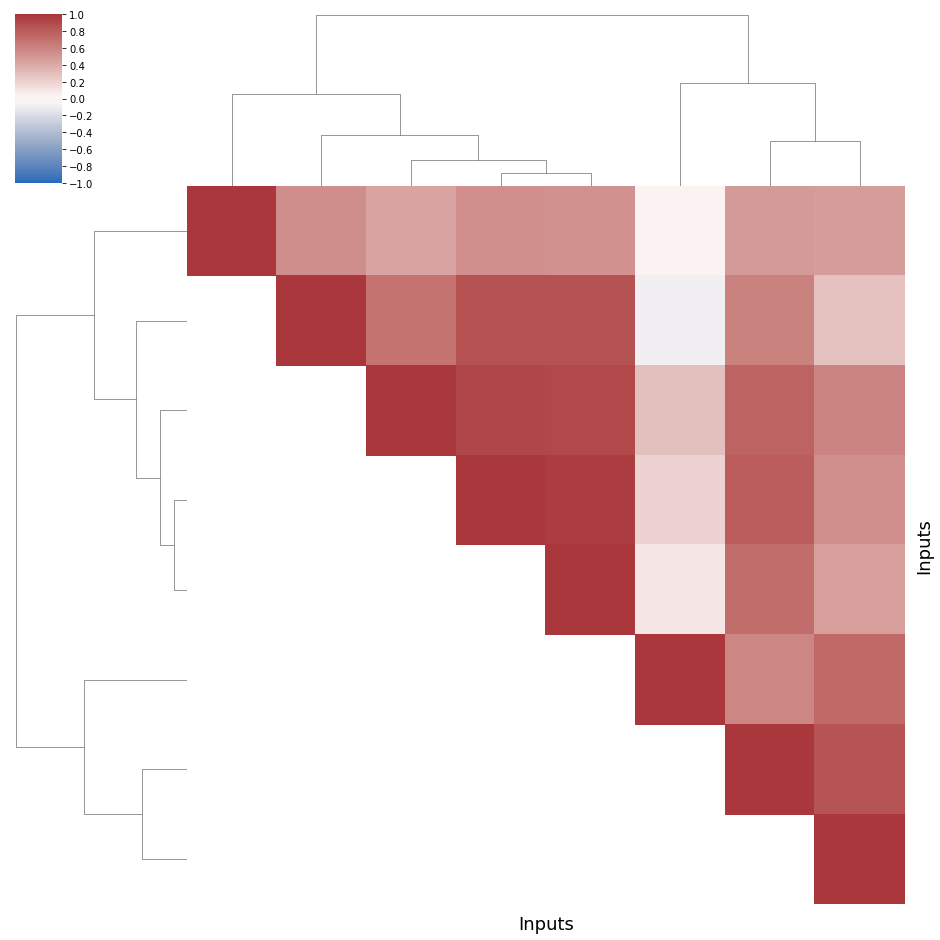

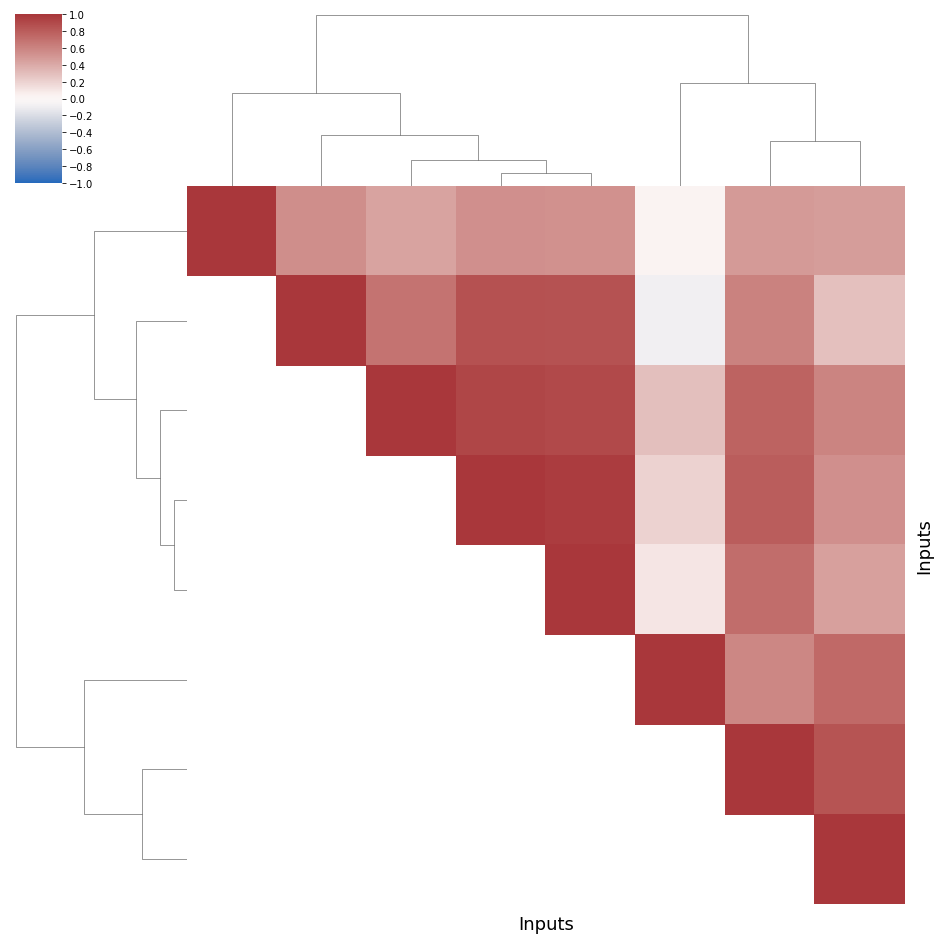

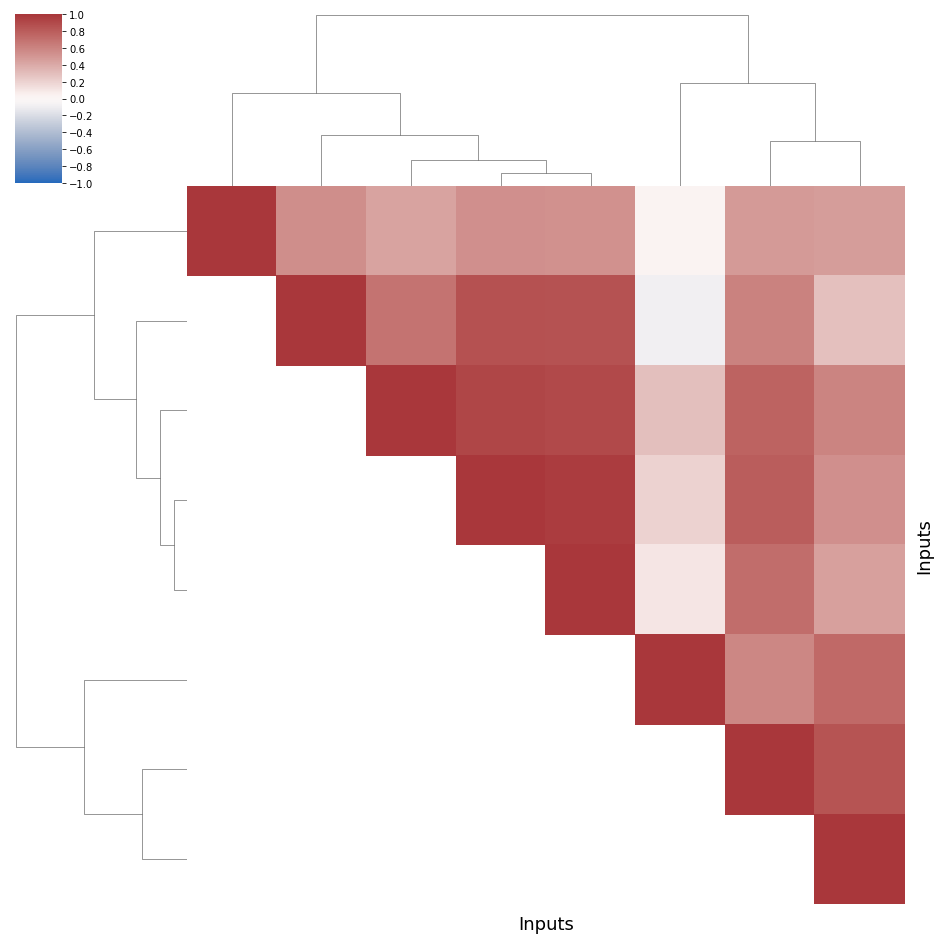

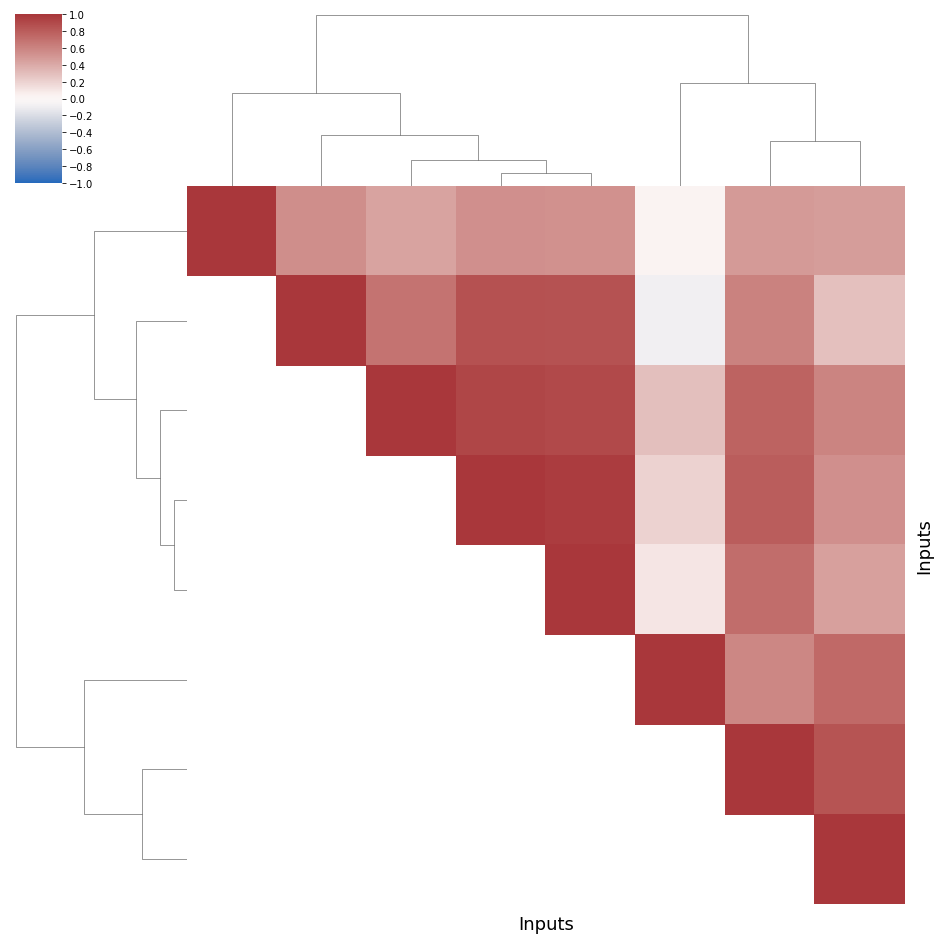

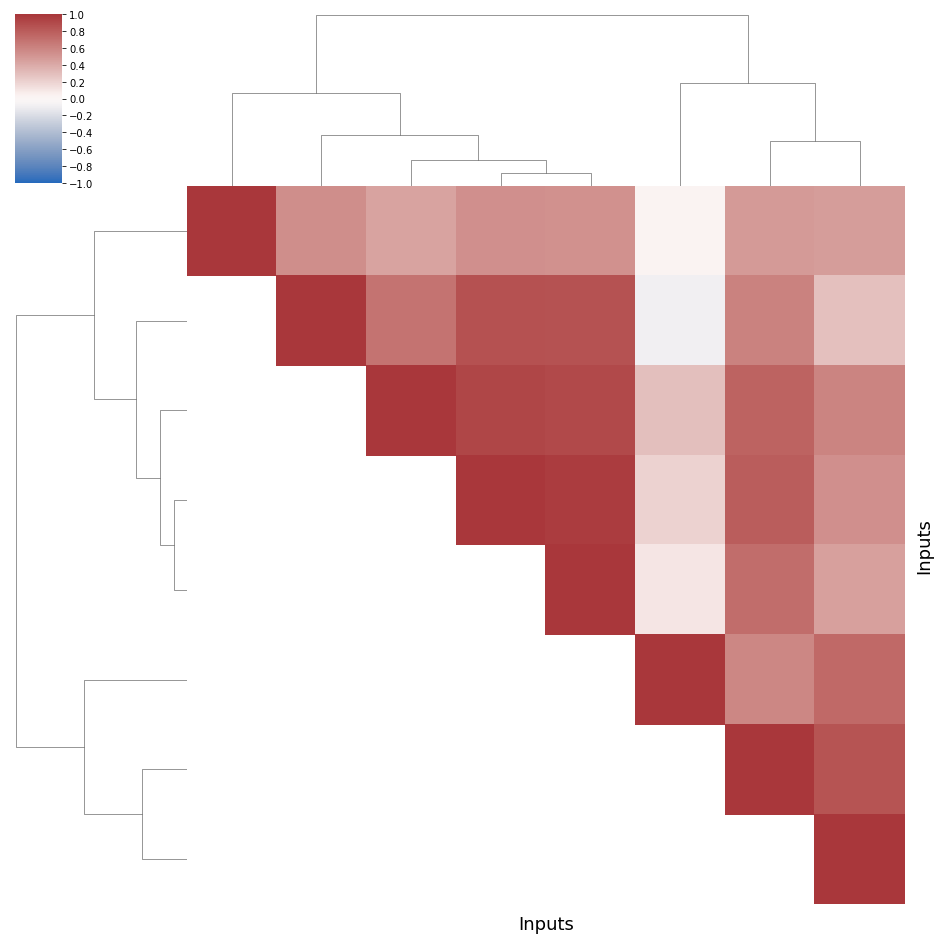

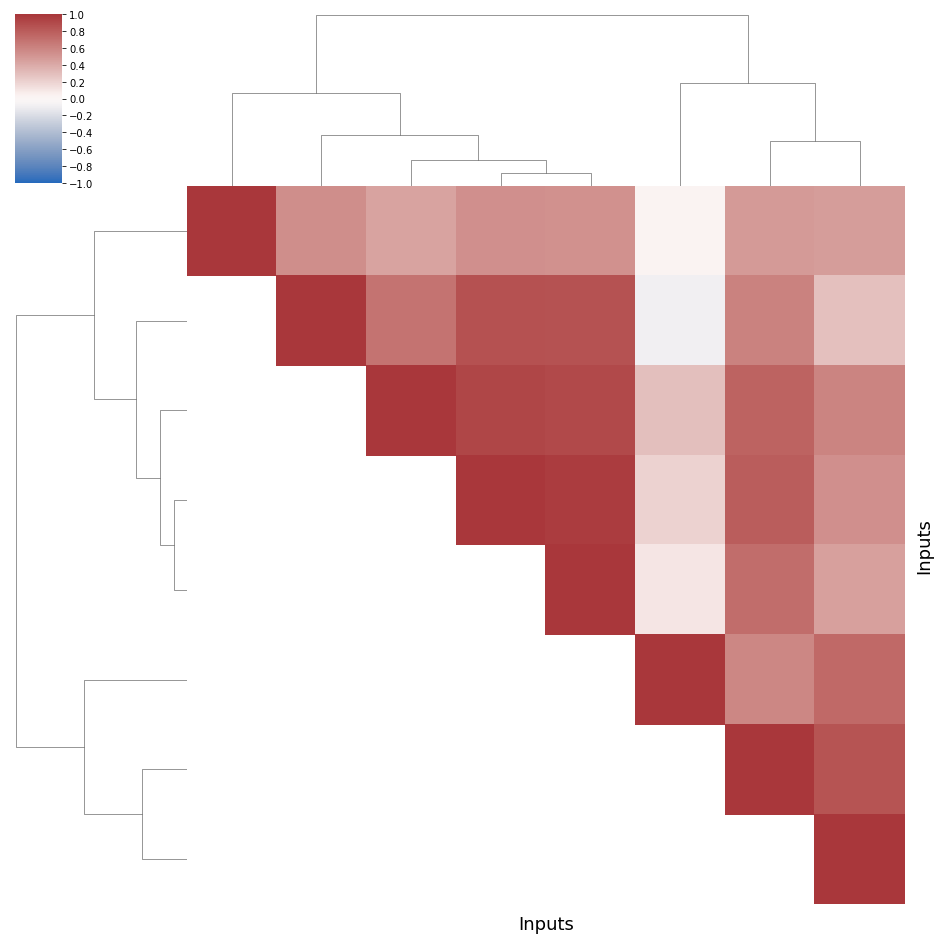

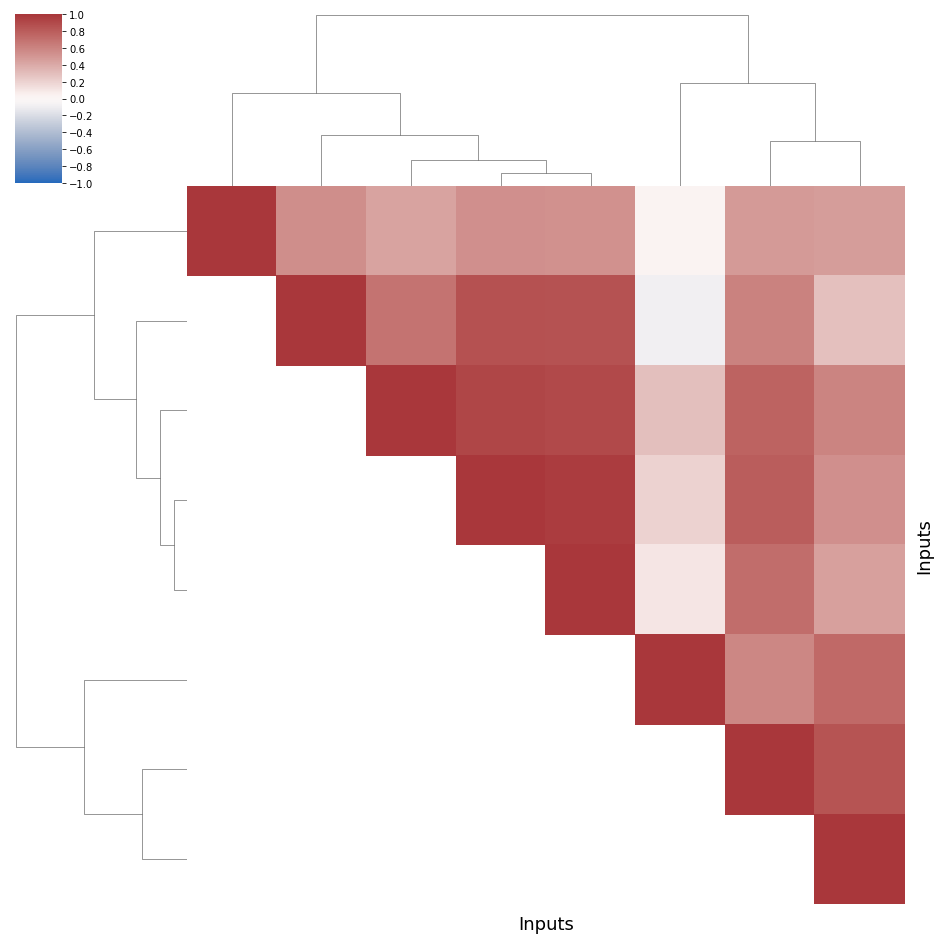

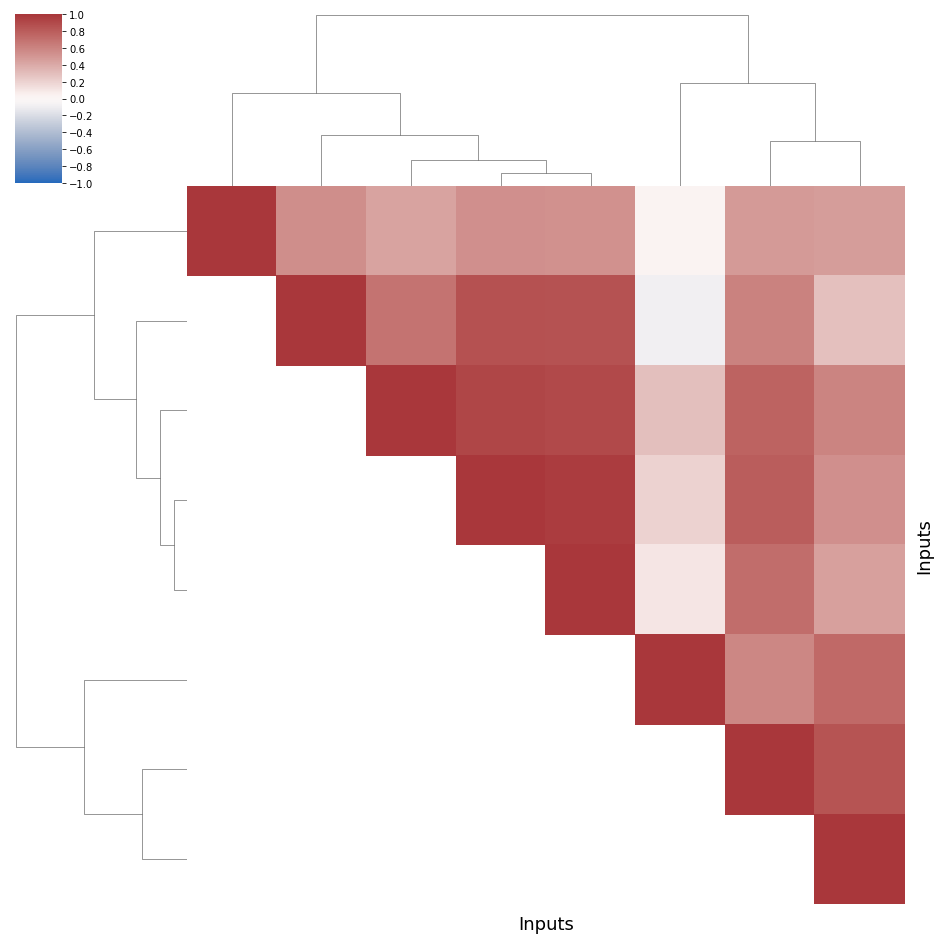

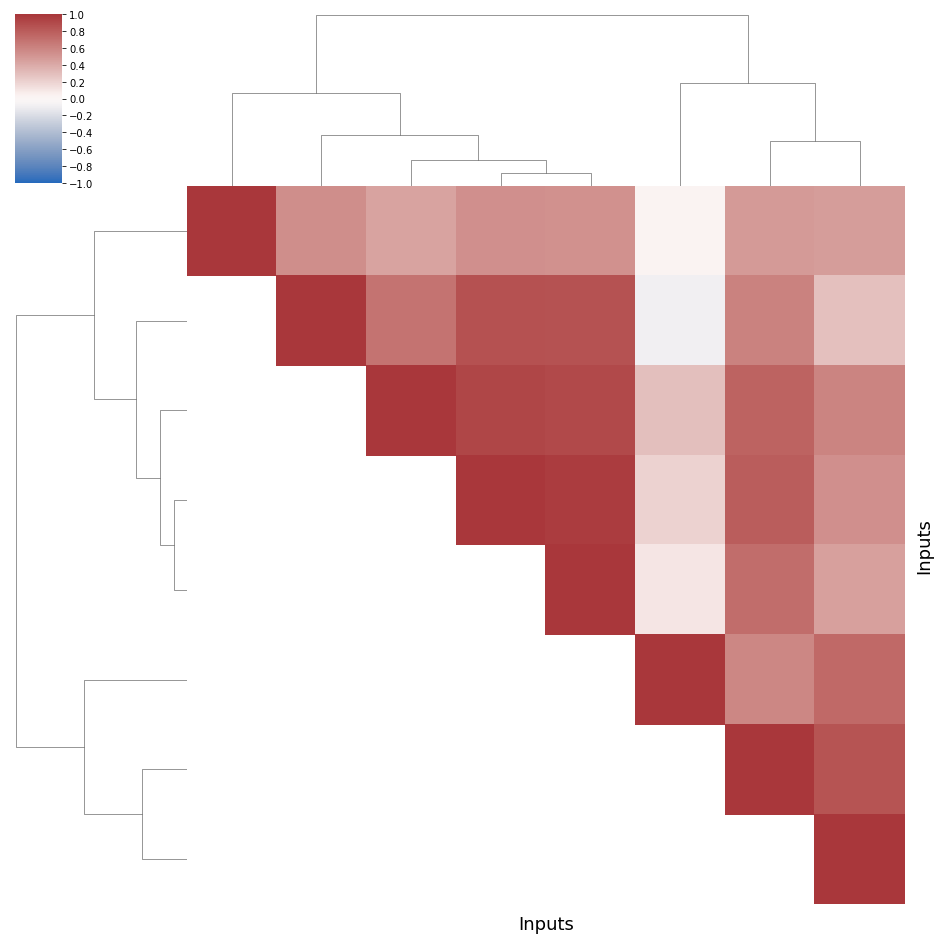

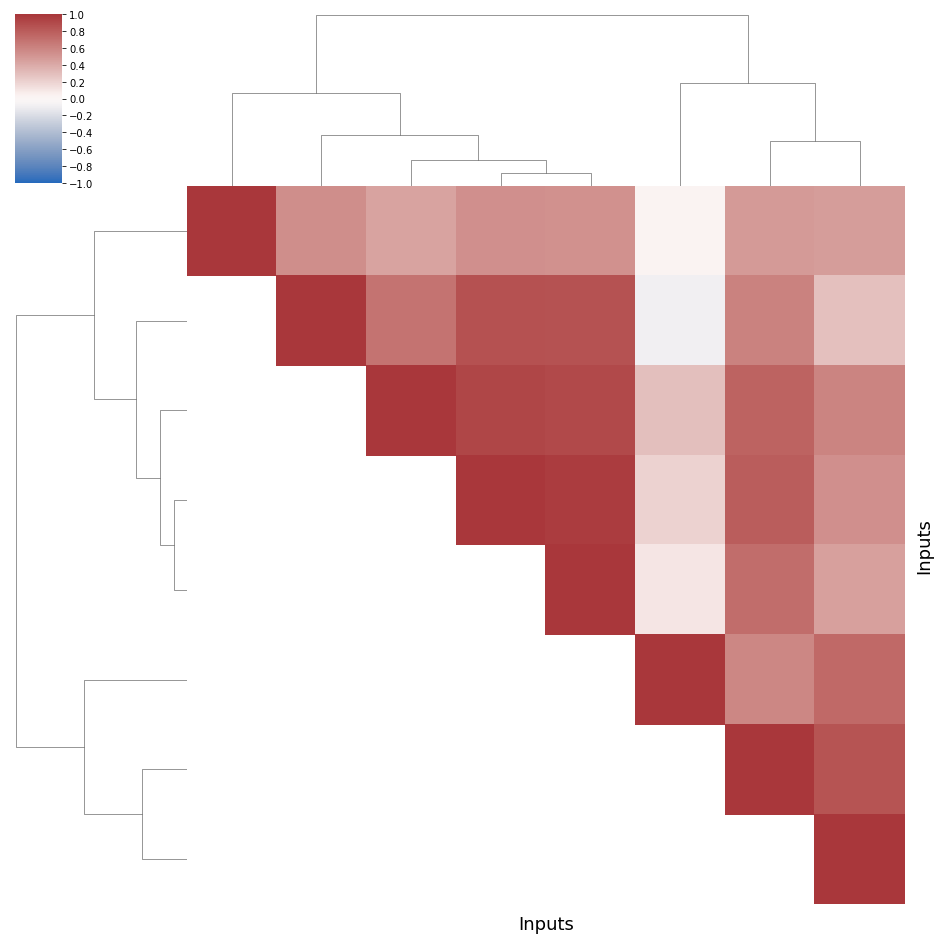

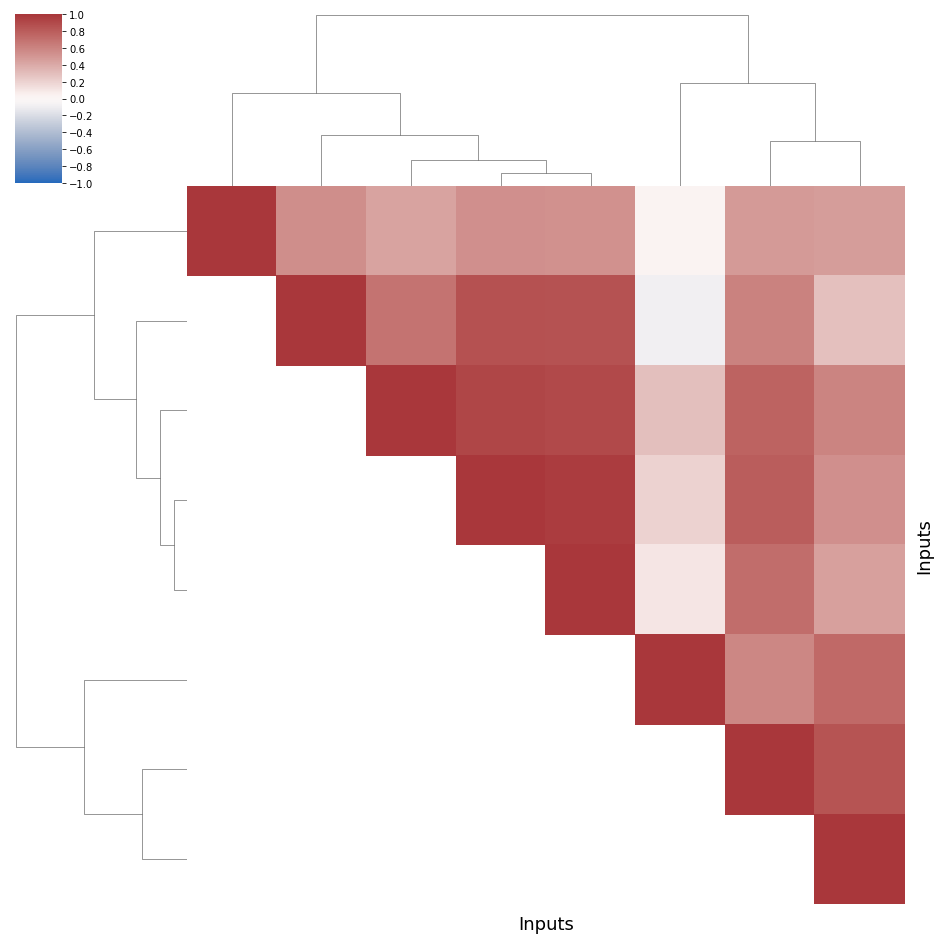

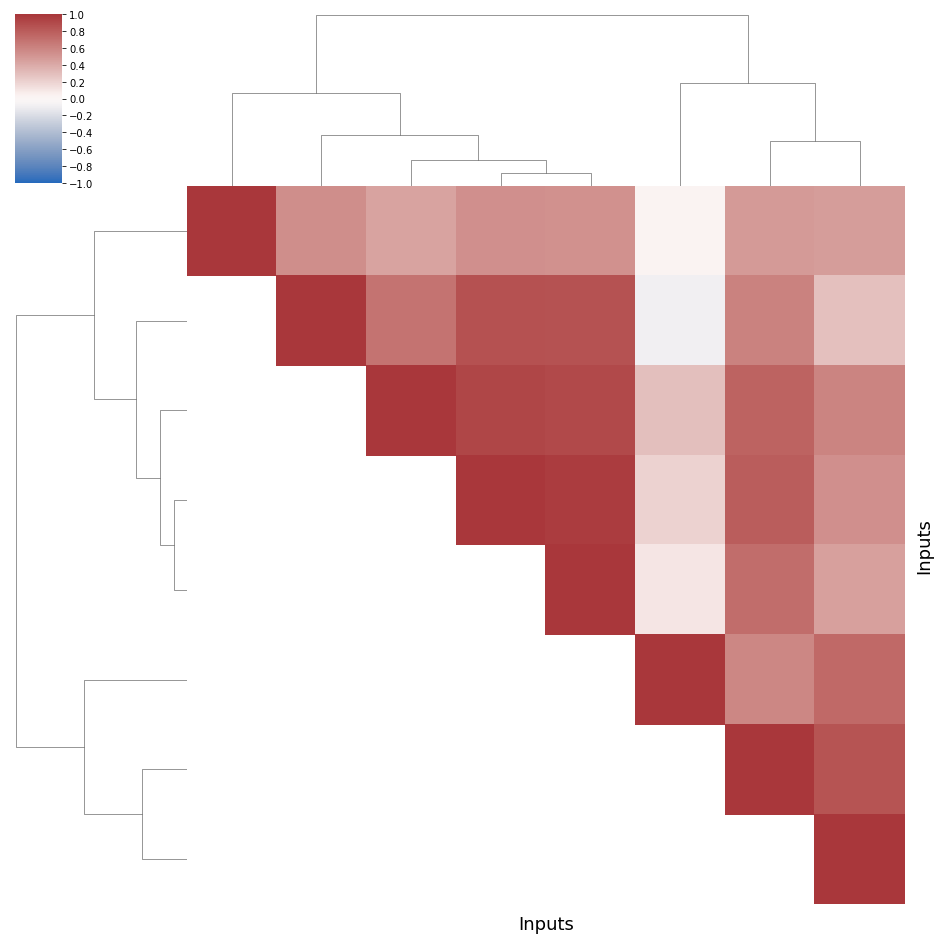

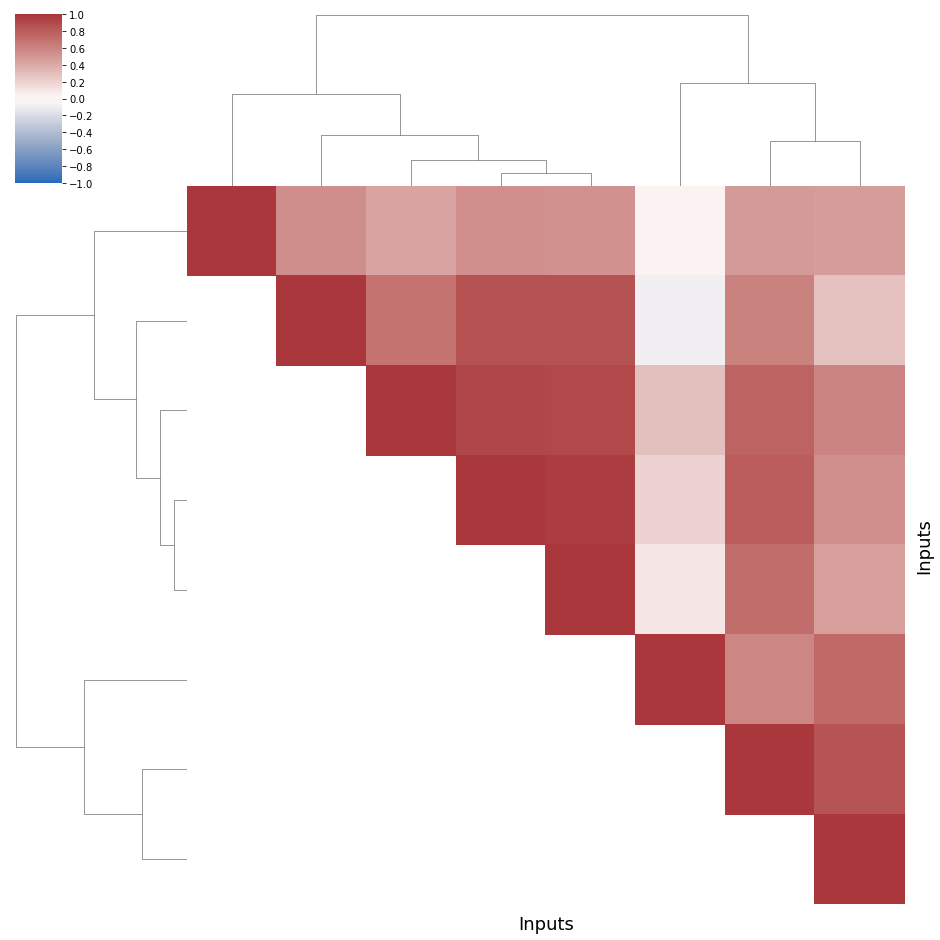

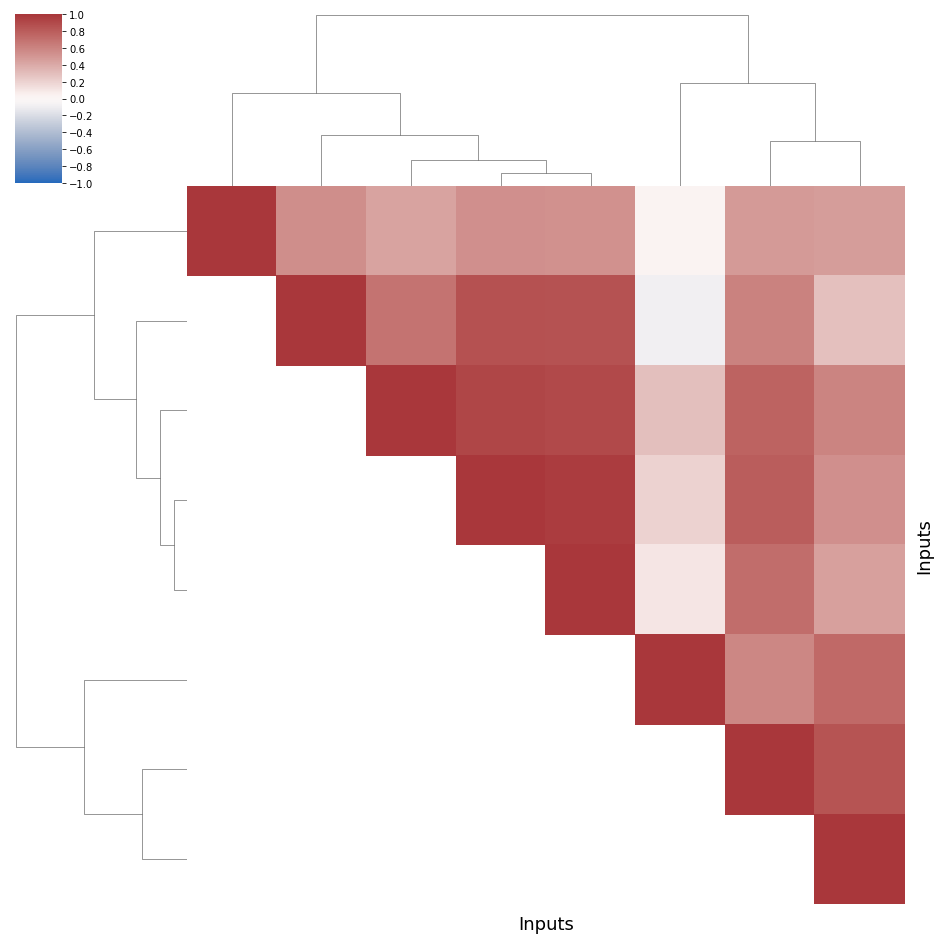

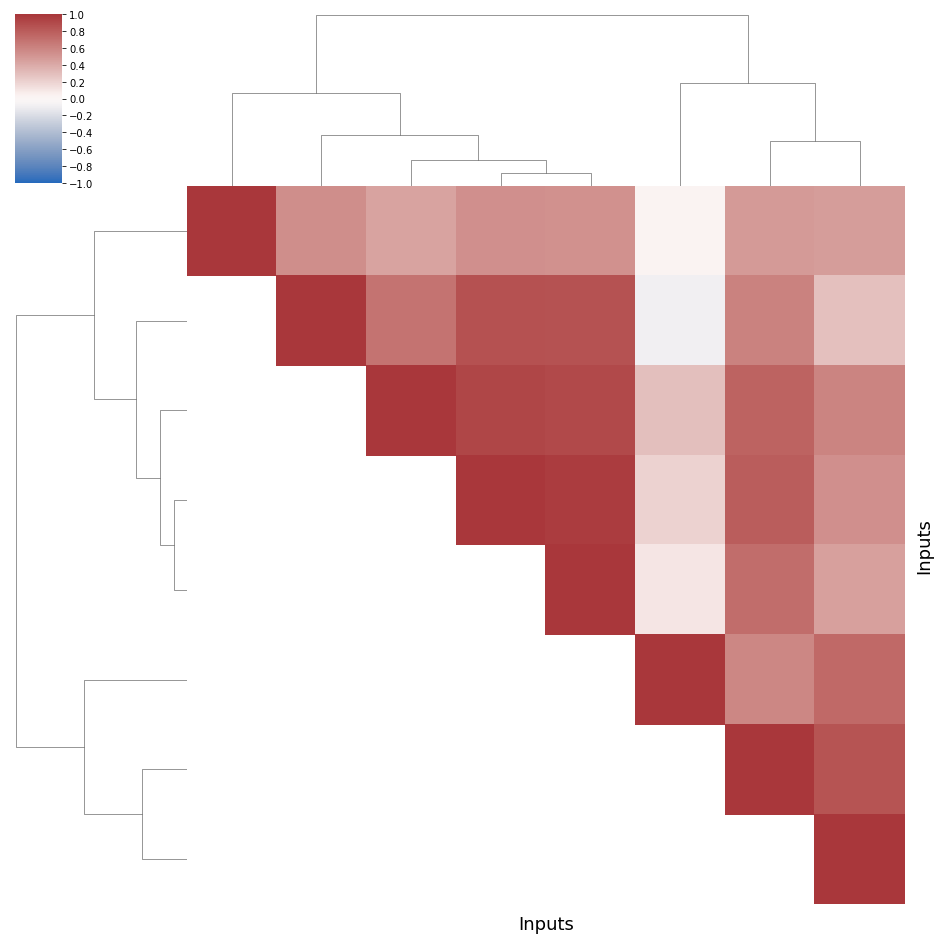

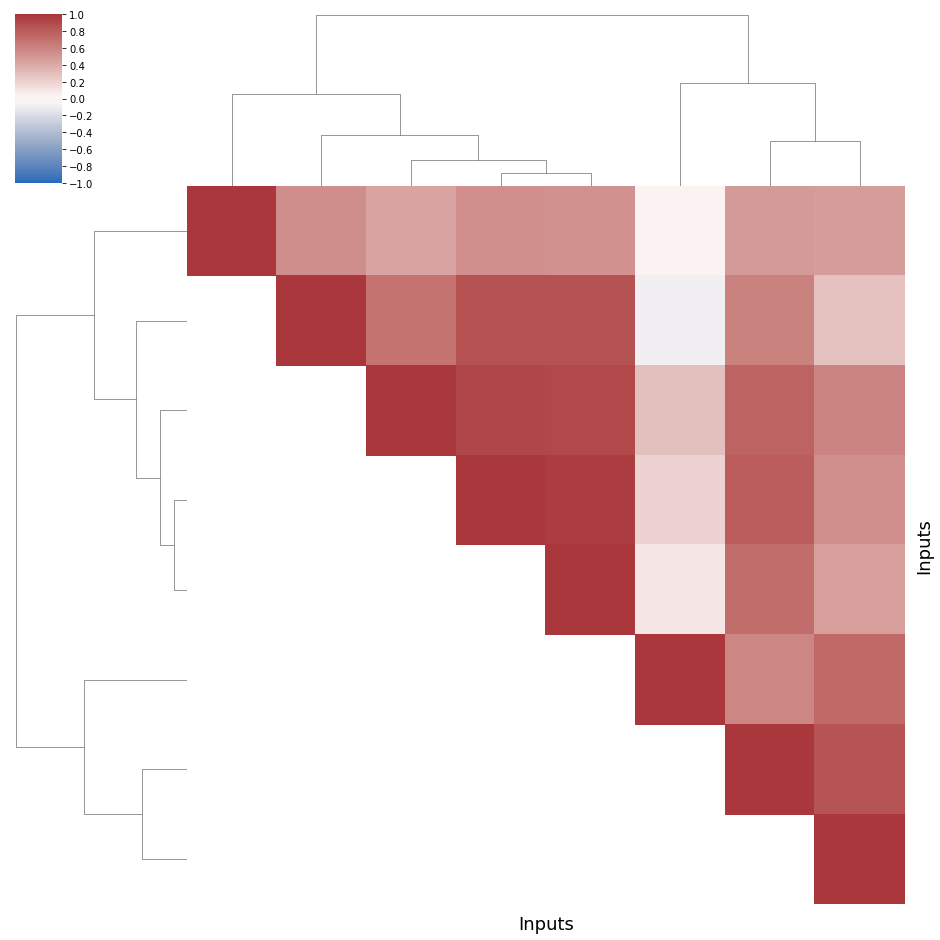

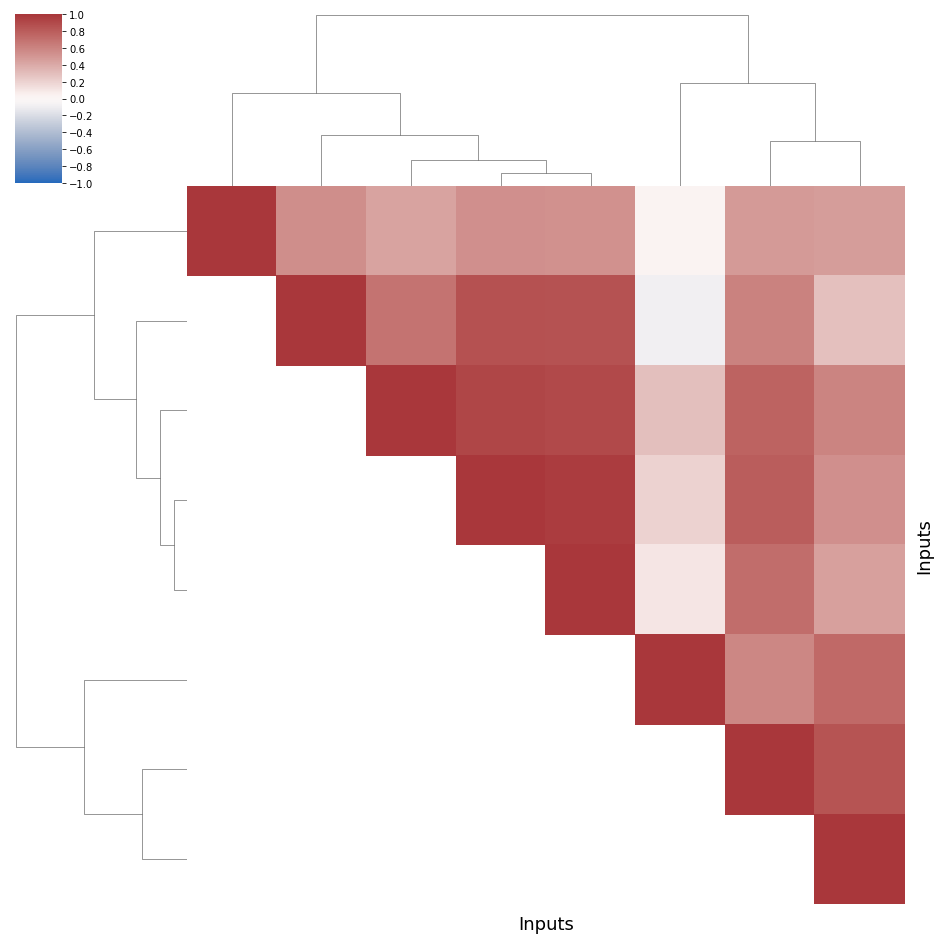

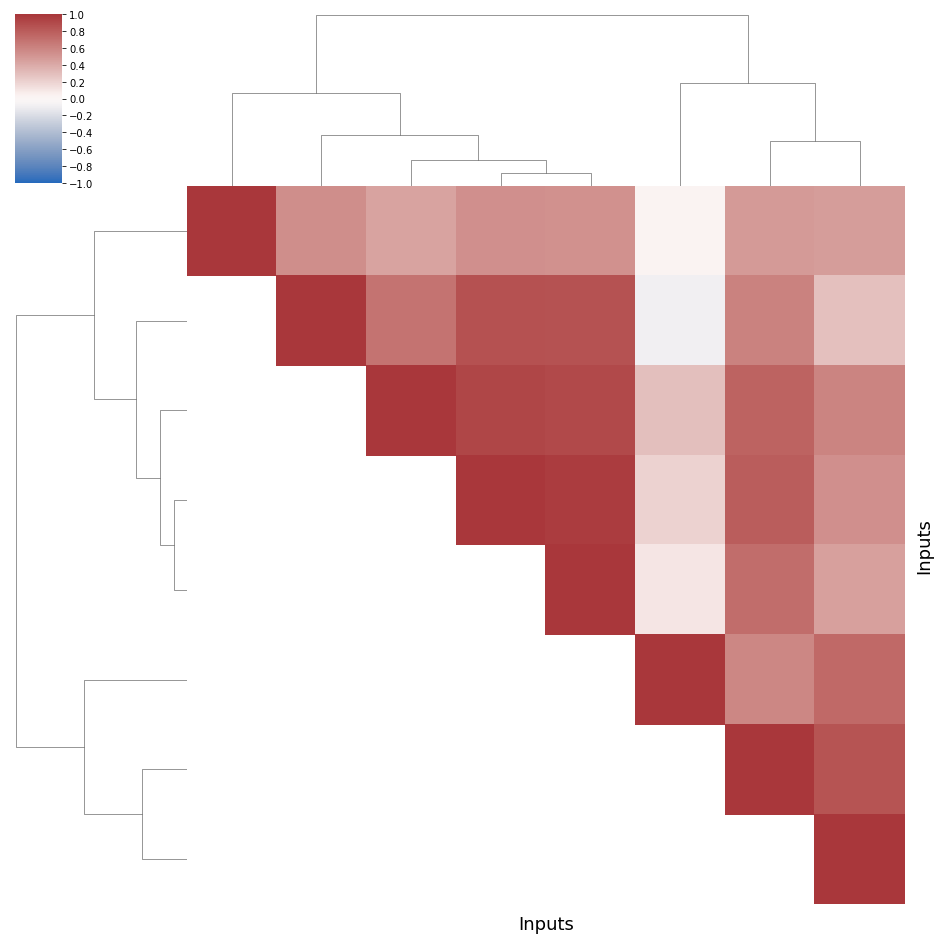

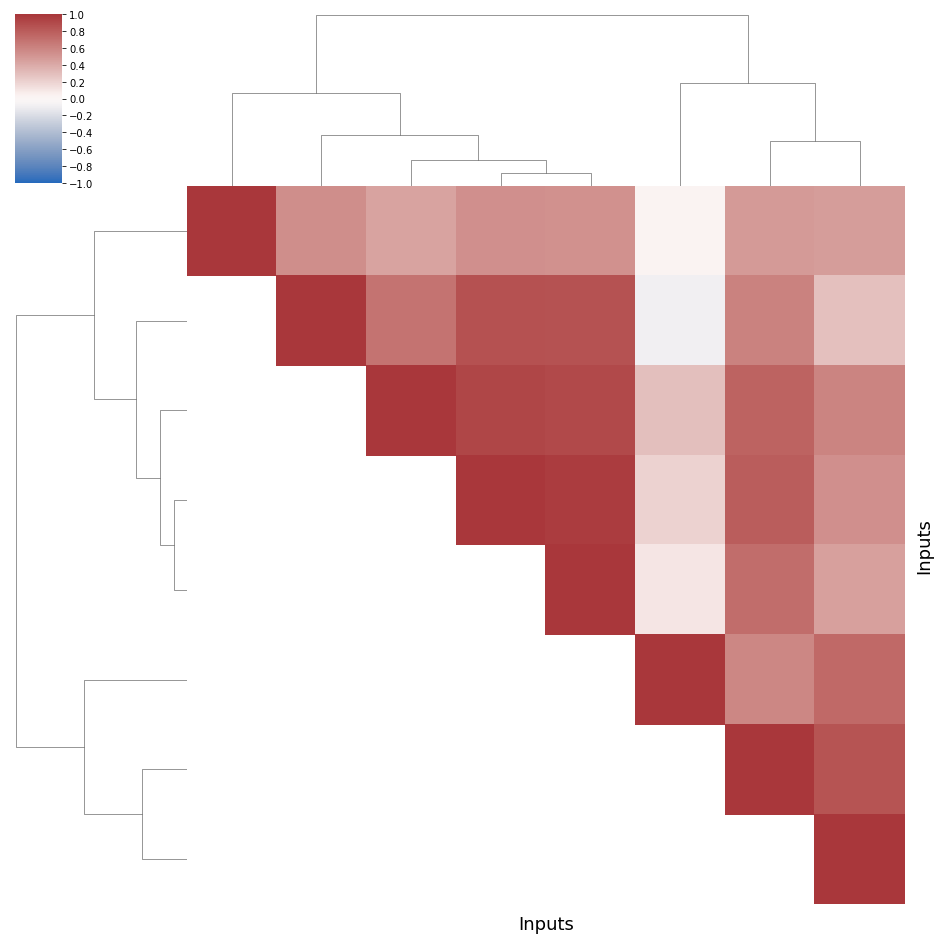

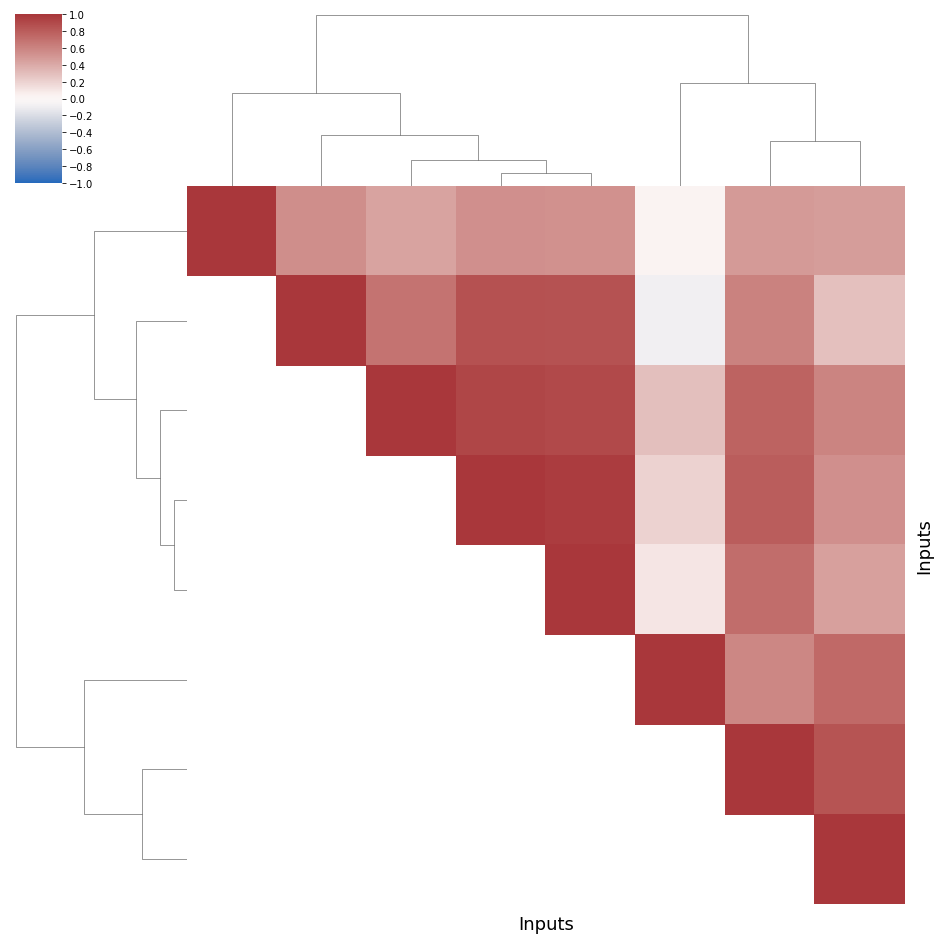

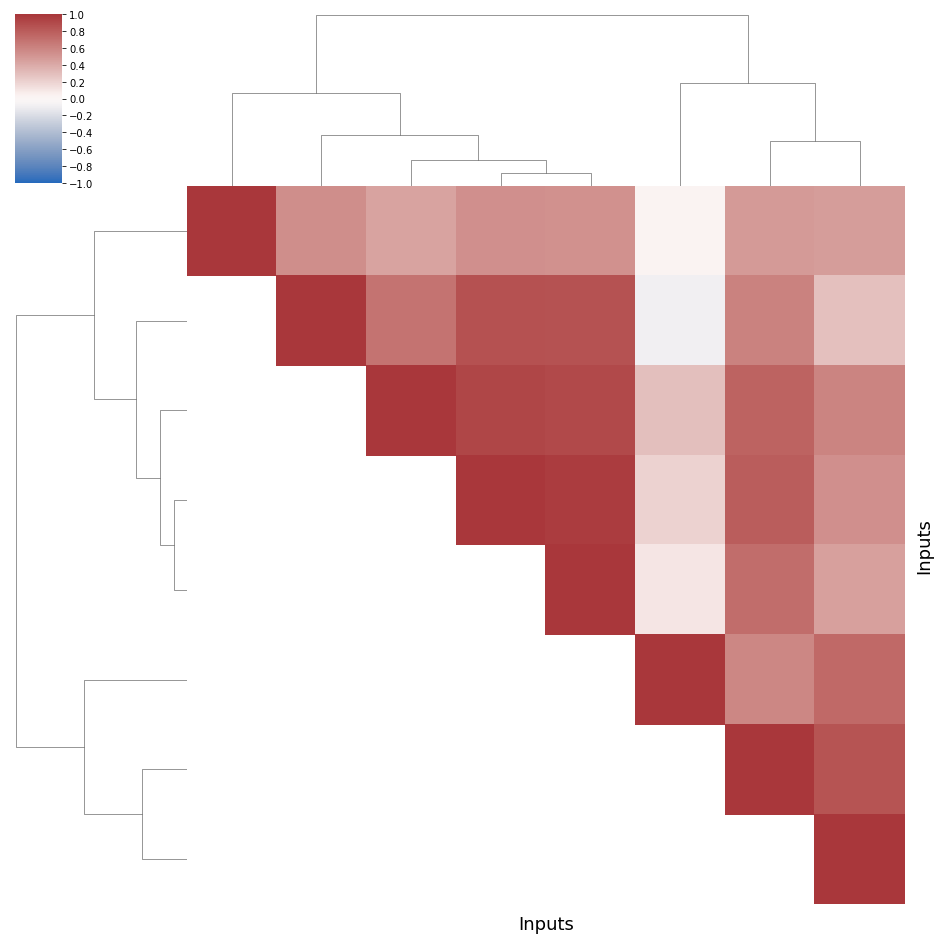

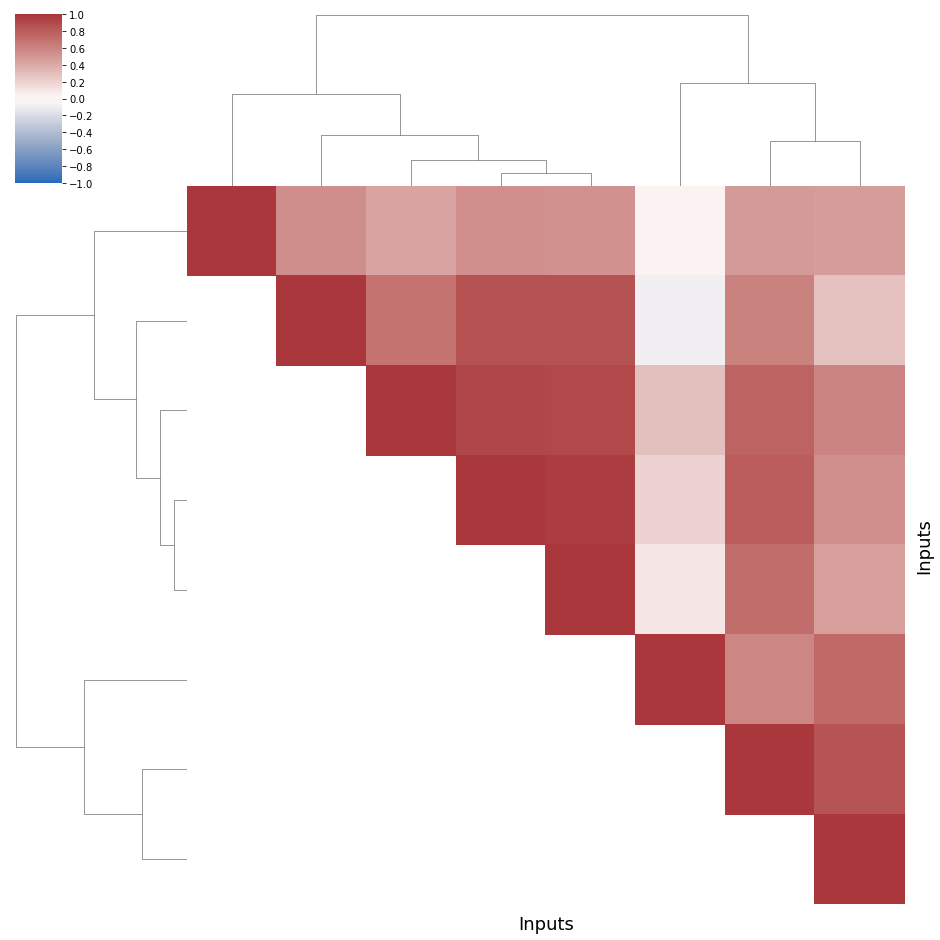

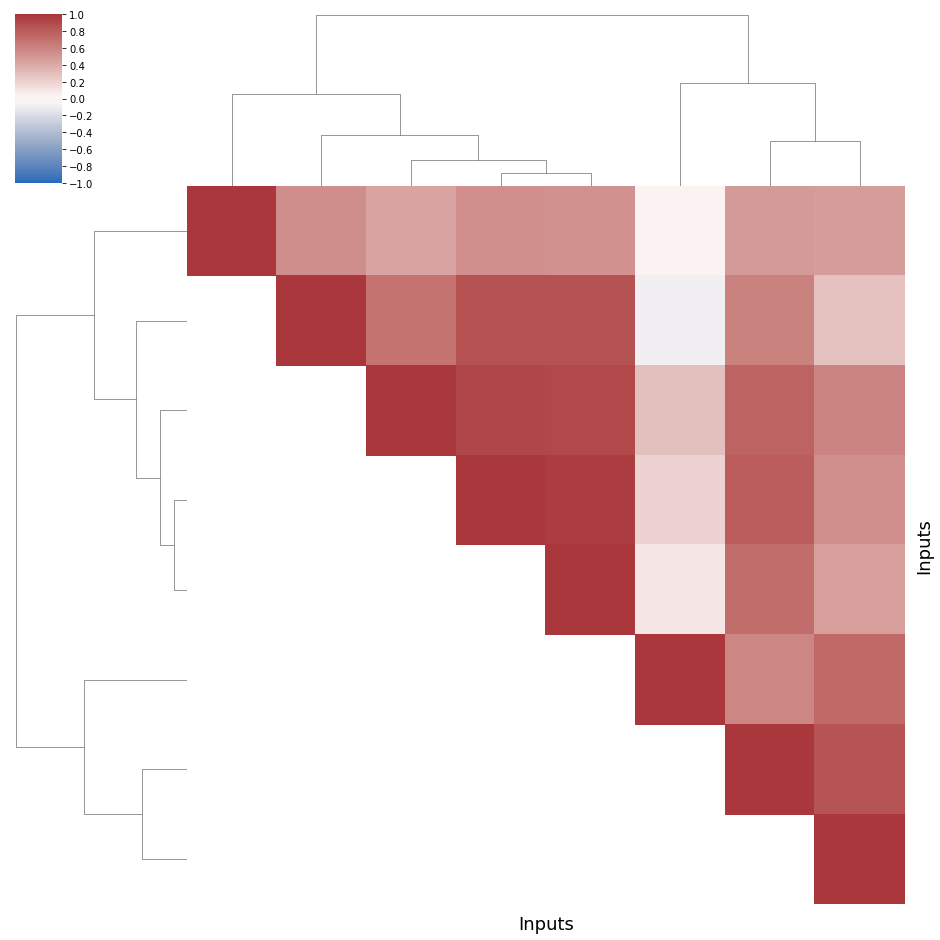

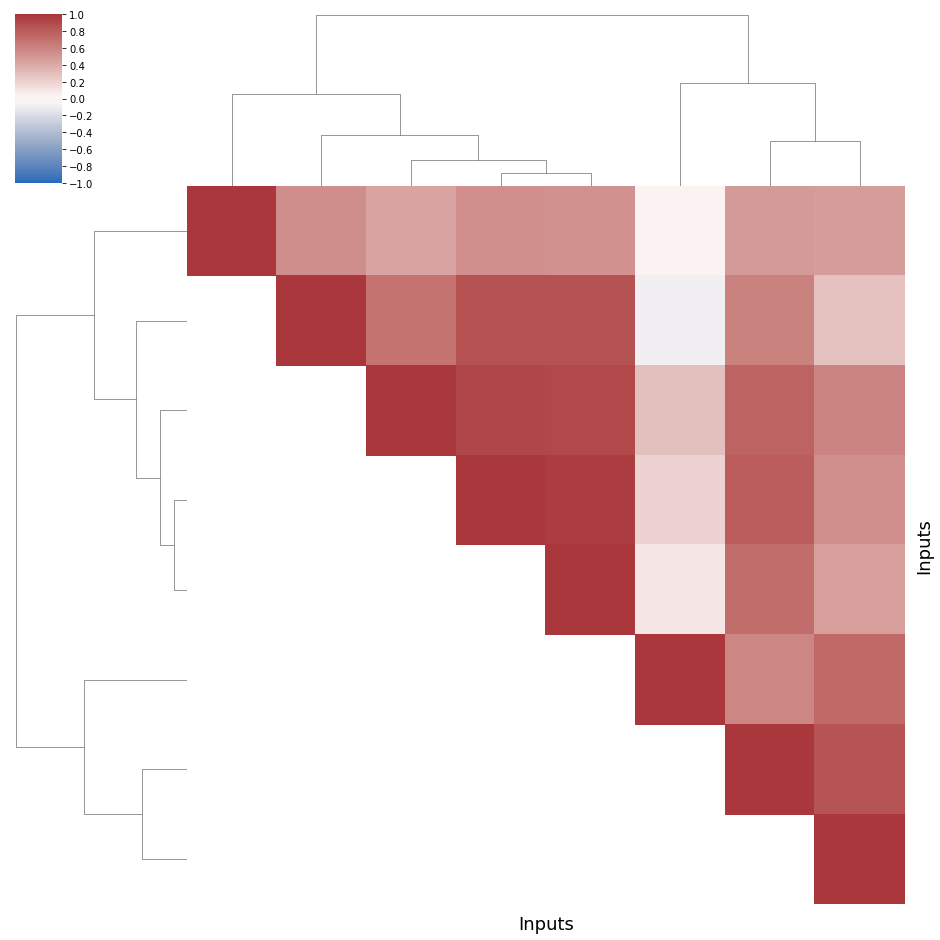

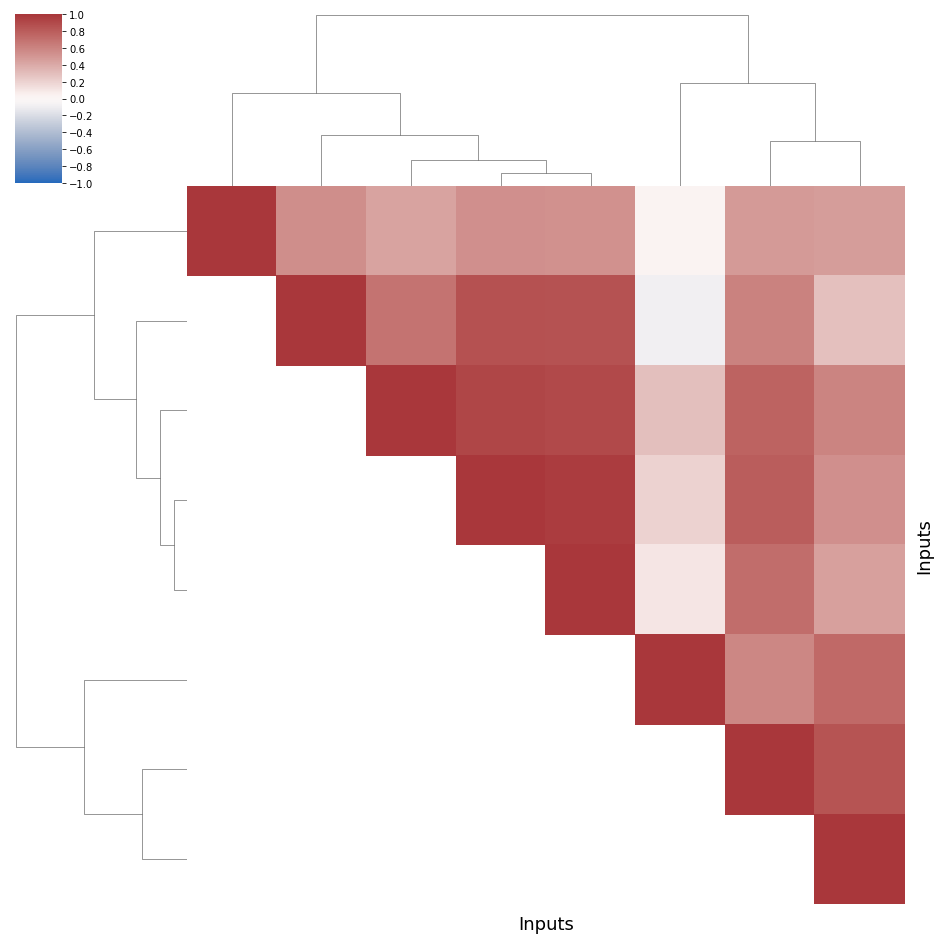

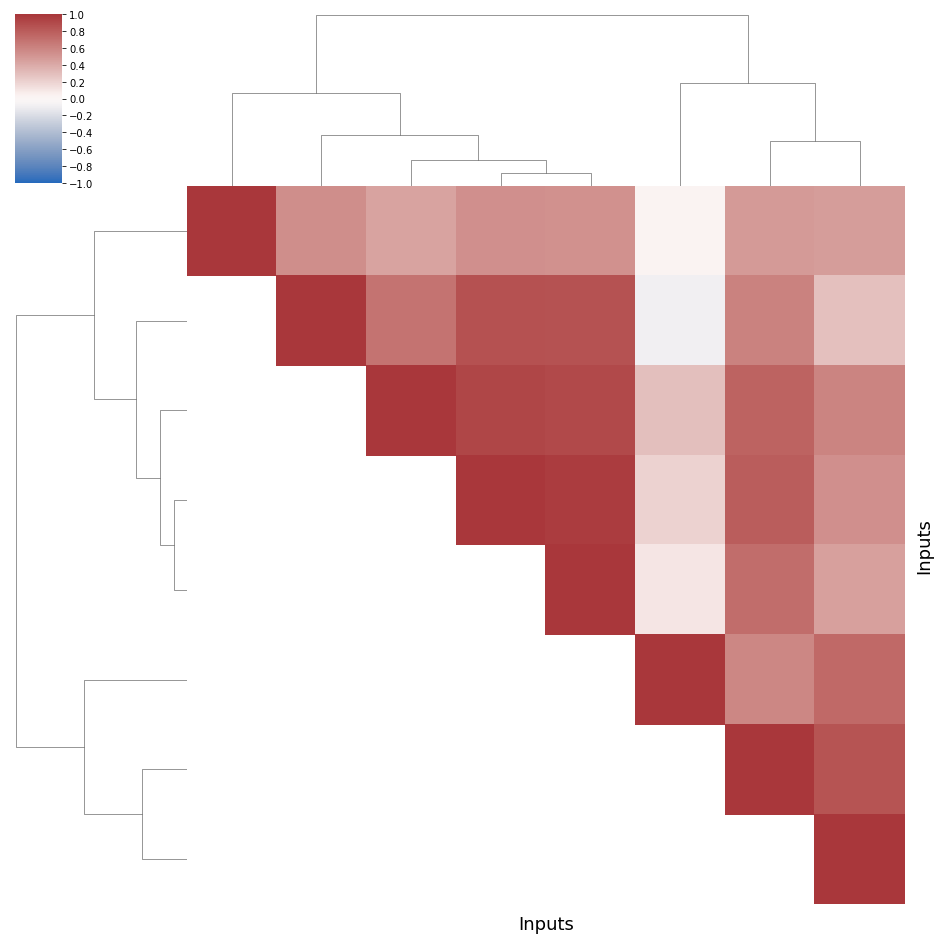

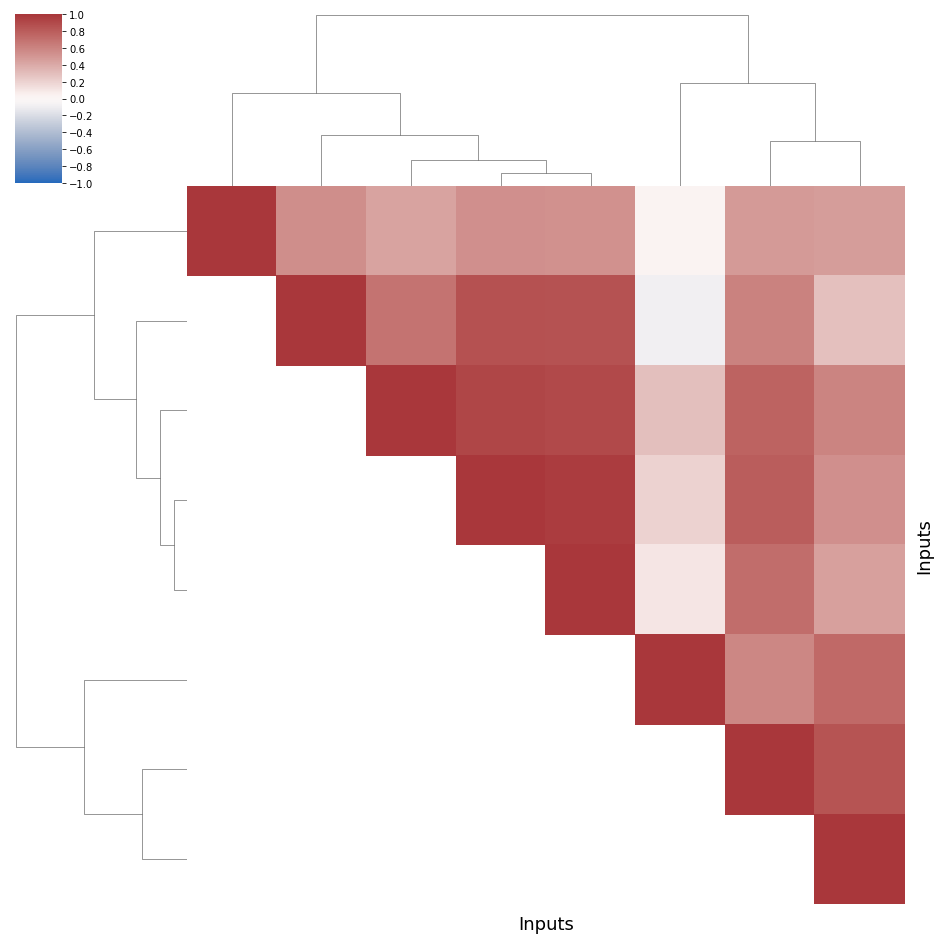

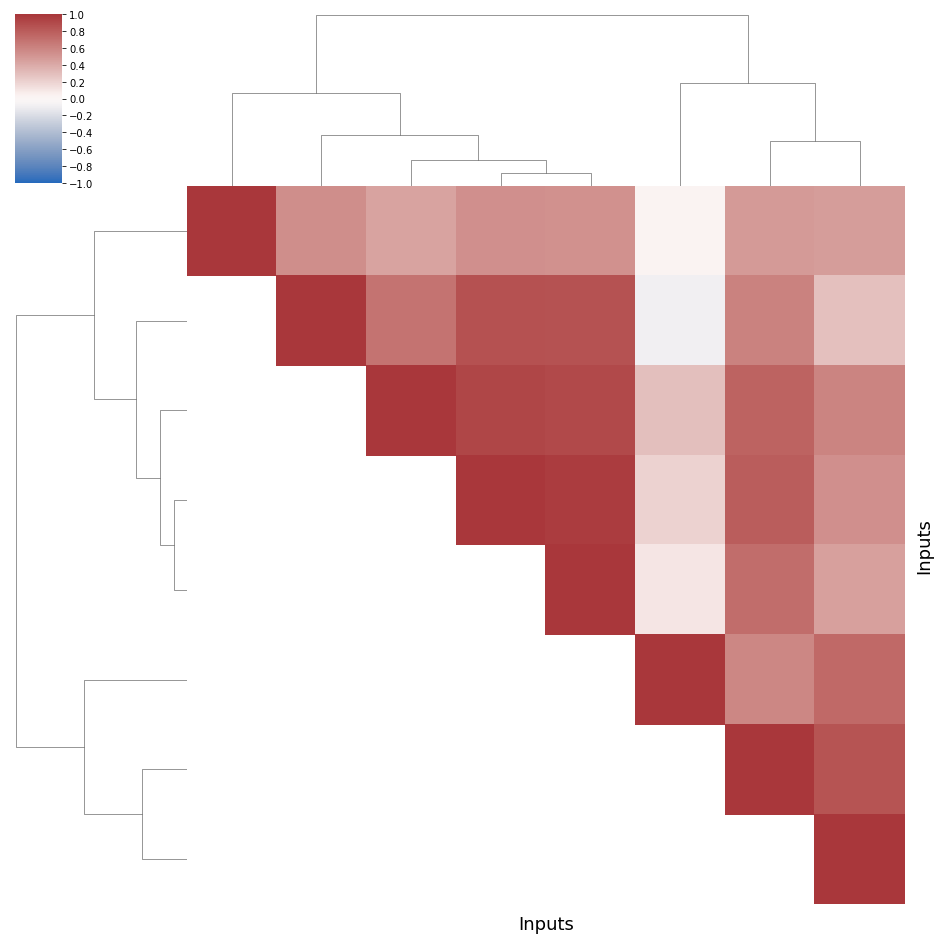

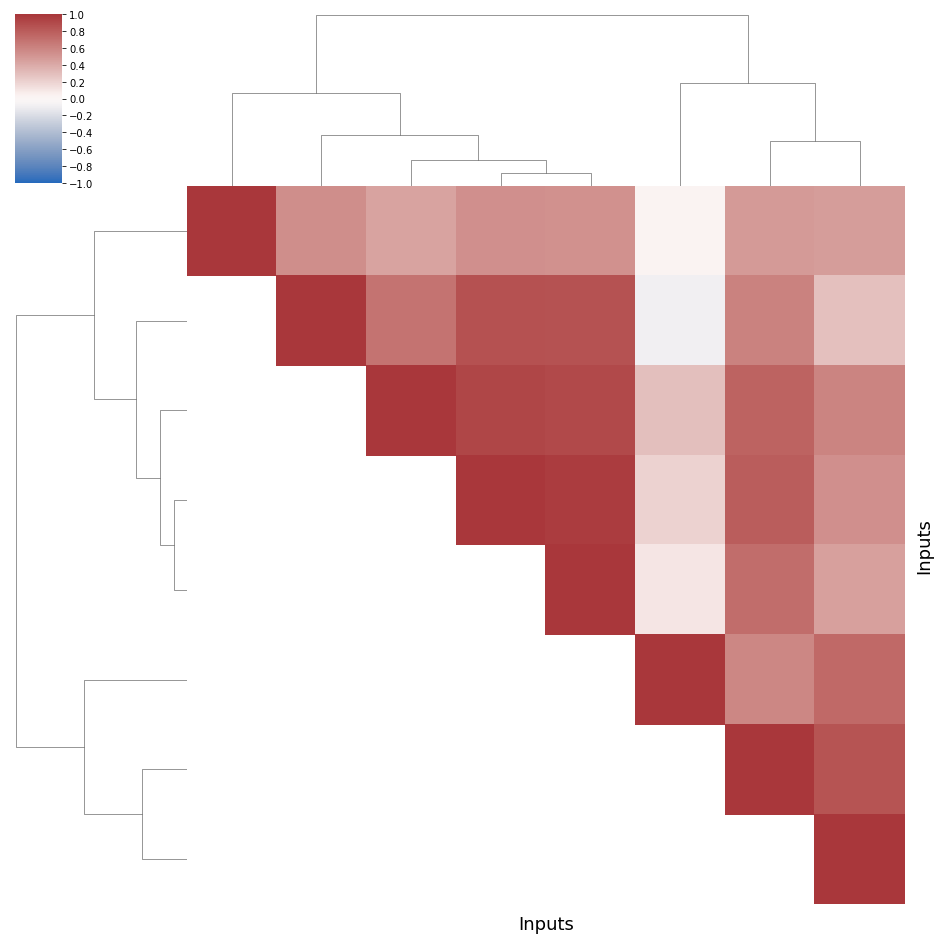

In [31]:
for index_hardware in range(hard_count):
    plot_correlationmatrix_dendogram(index_hardware, "size")

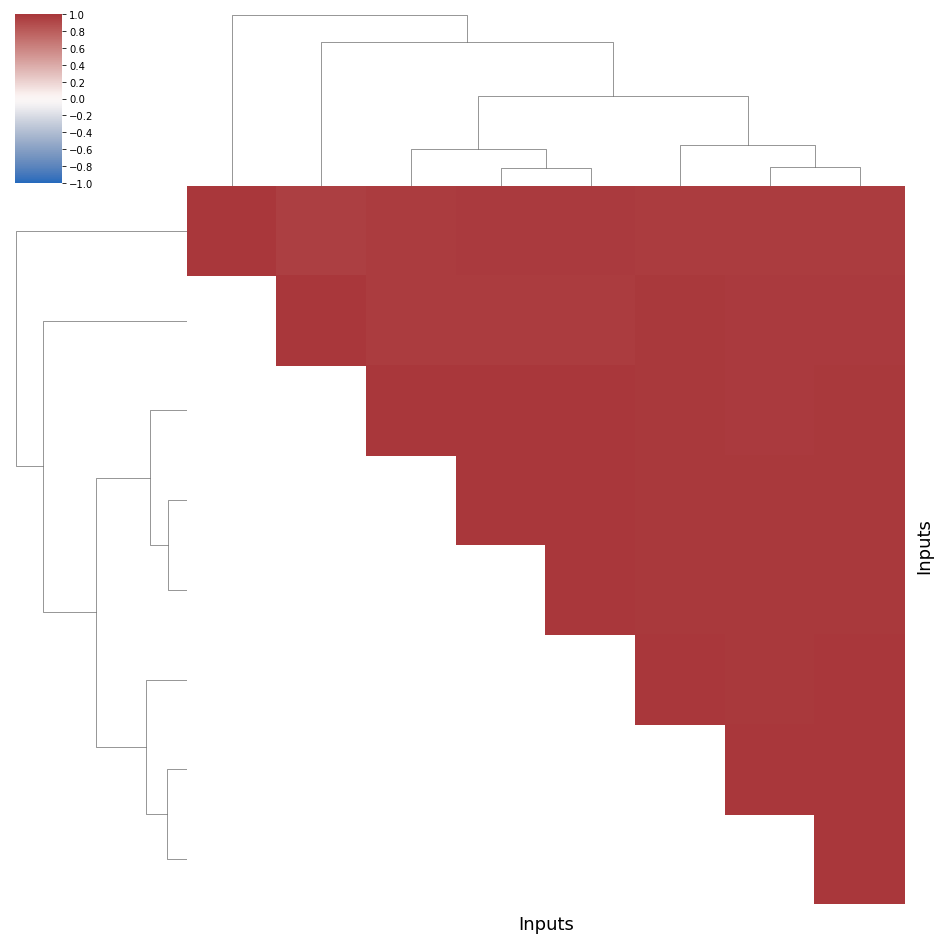

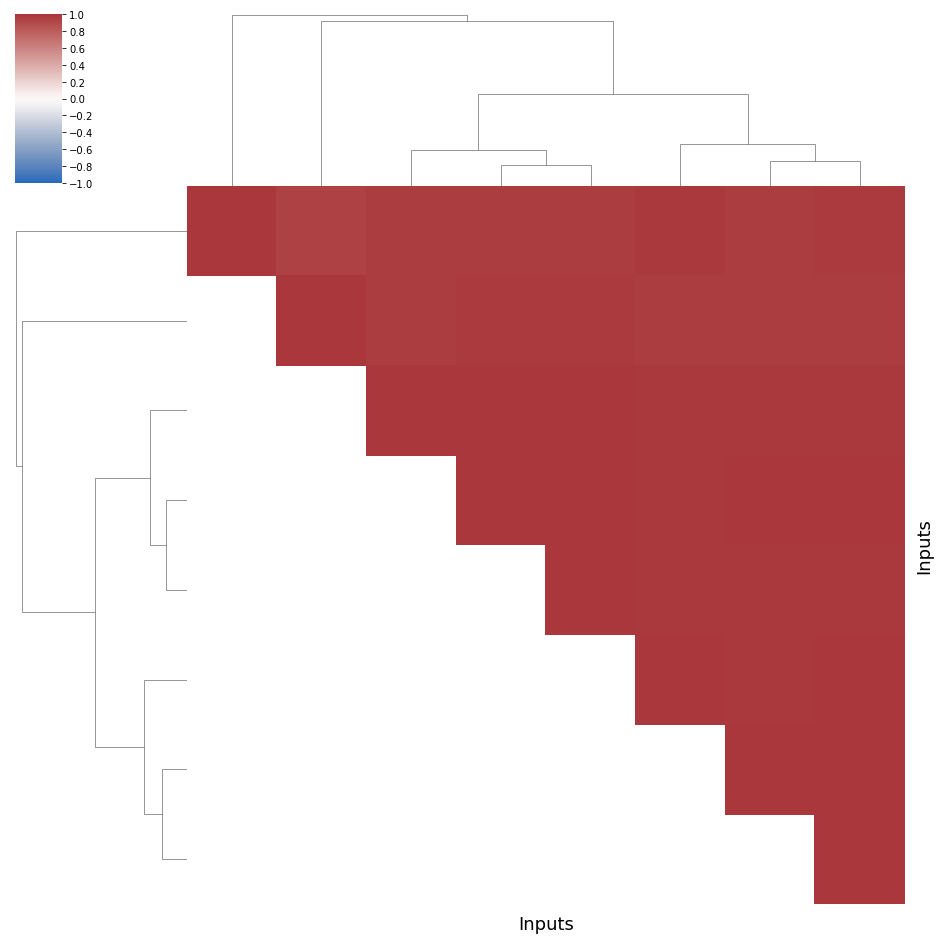

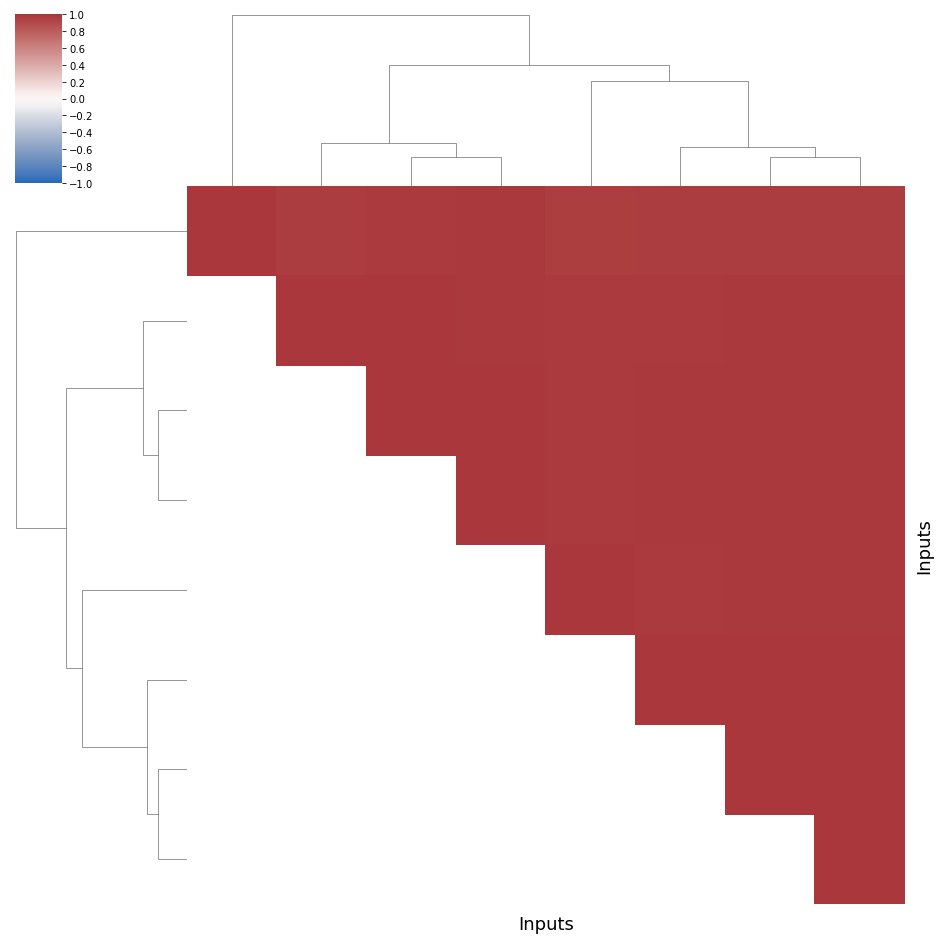

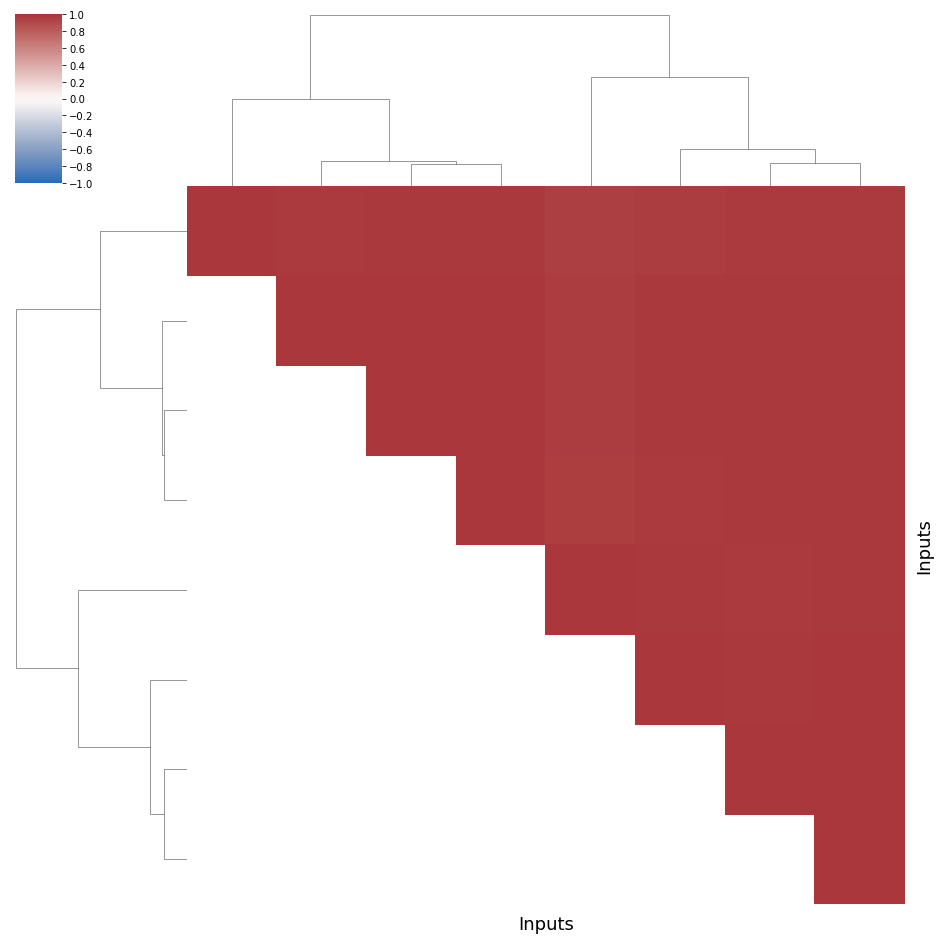

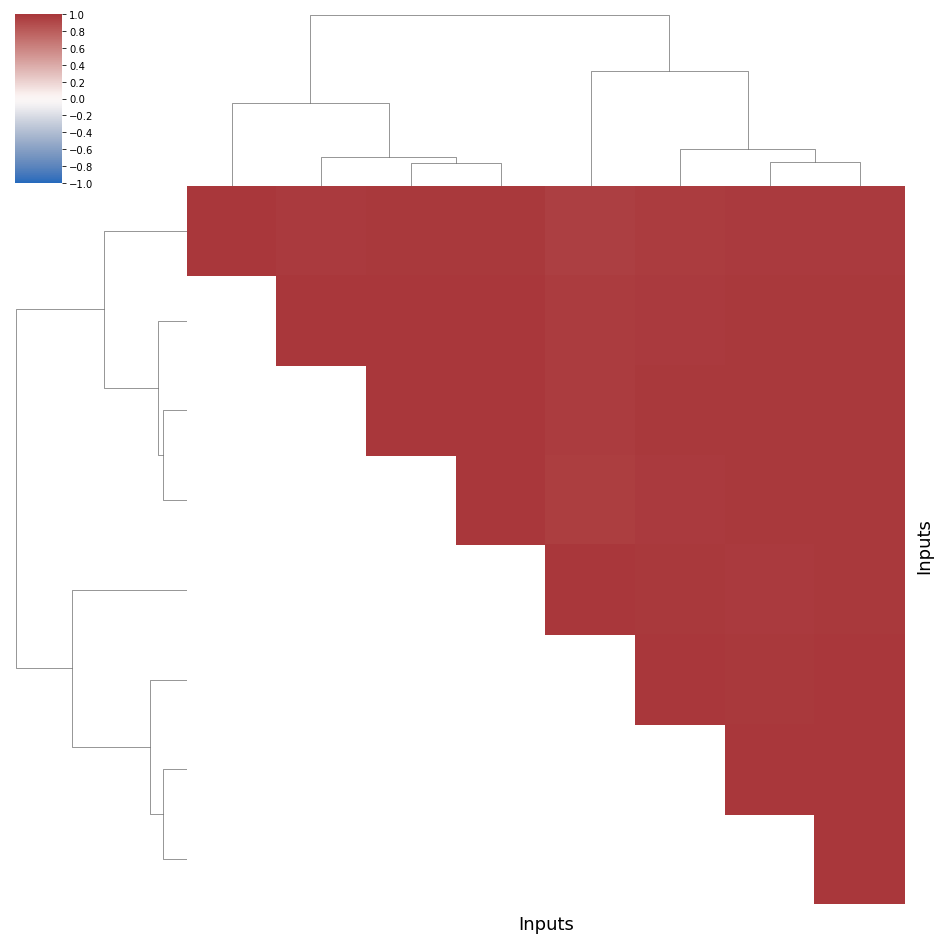

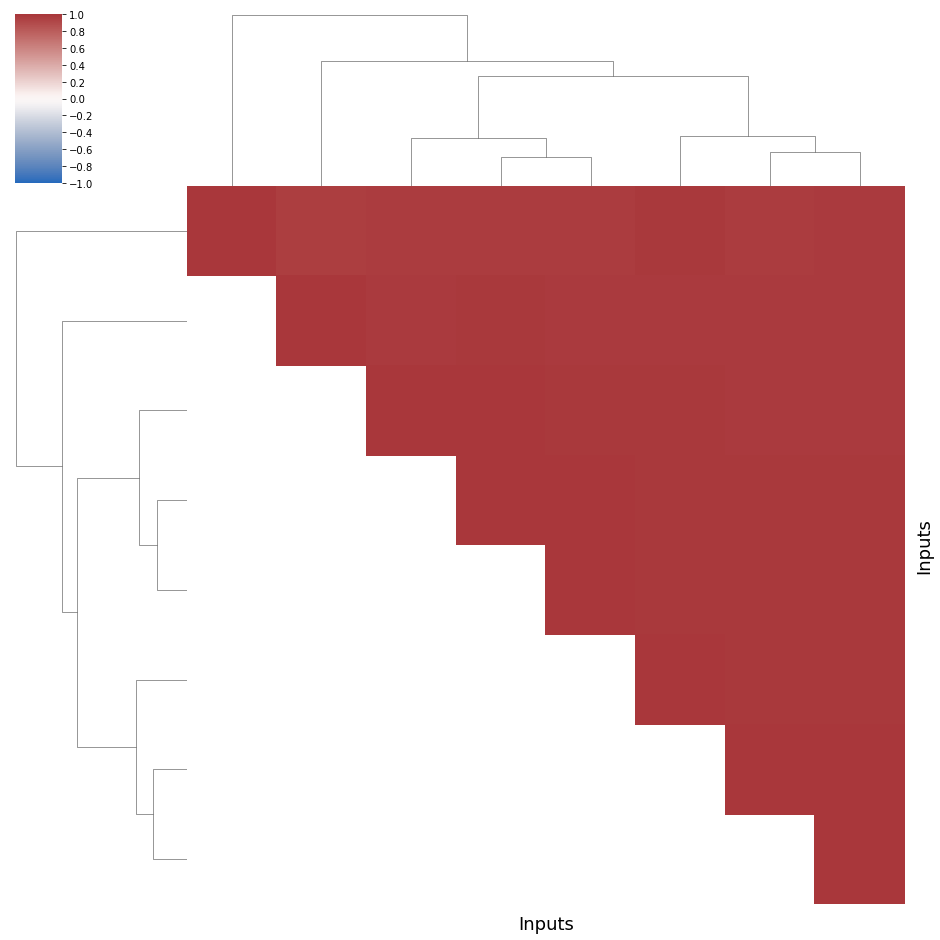

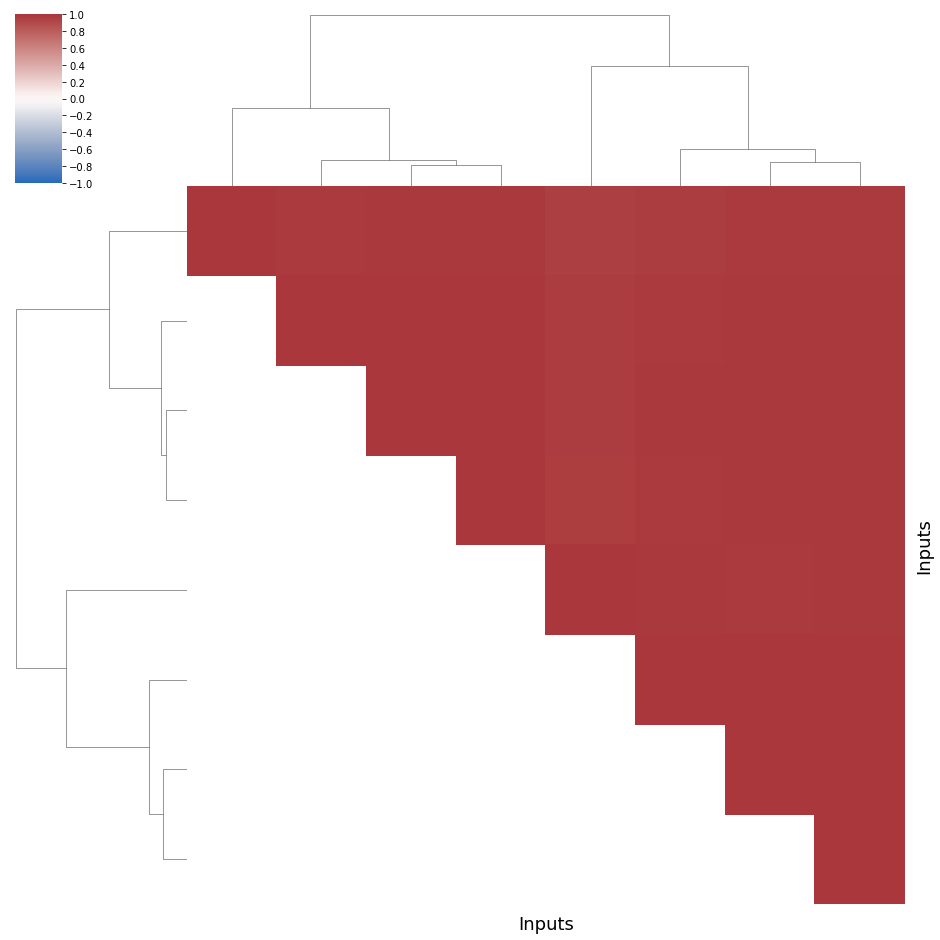

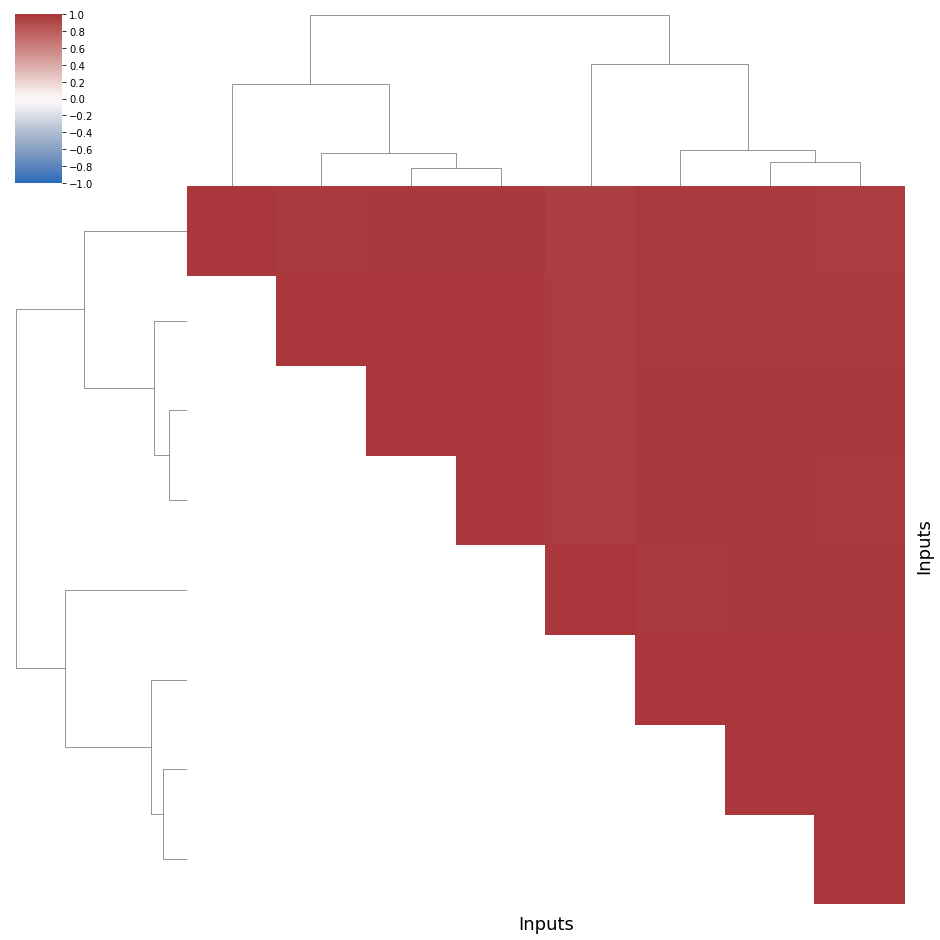

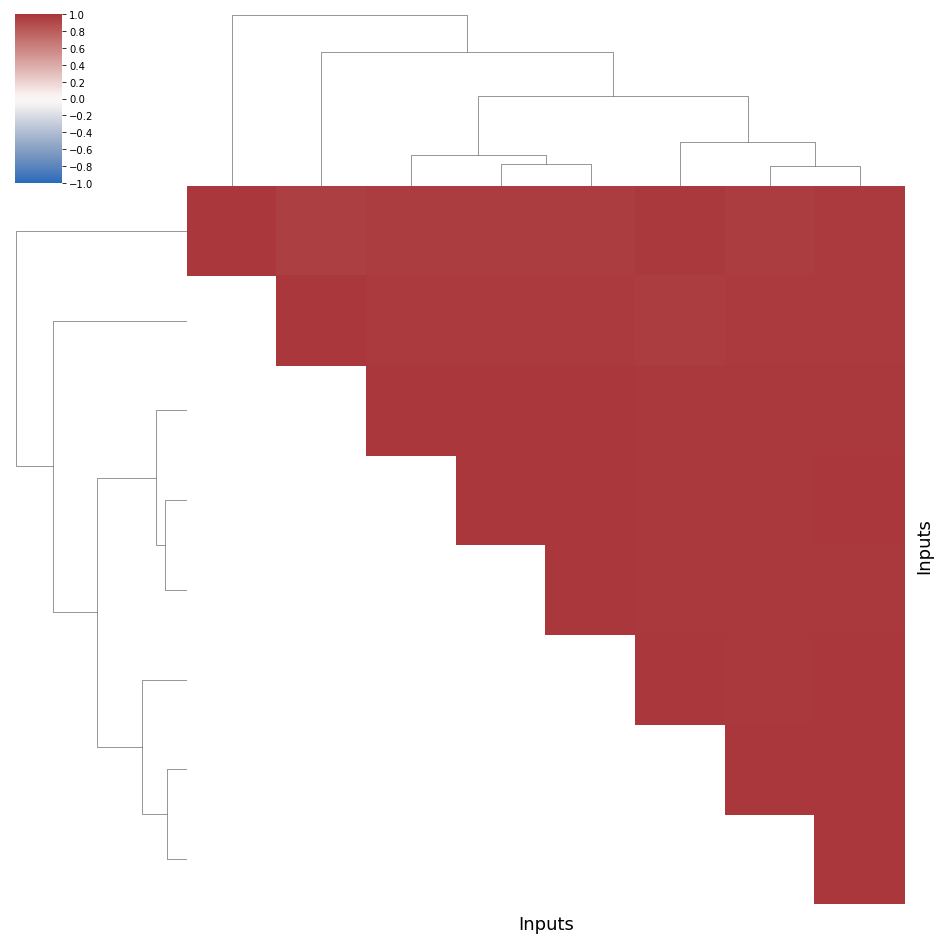

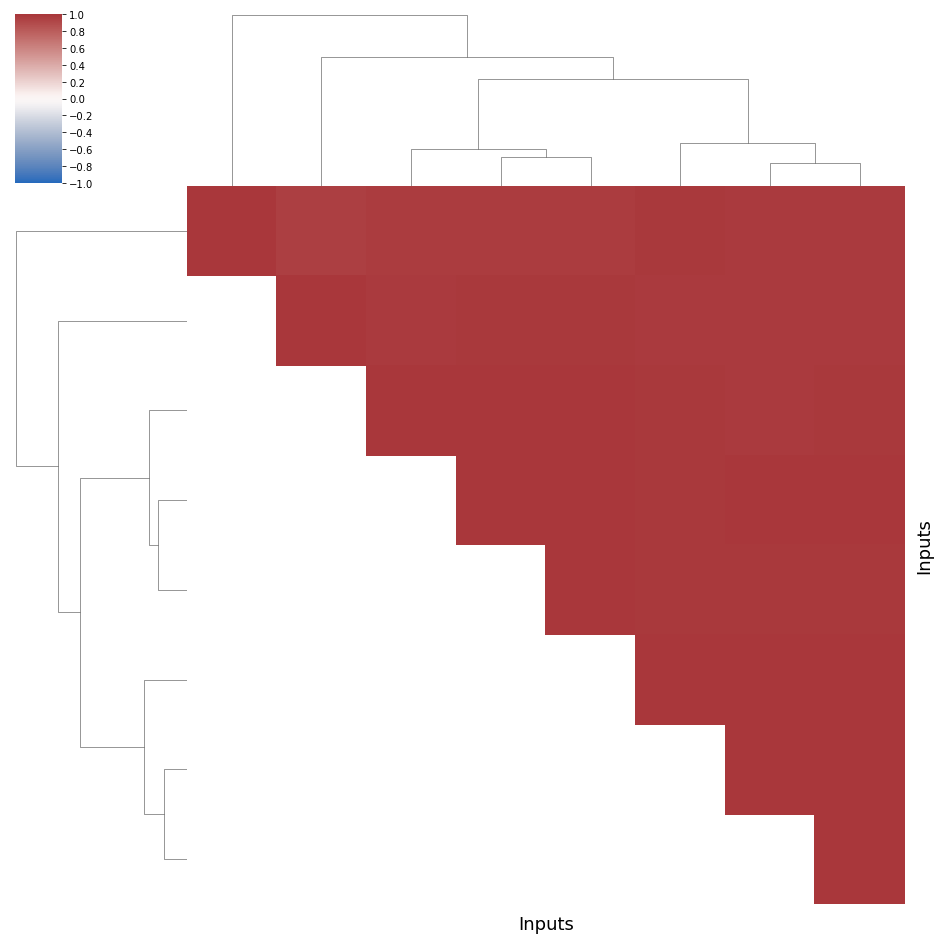

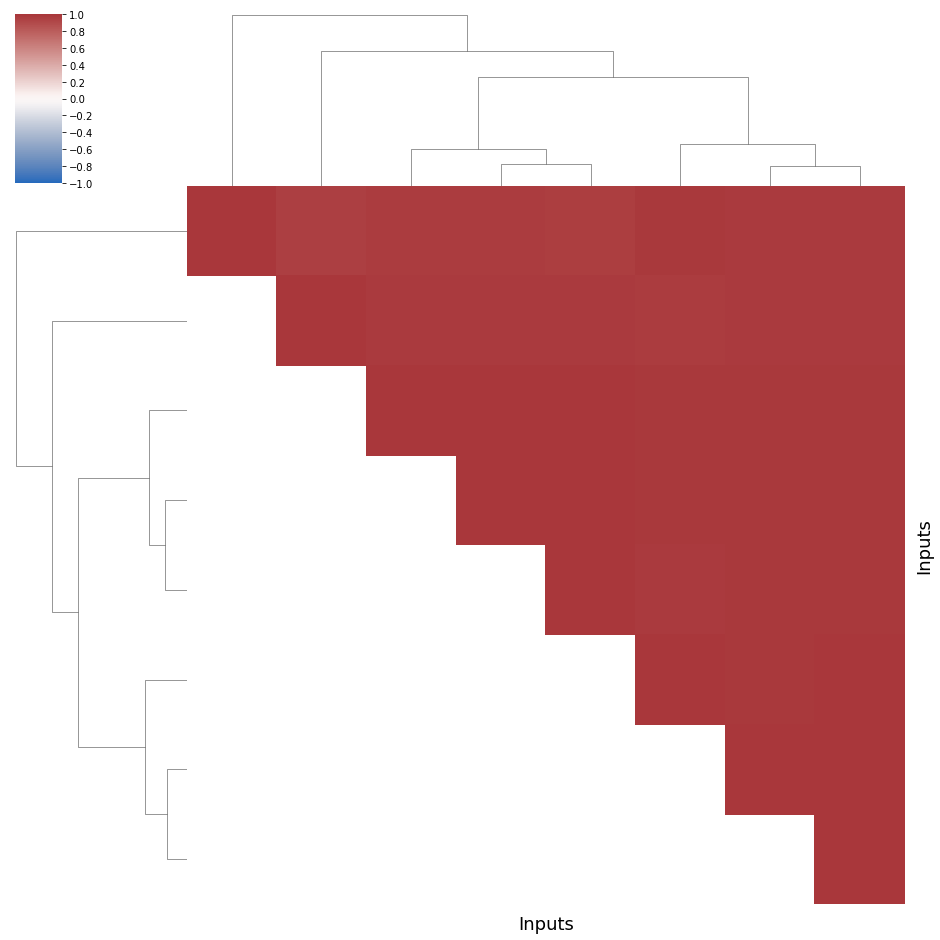

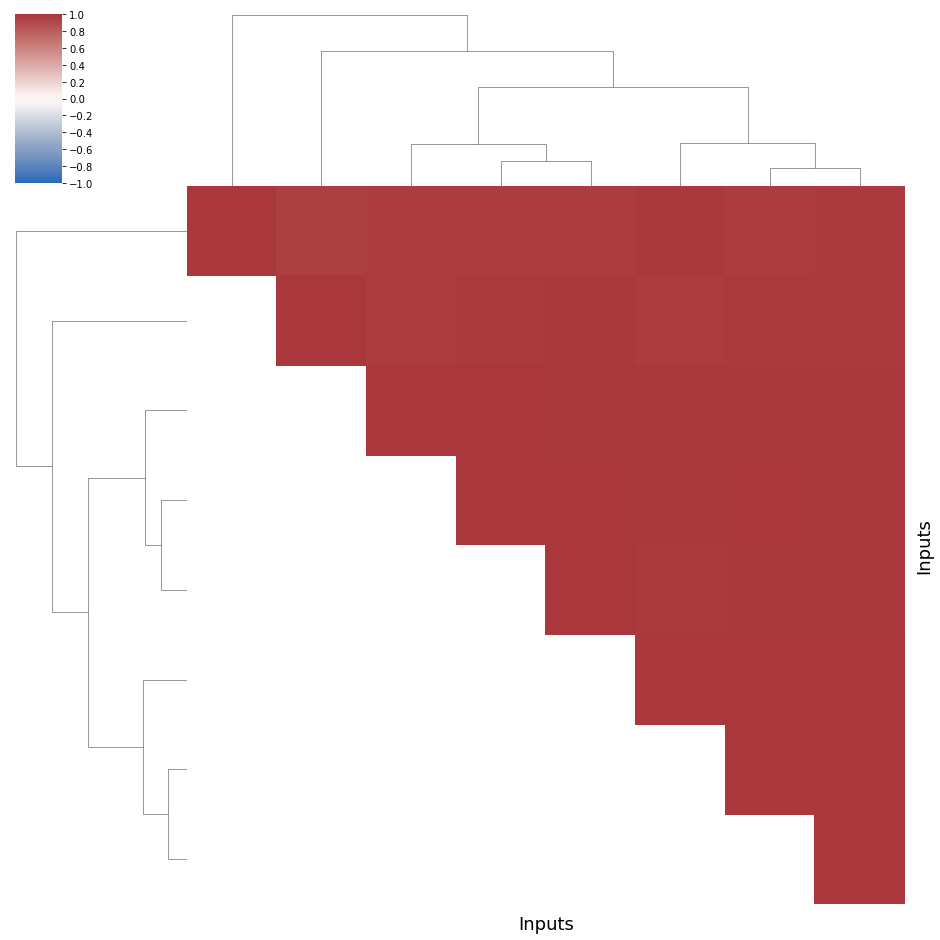

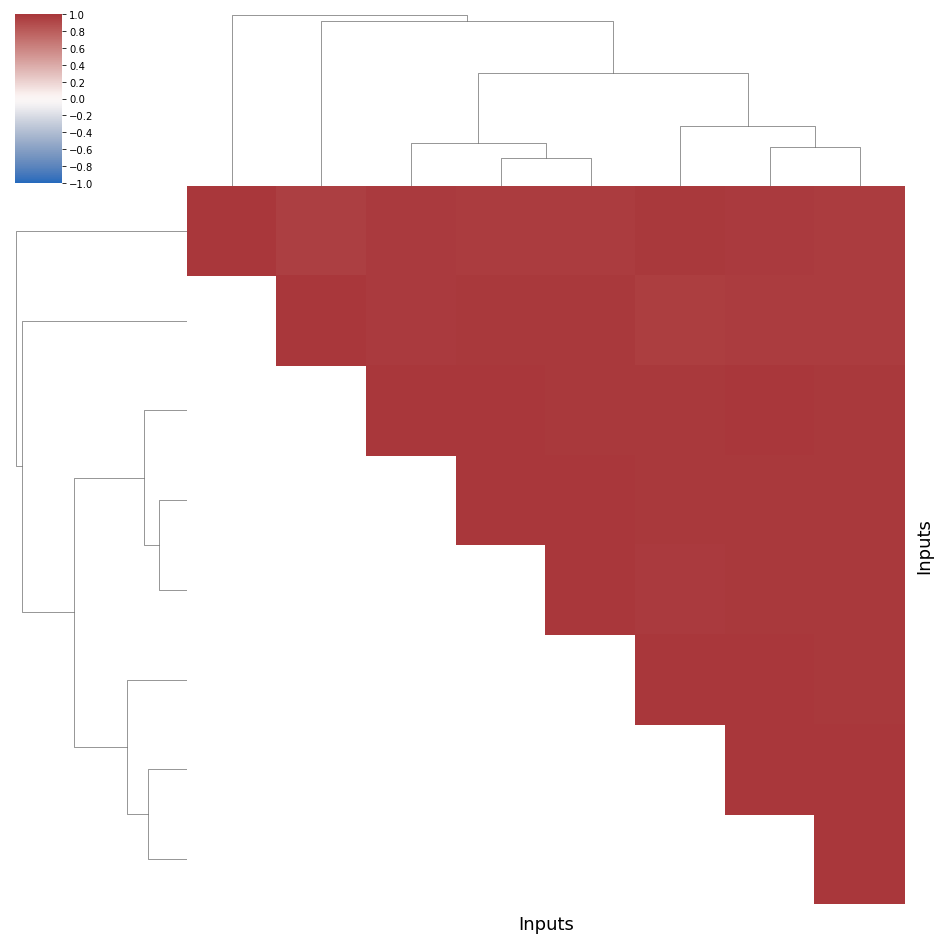

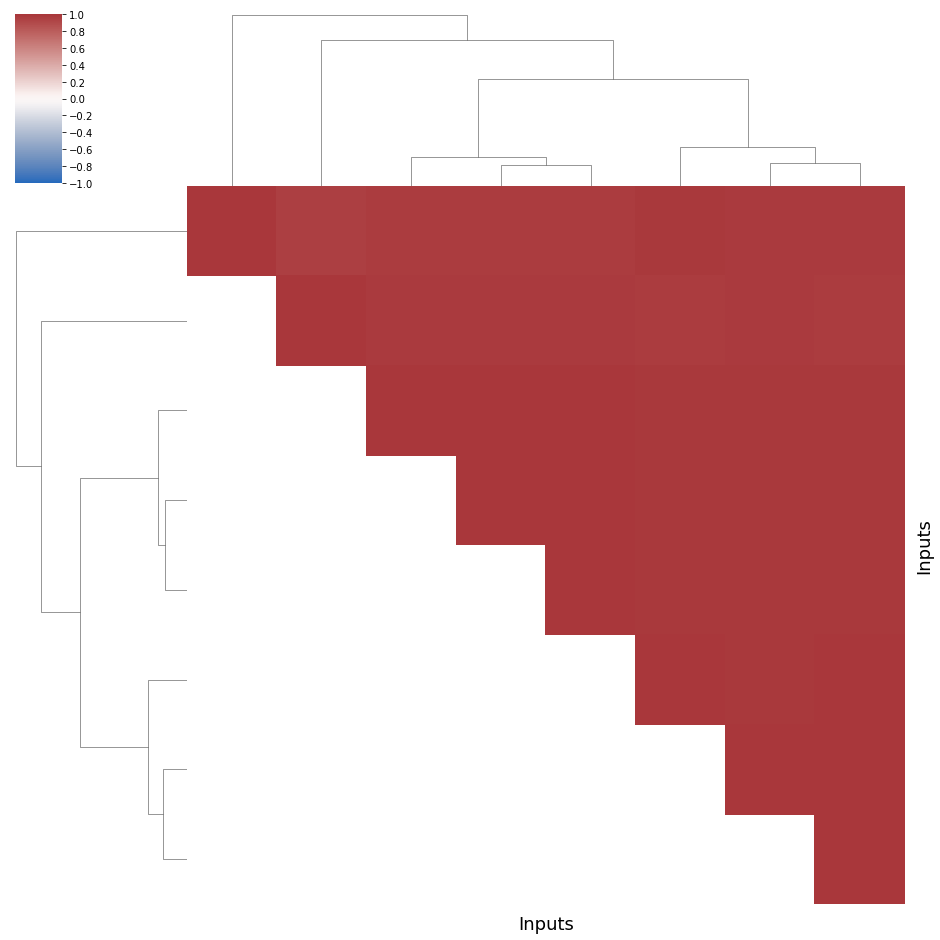

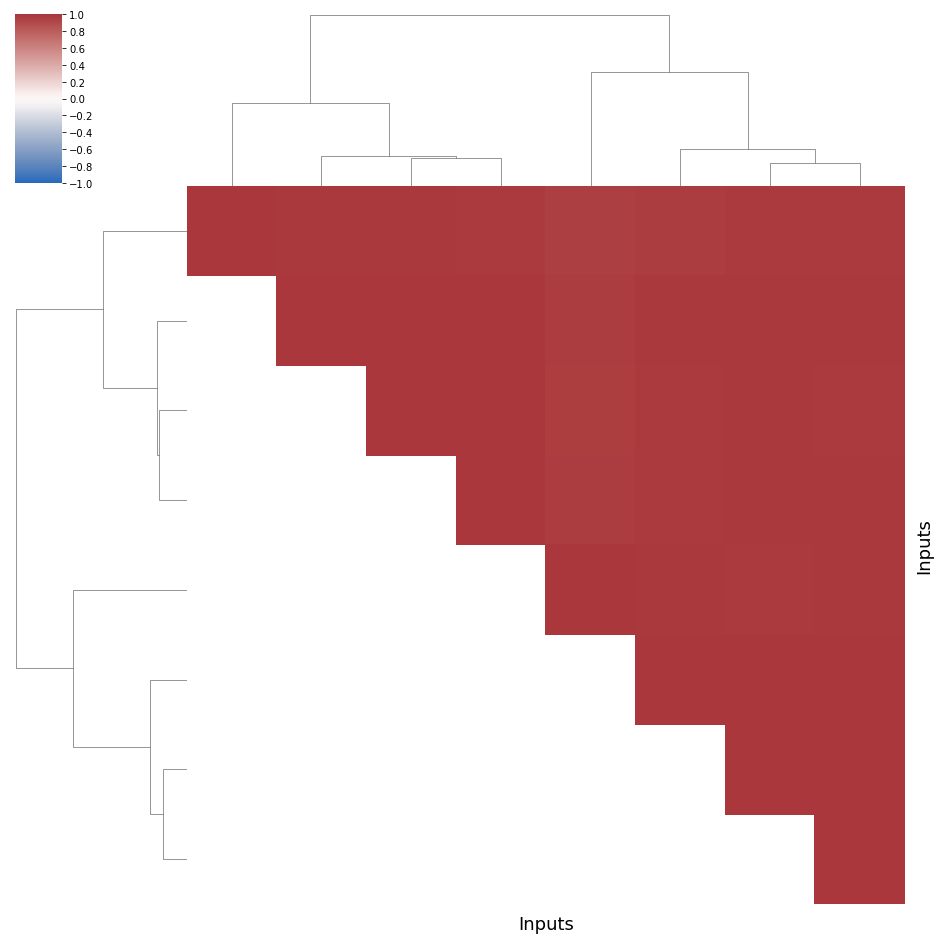

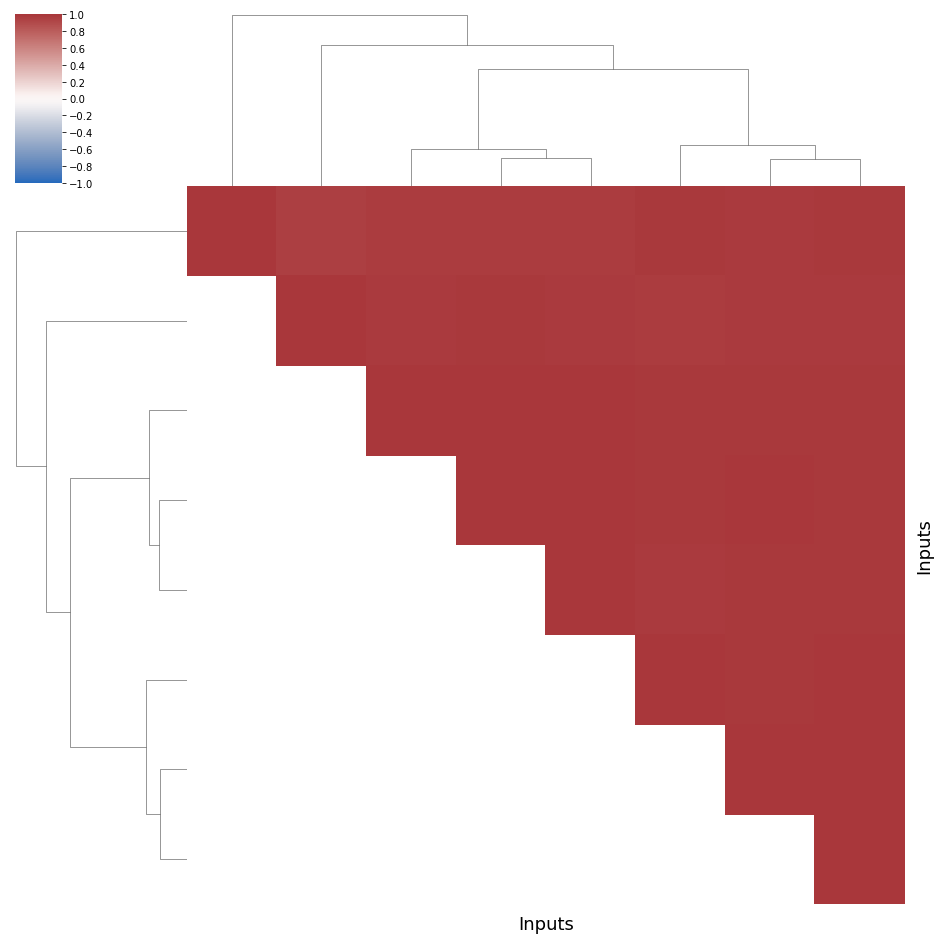

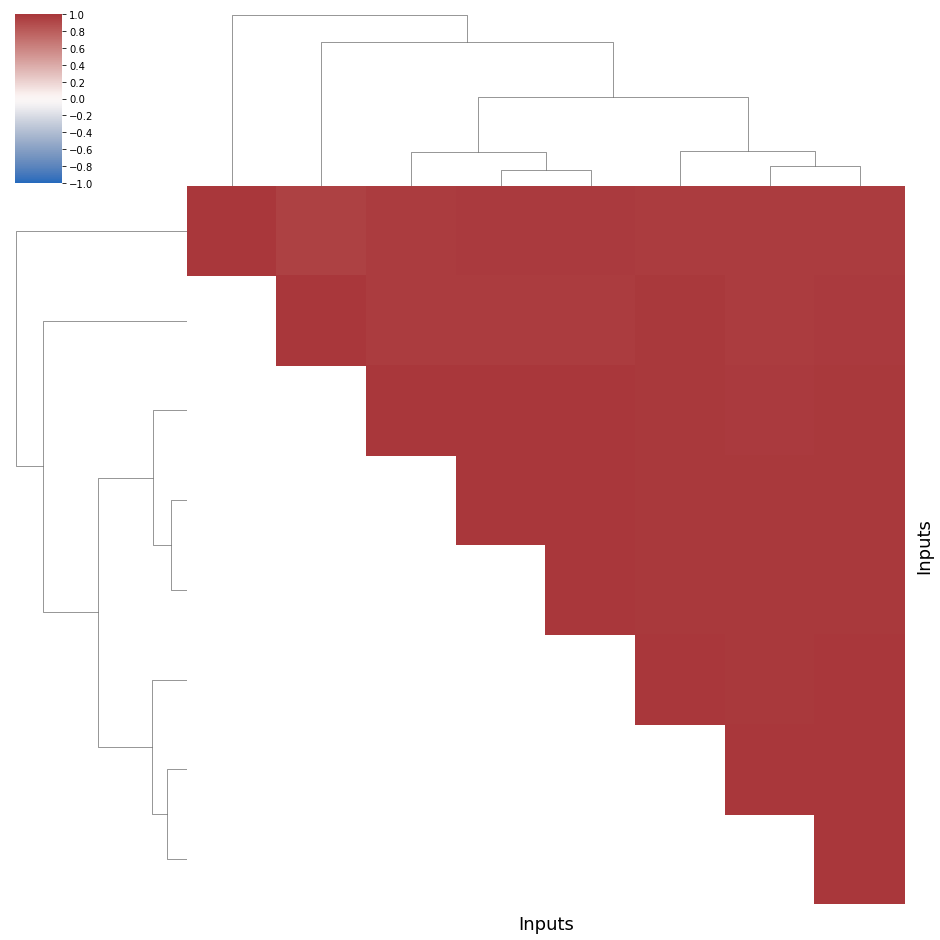

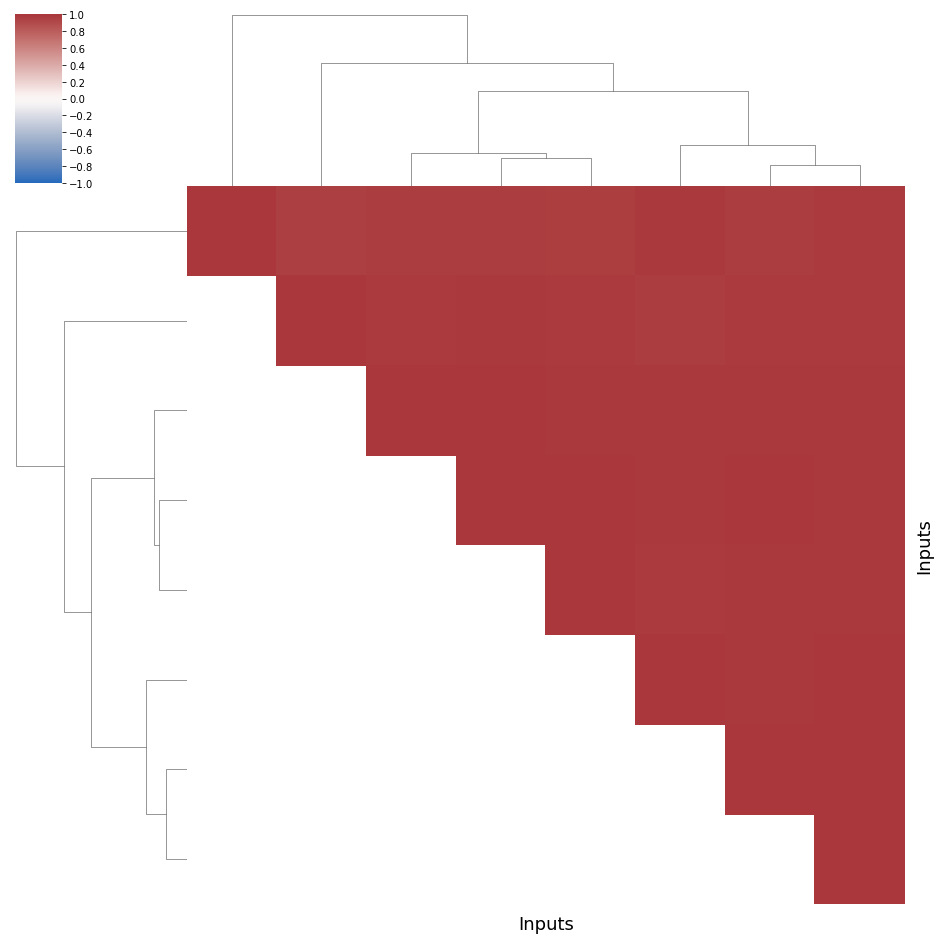

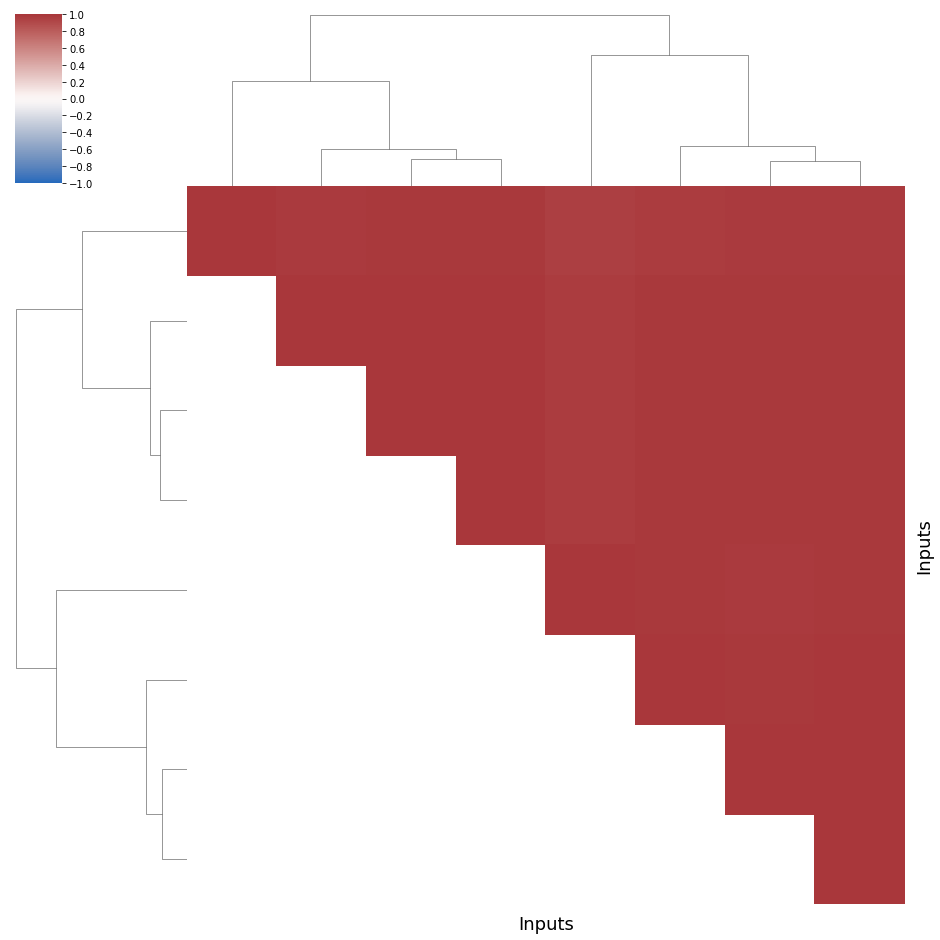

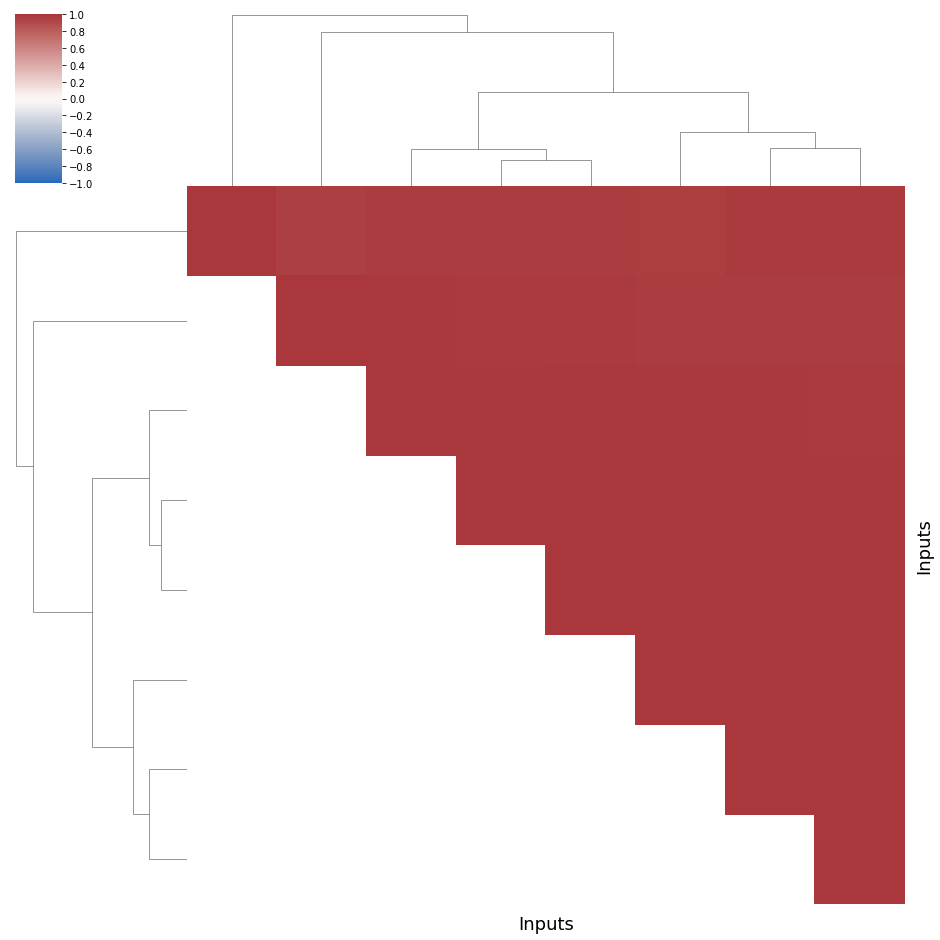

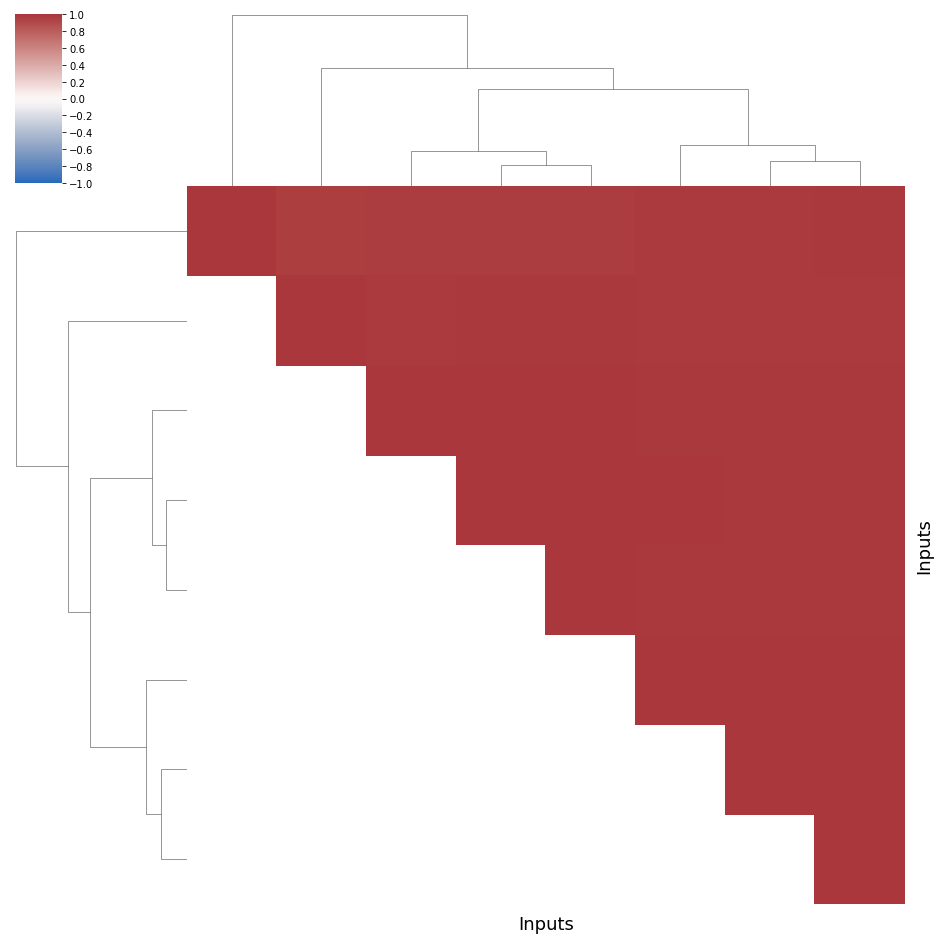

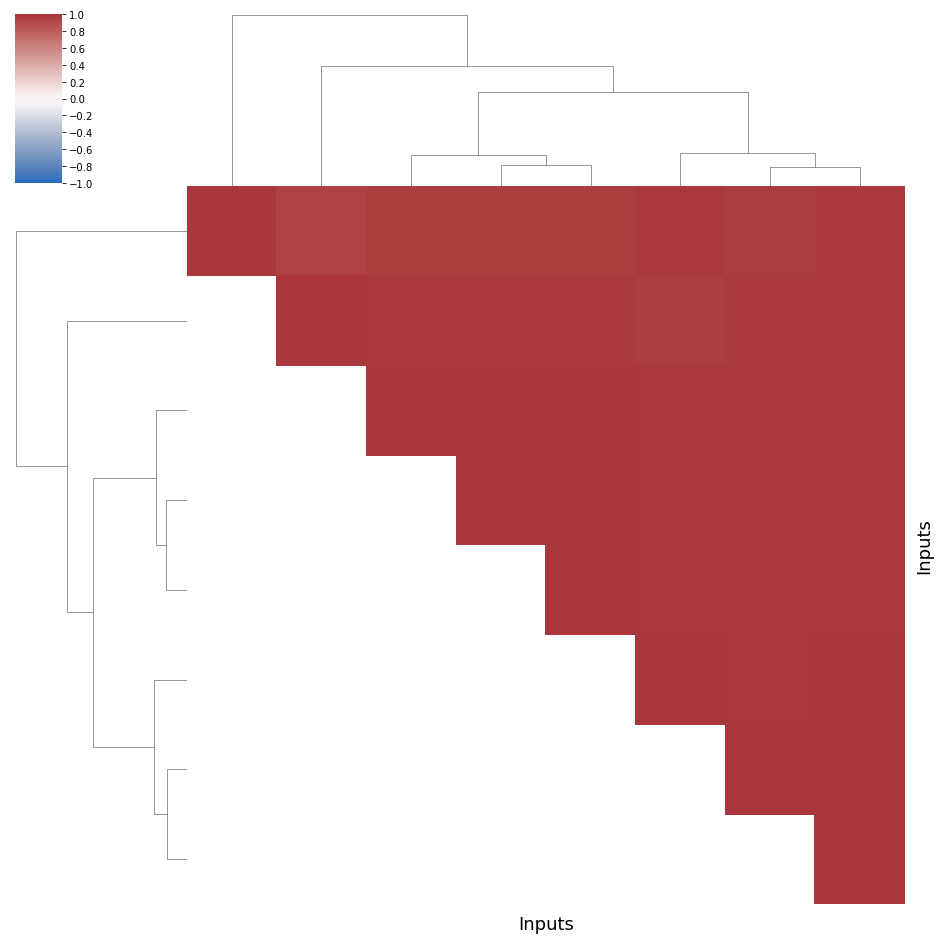

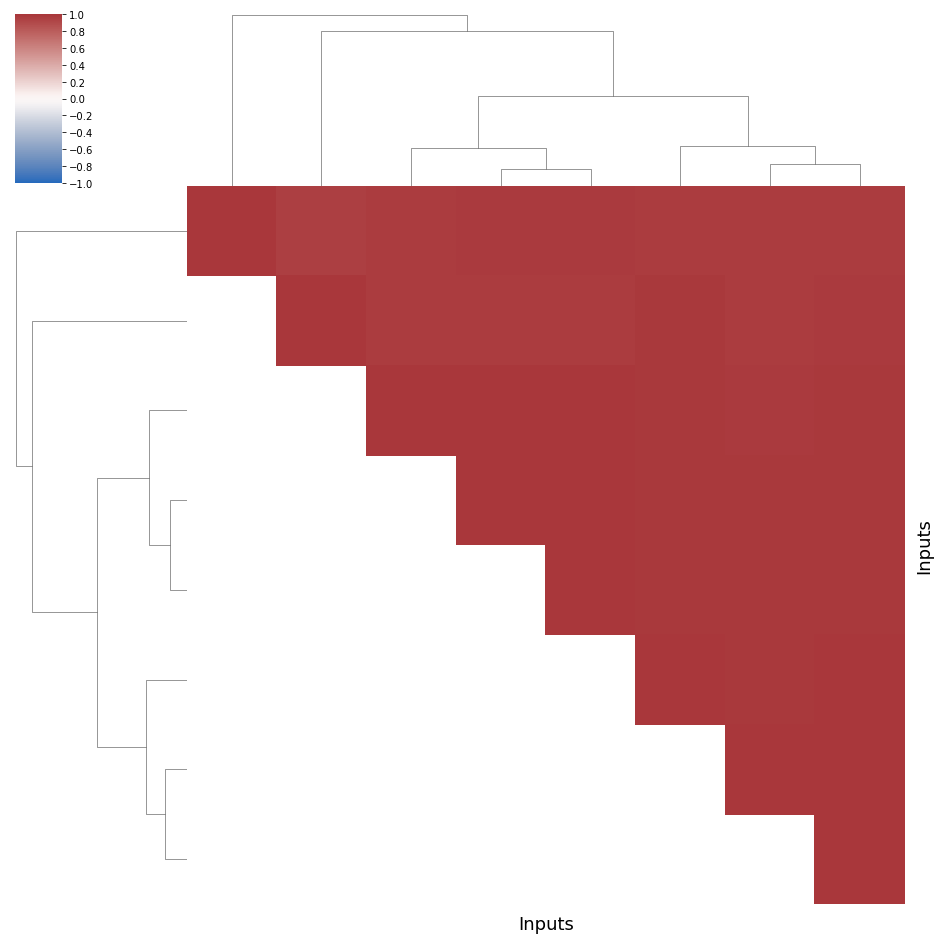

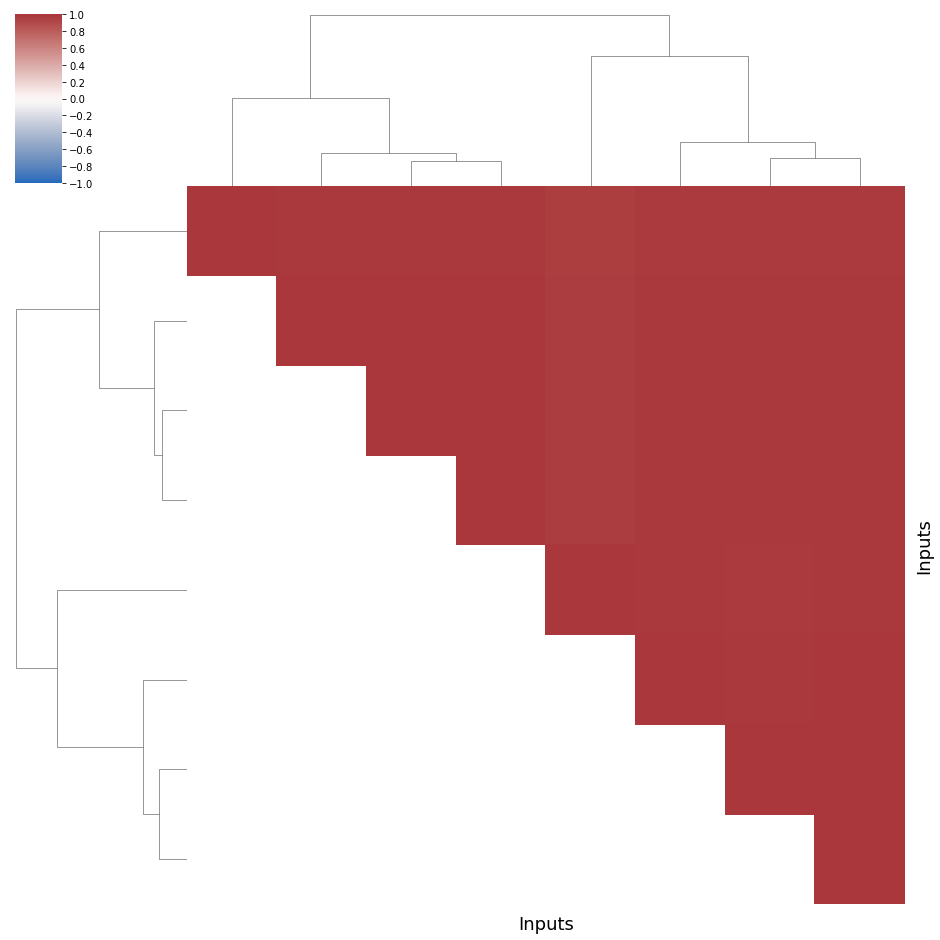

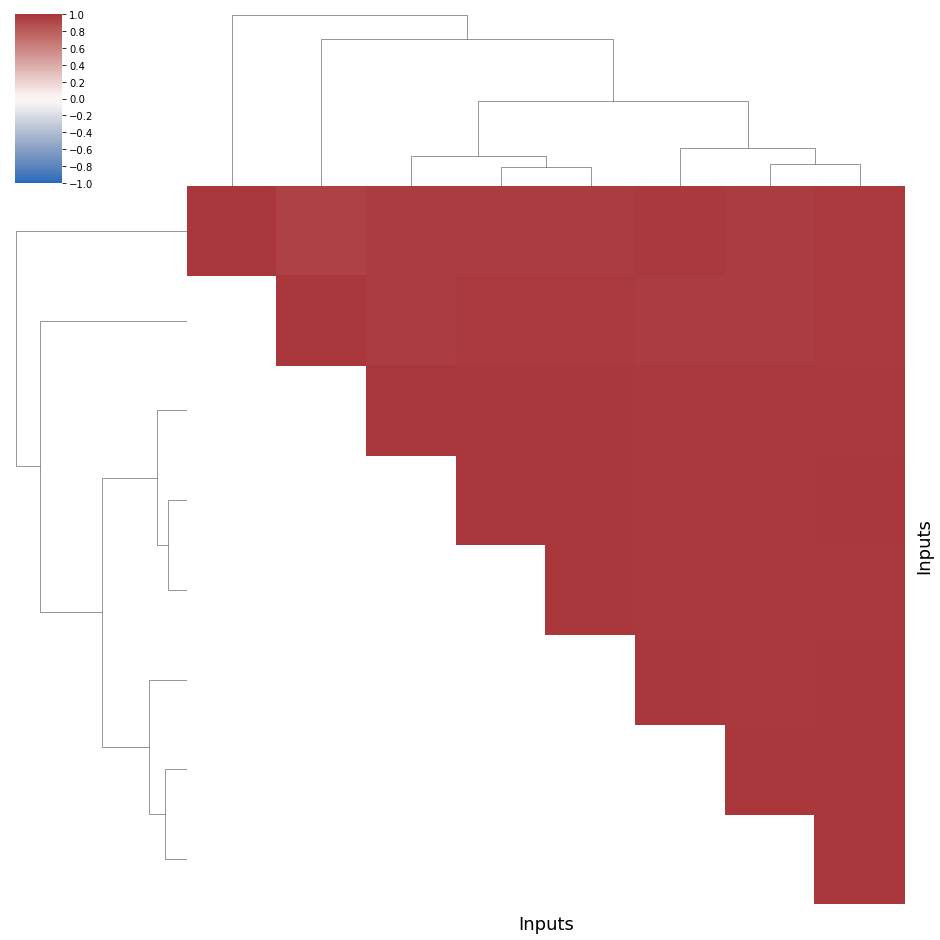

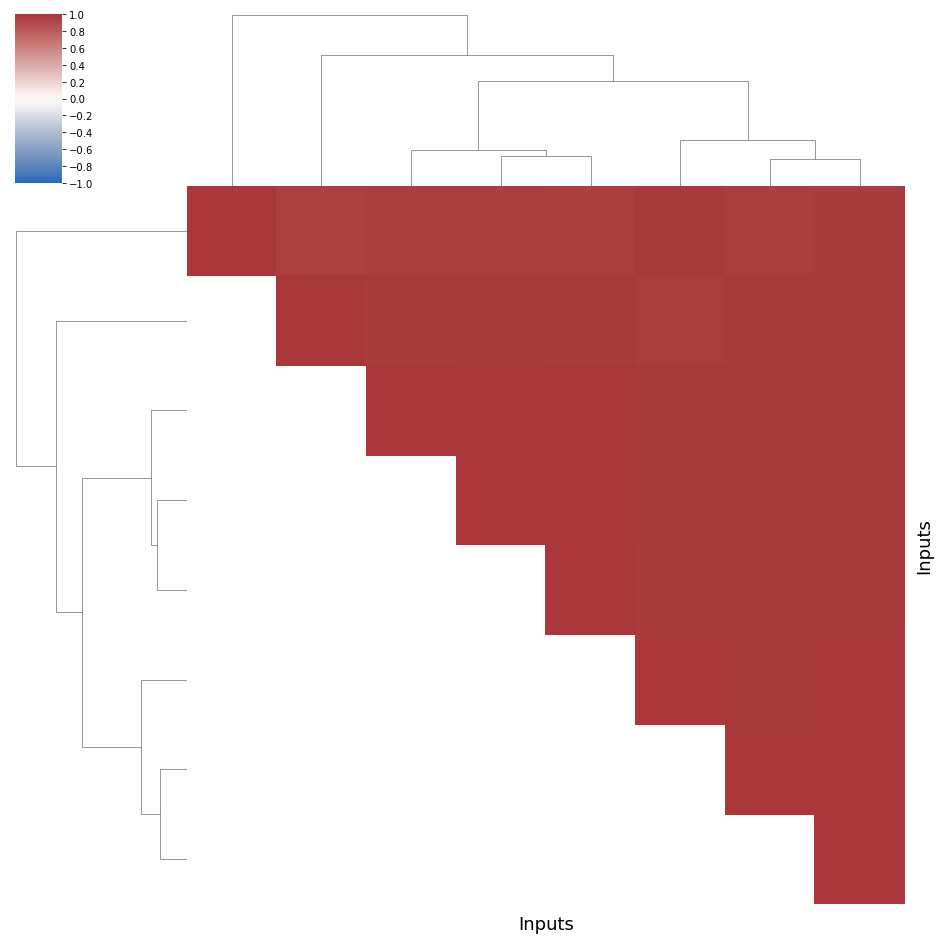

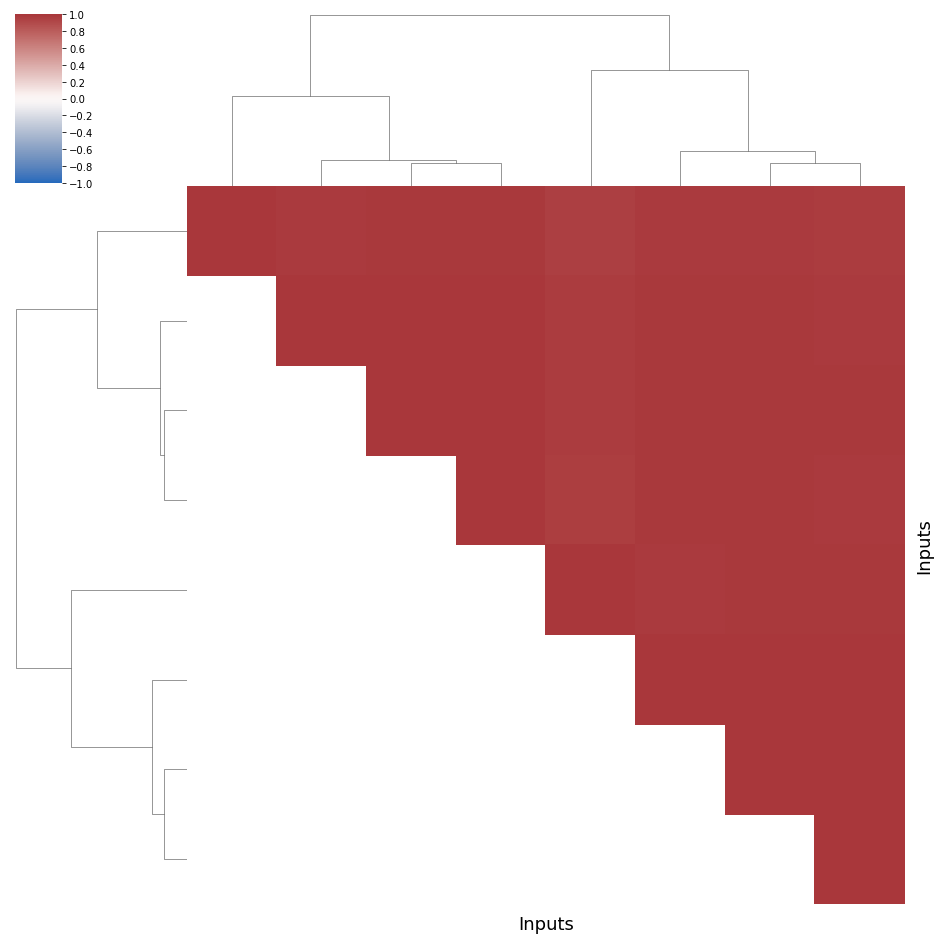

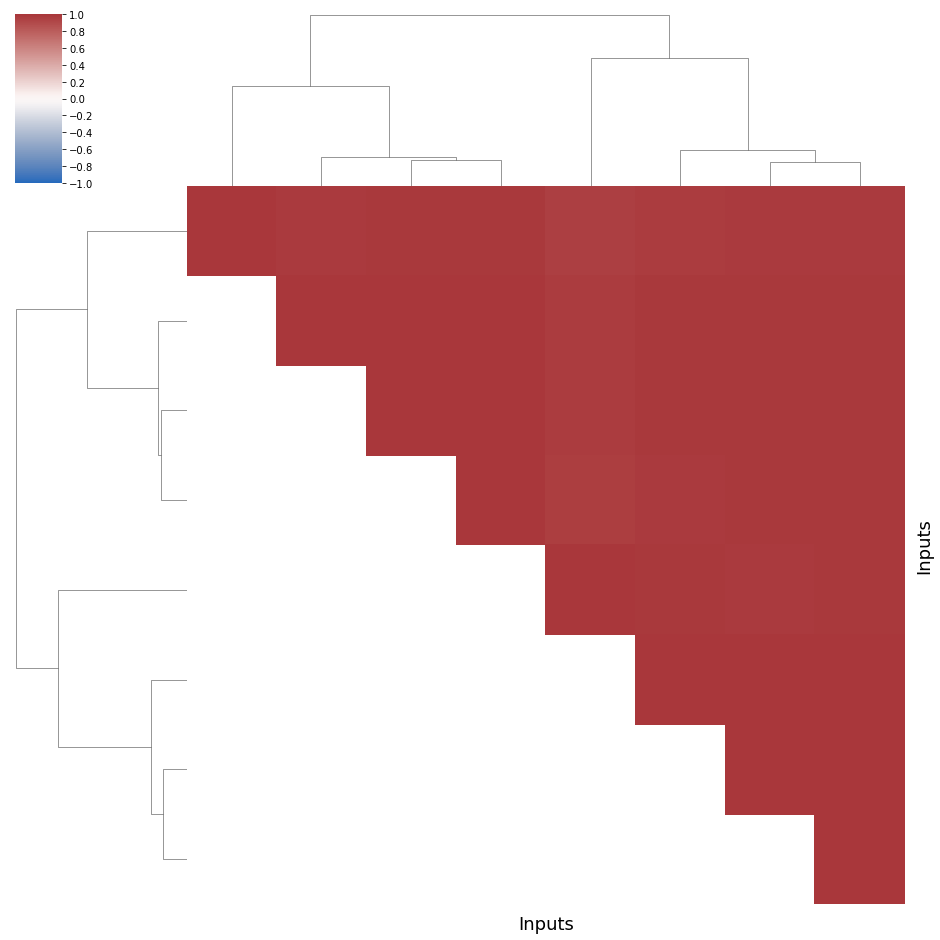

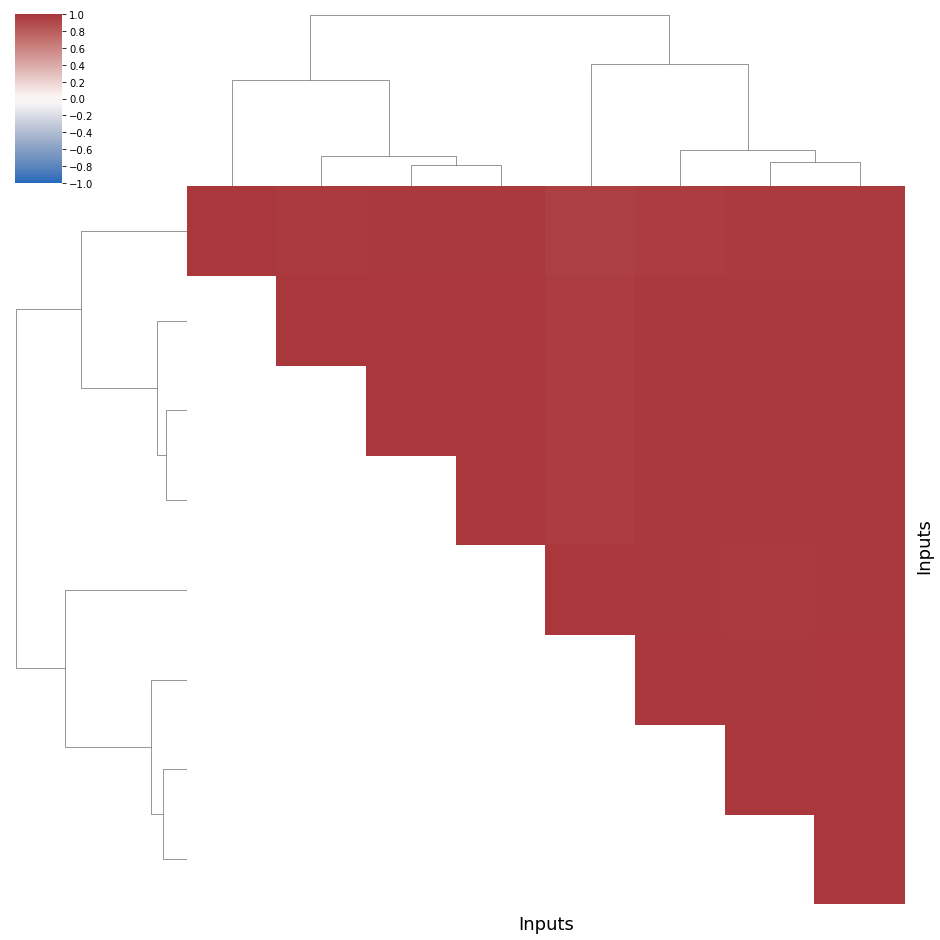

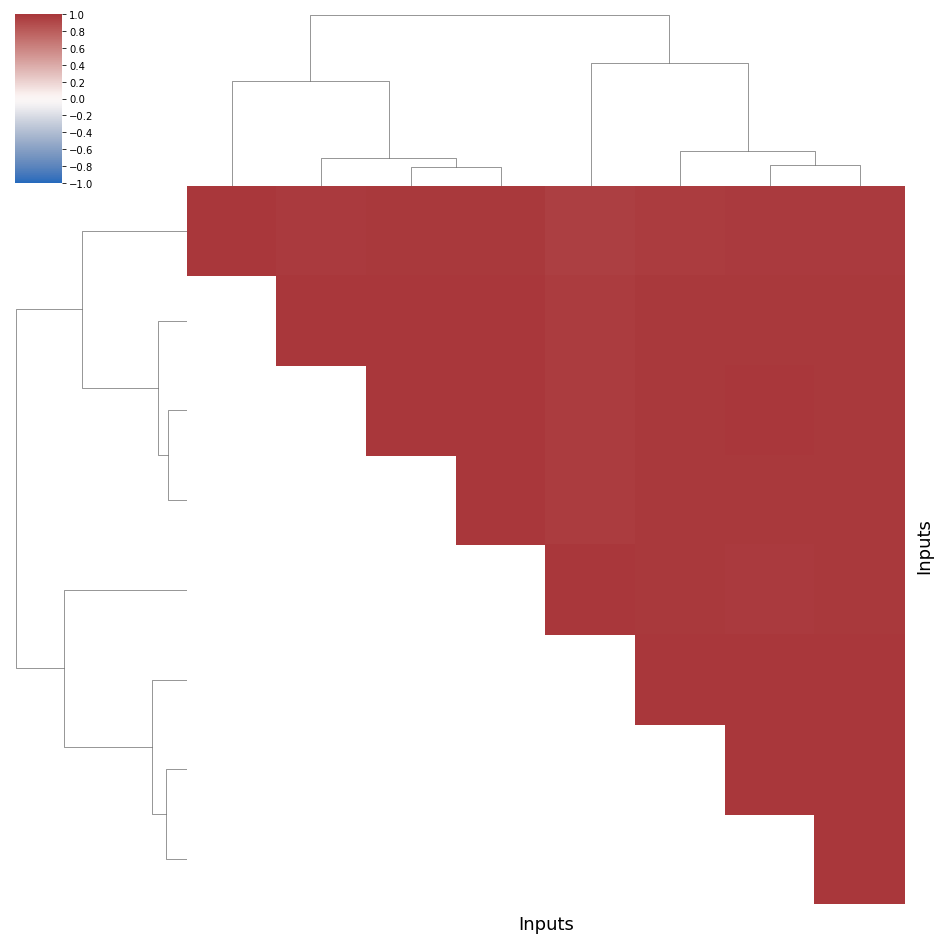

In [32]:
for index_hardware in range(hard_count):
    plot_correlationmatrix_dendogram(index_hardware, "etime")

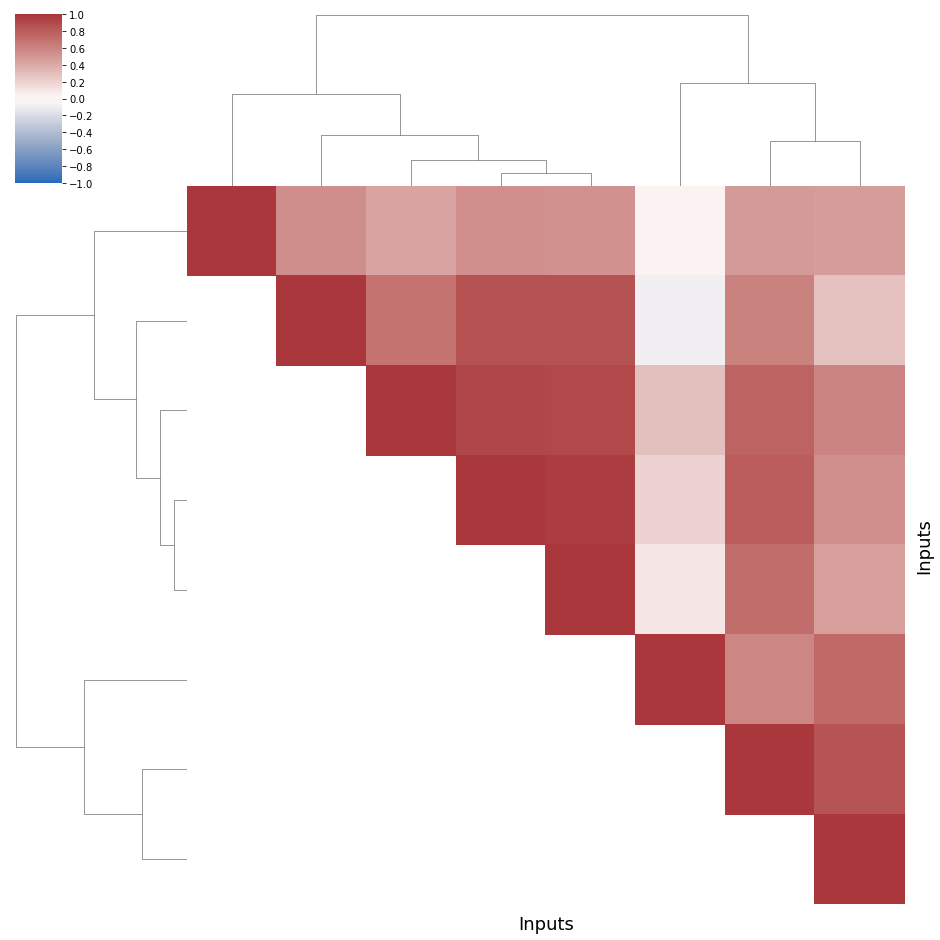

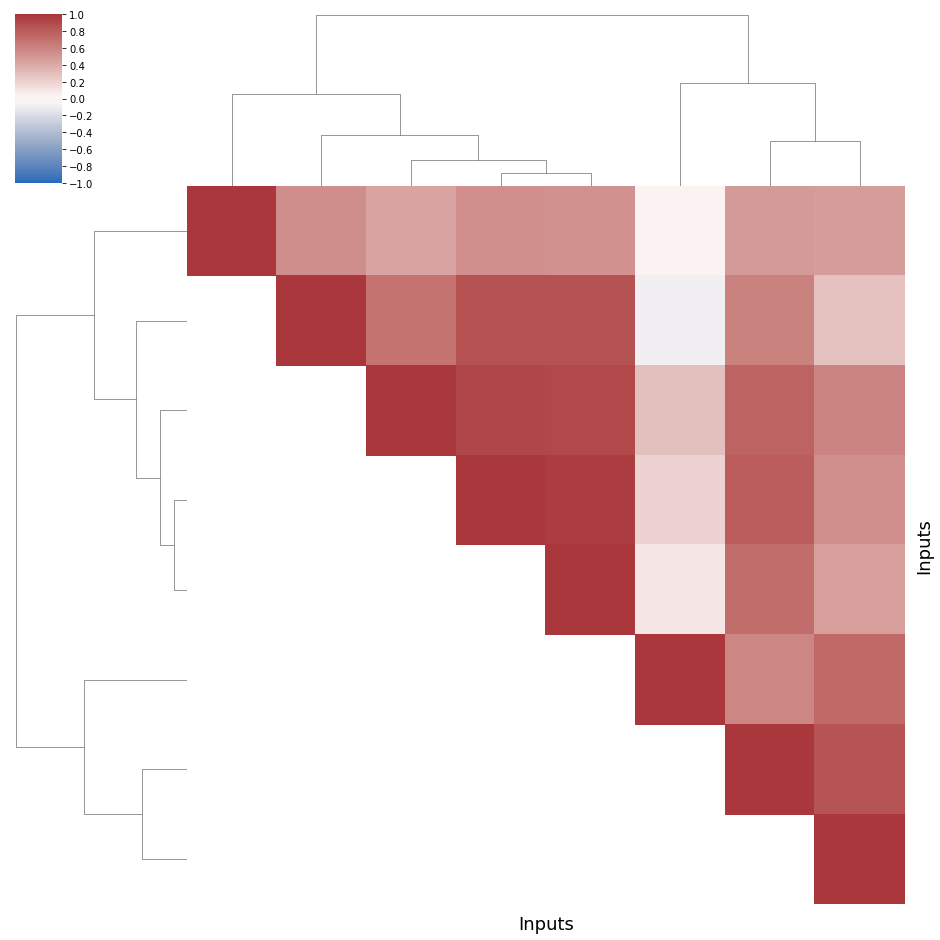

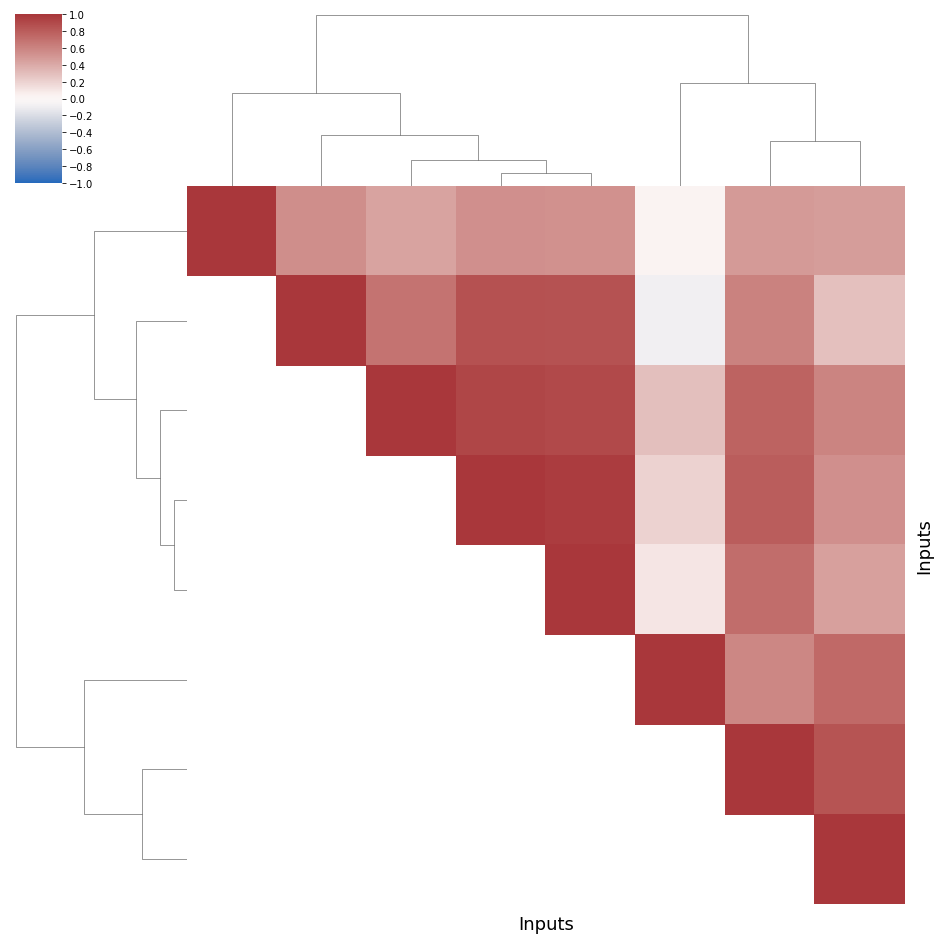

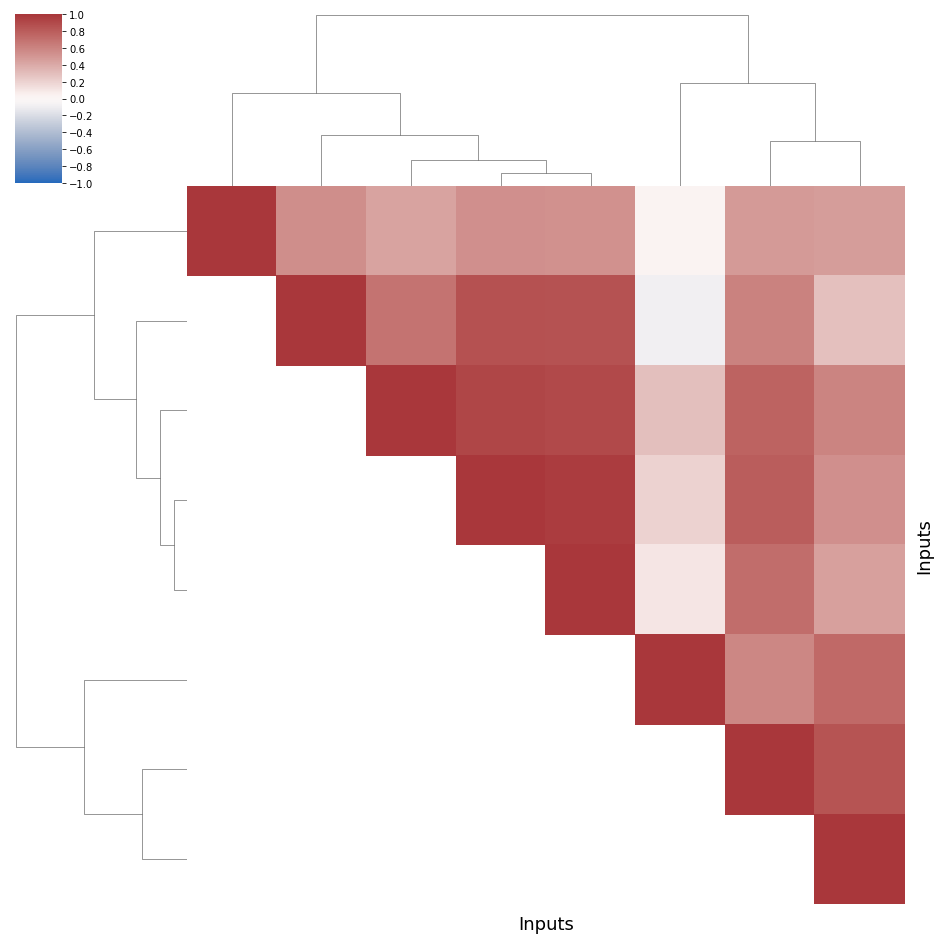

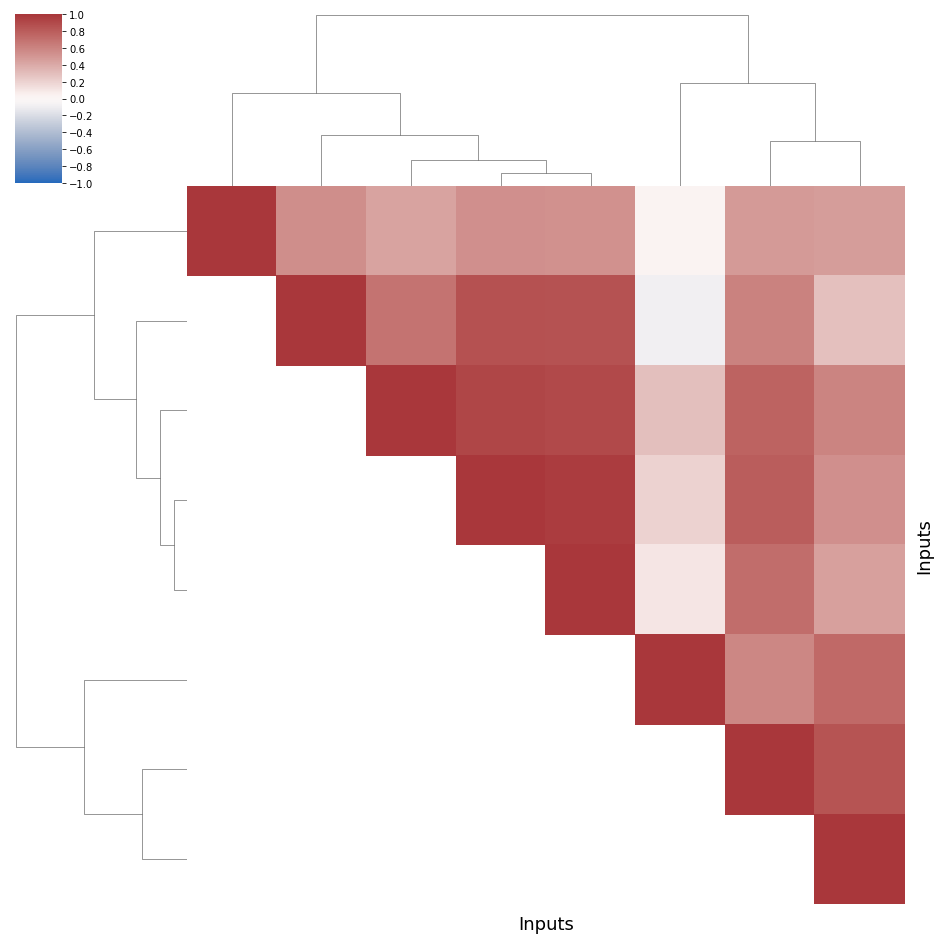

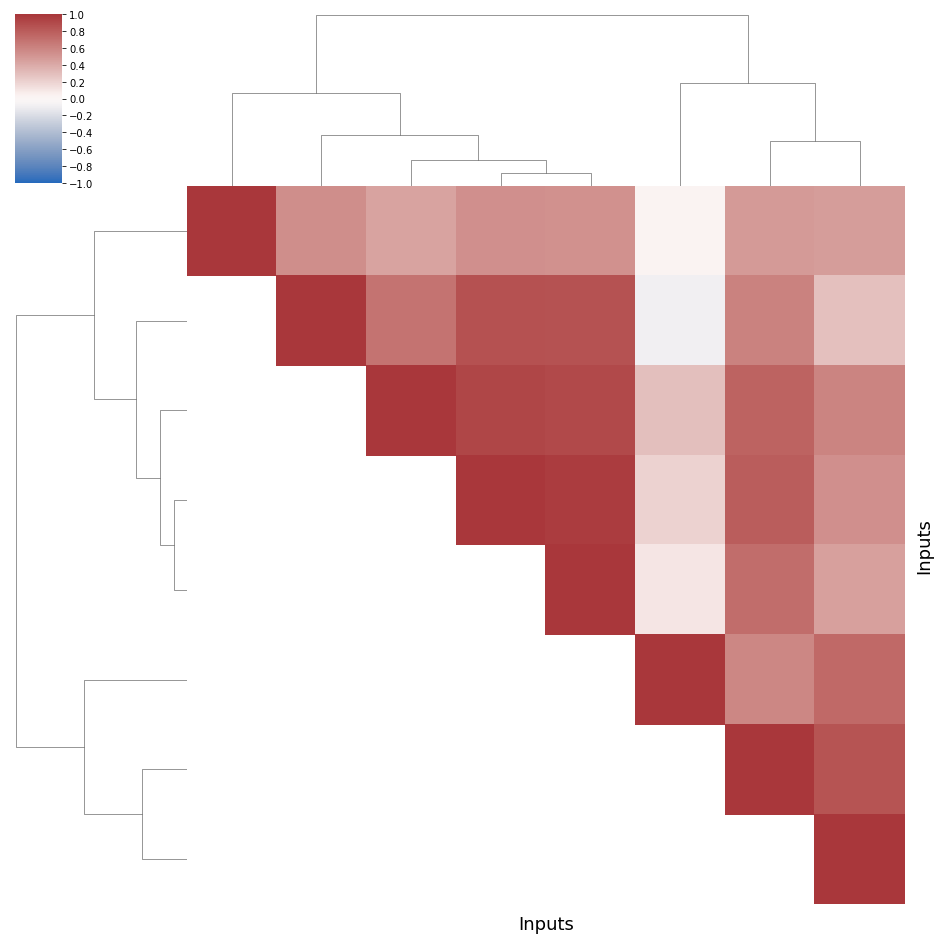

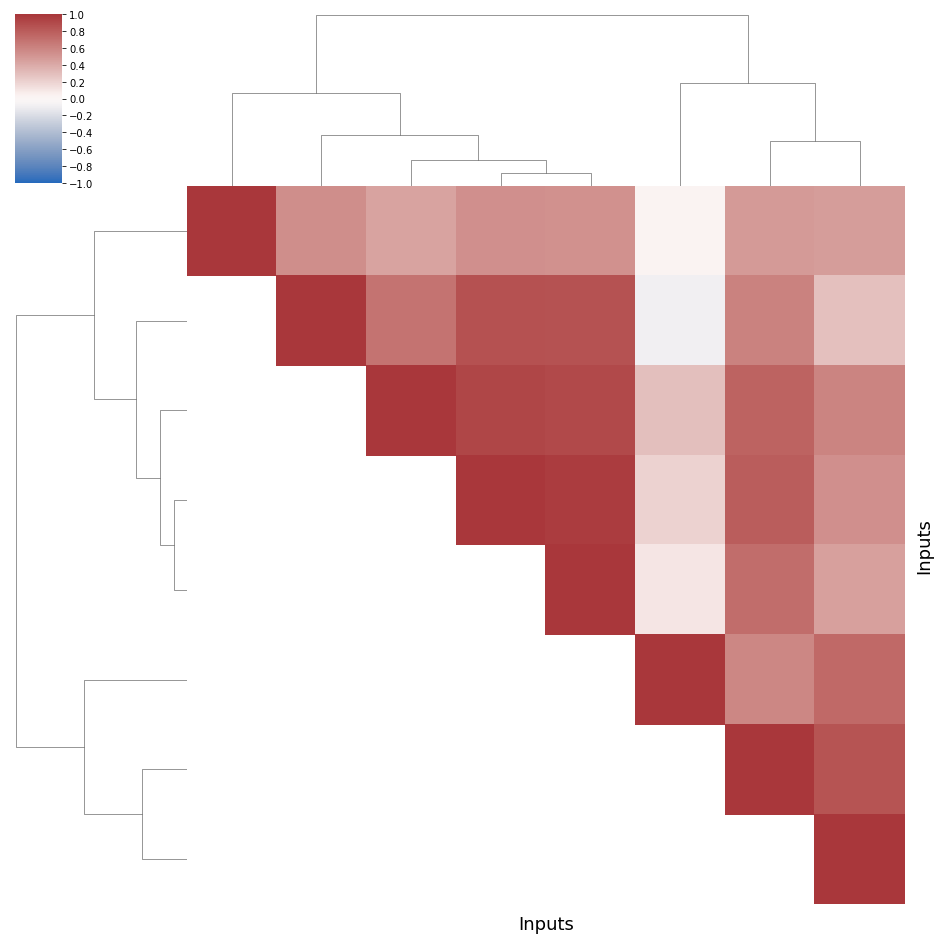

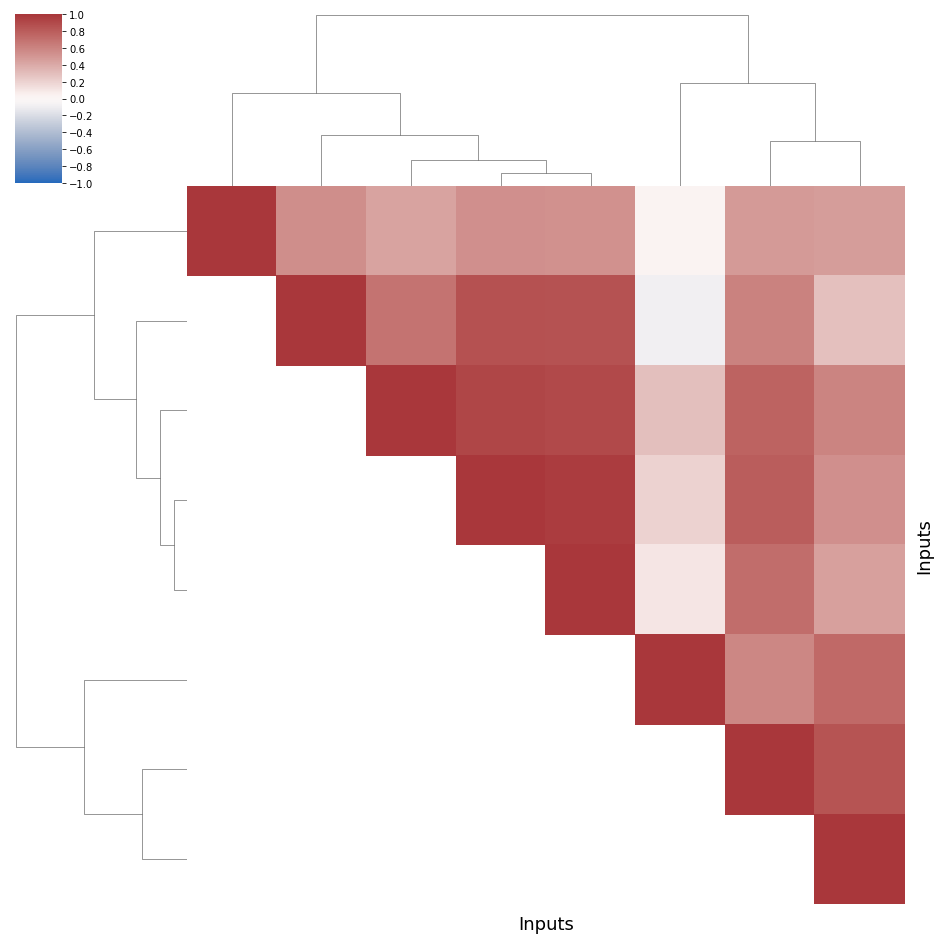

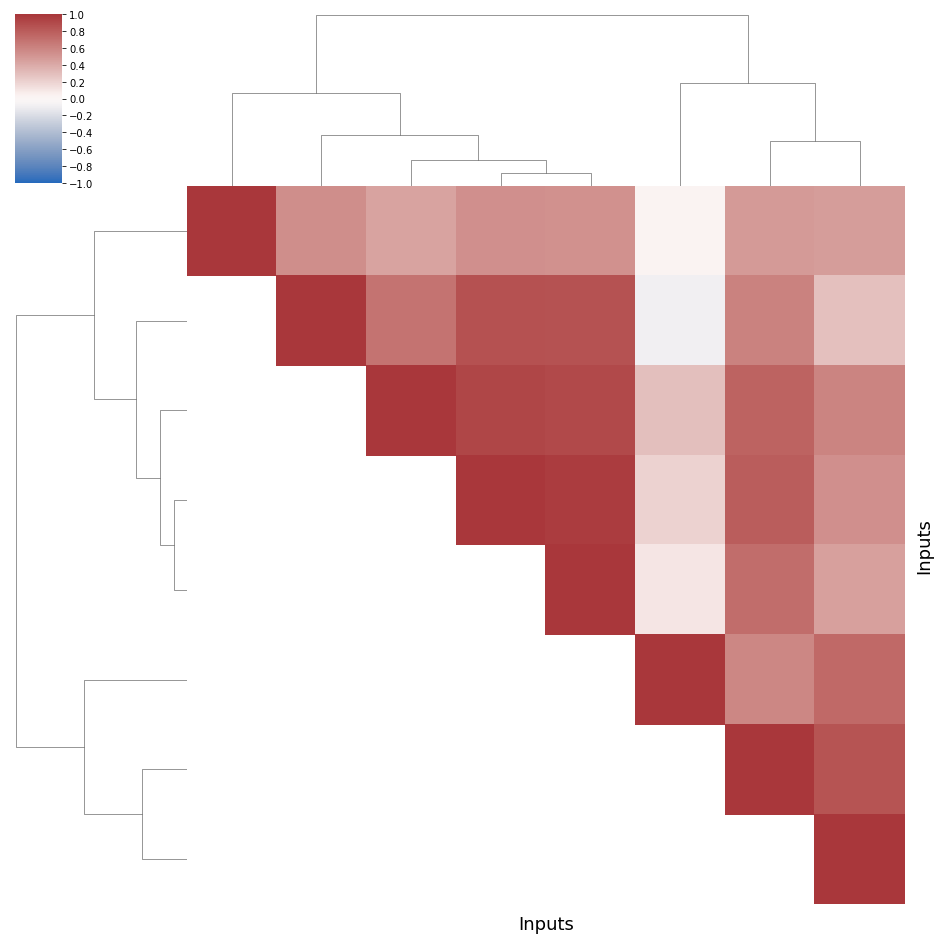

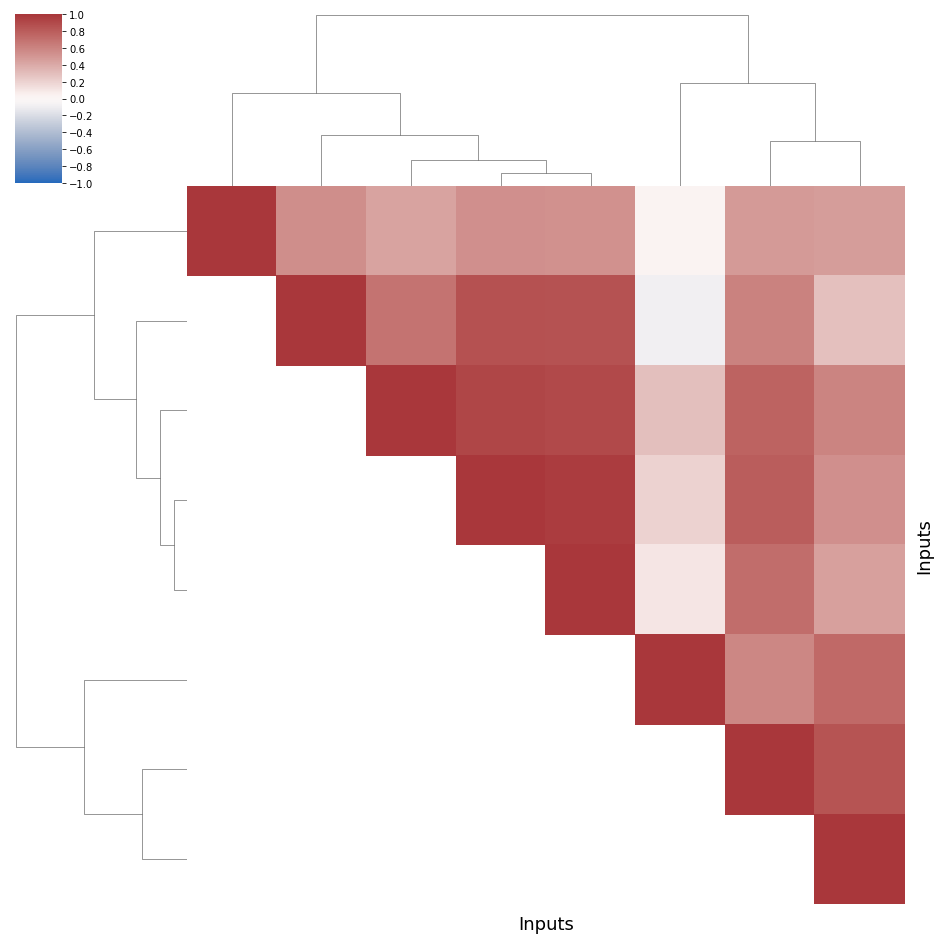

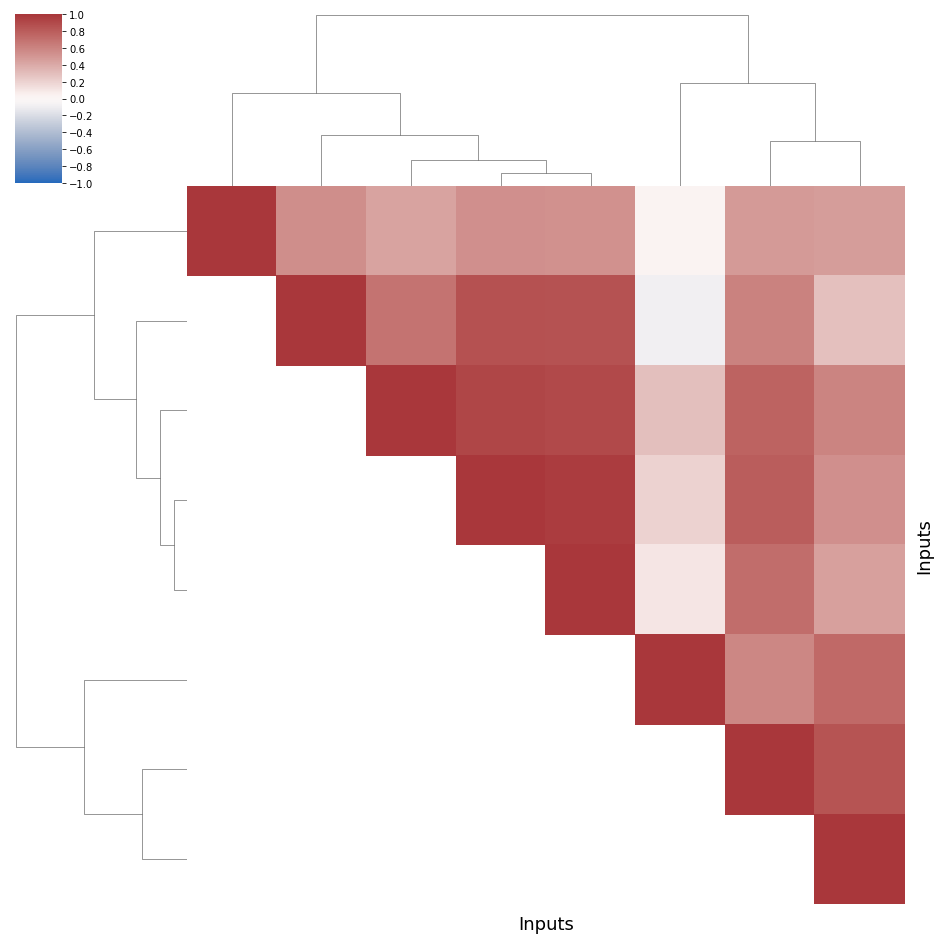

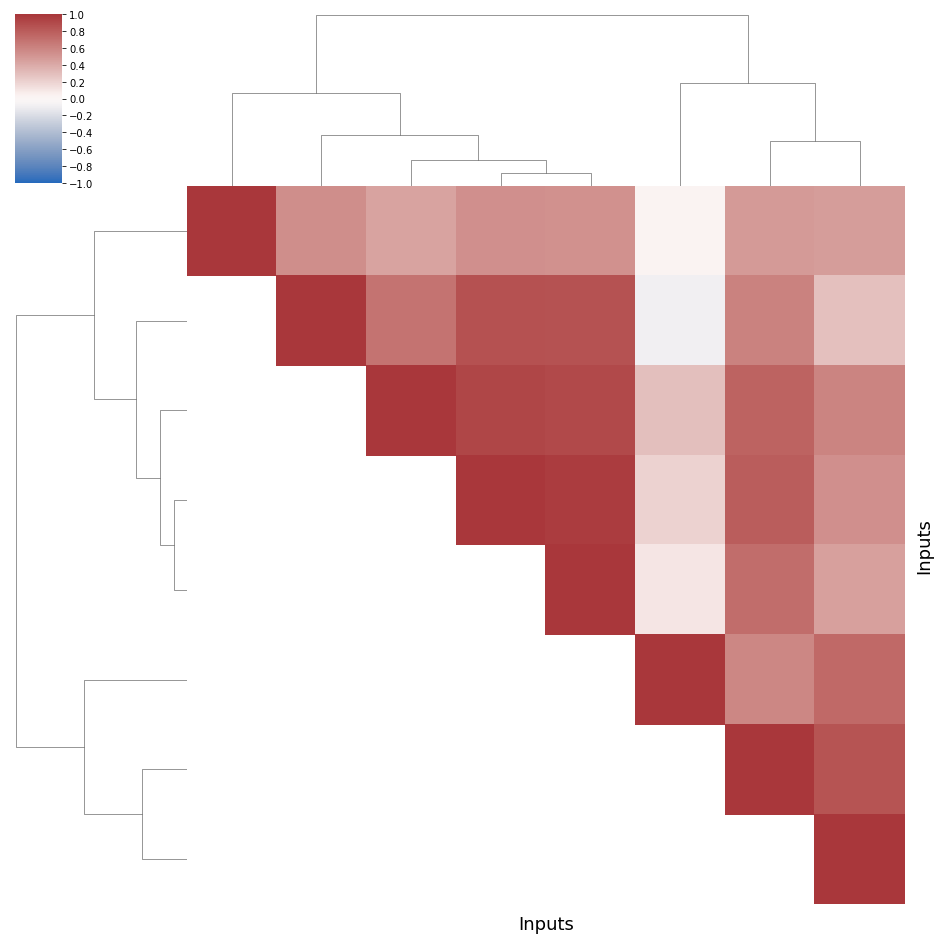

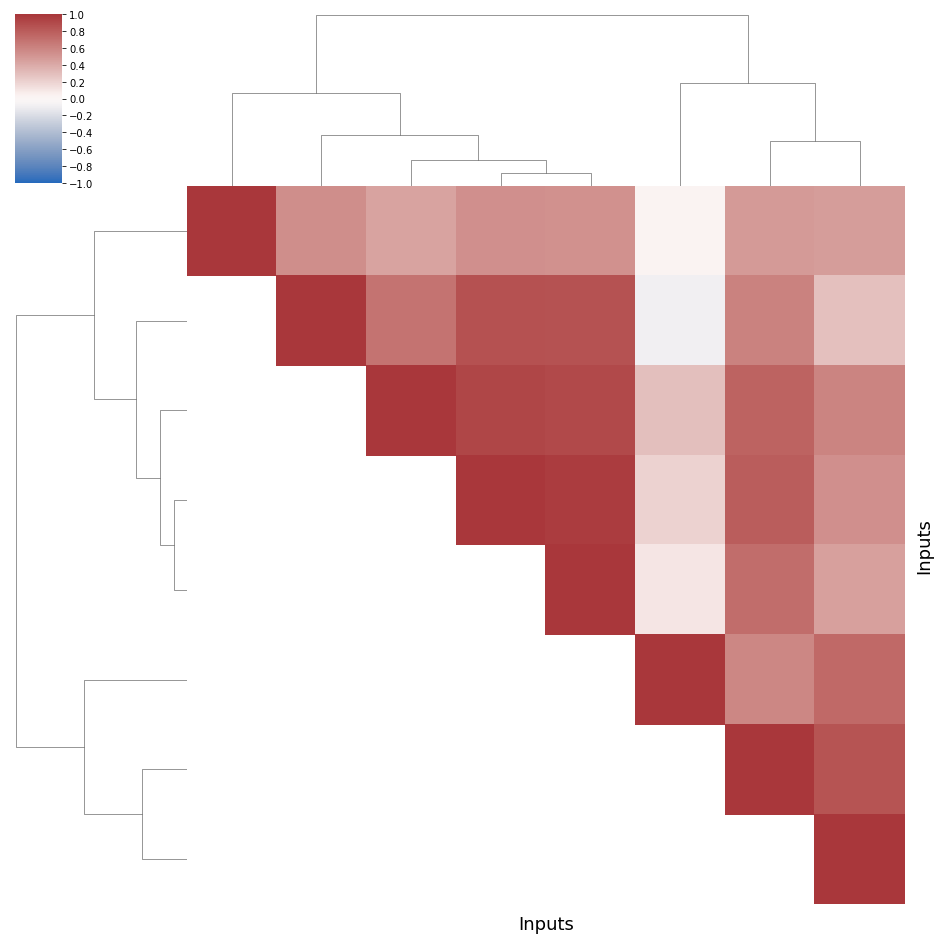

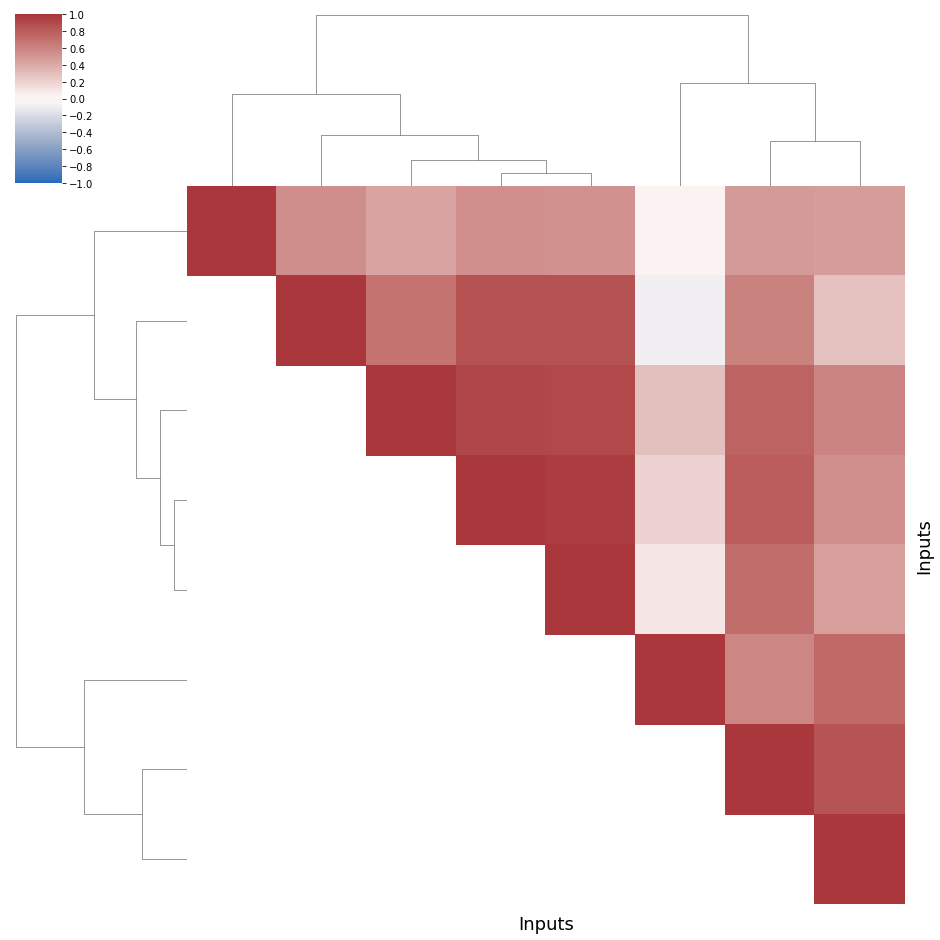

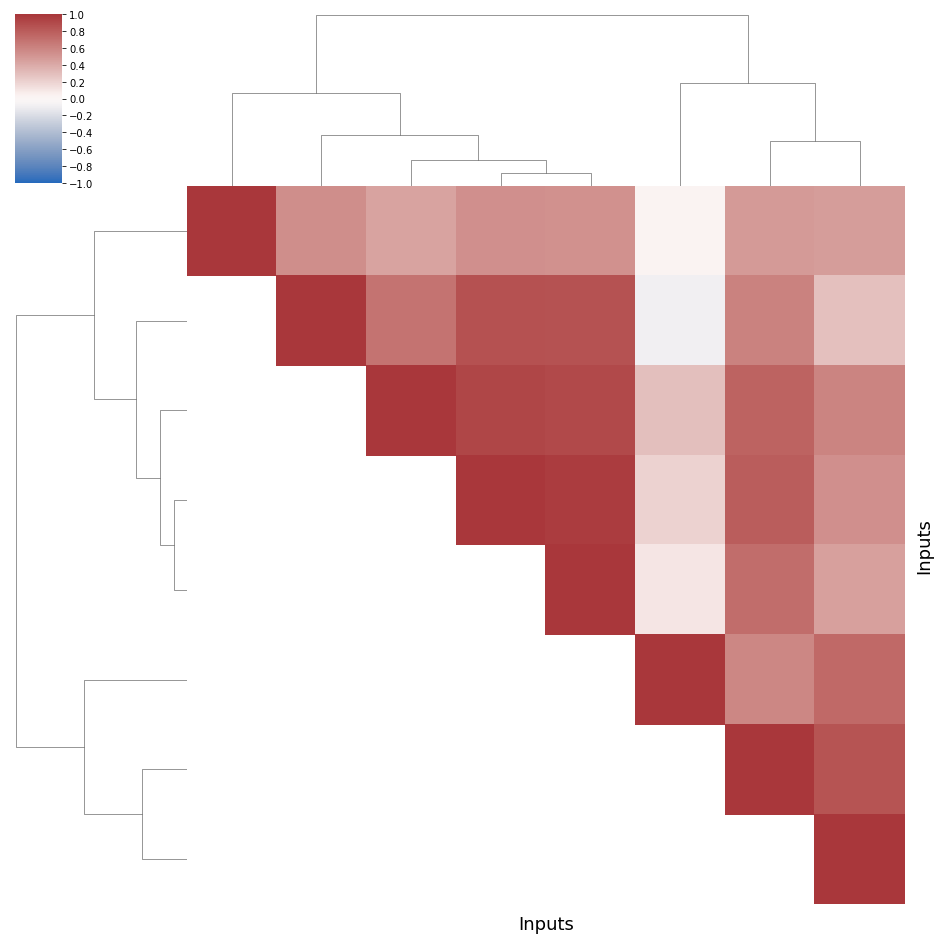

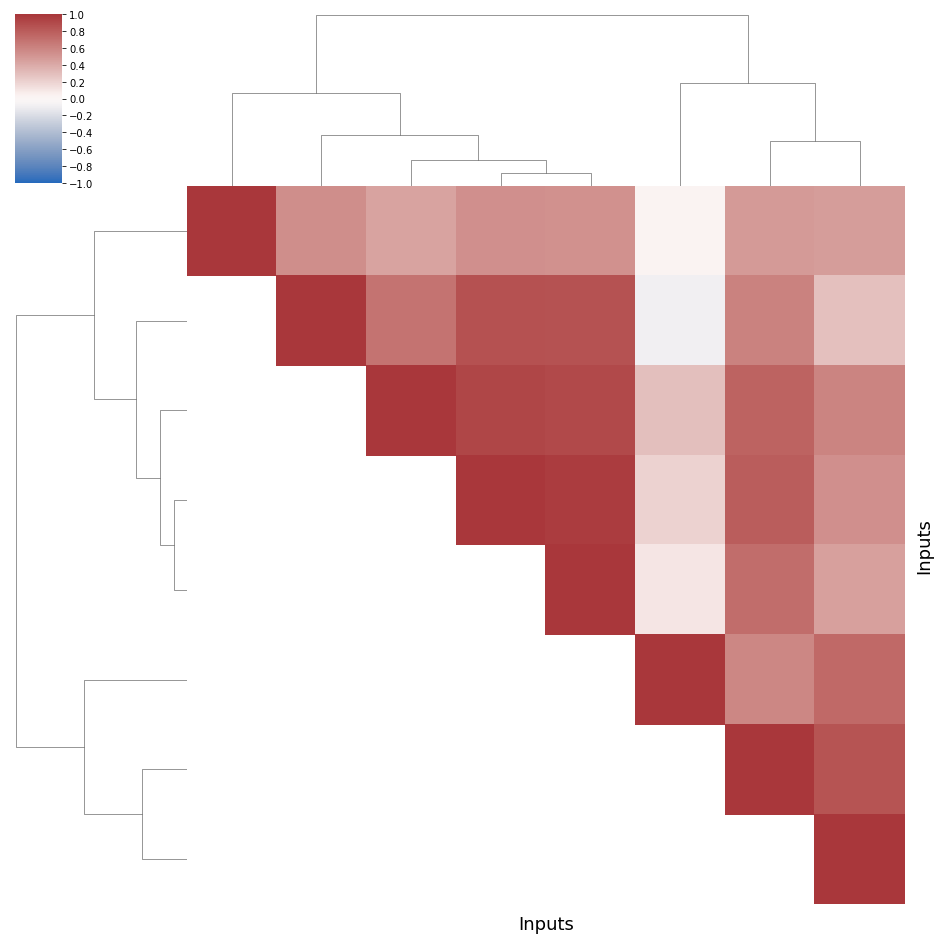

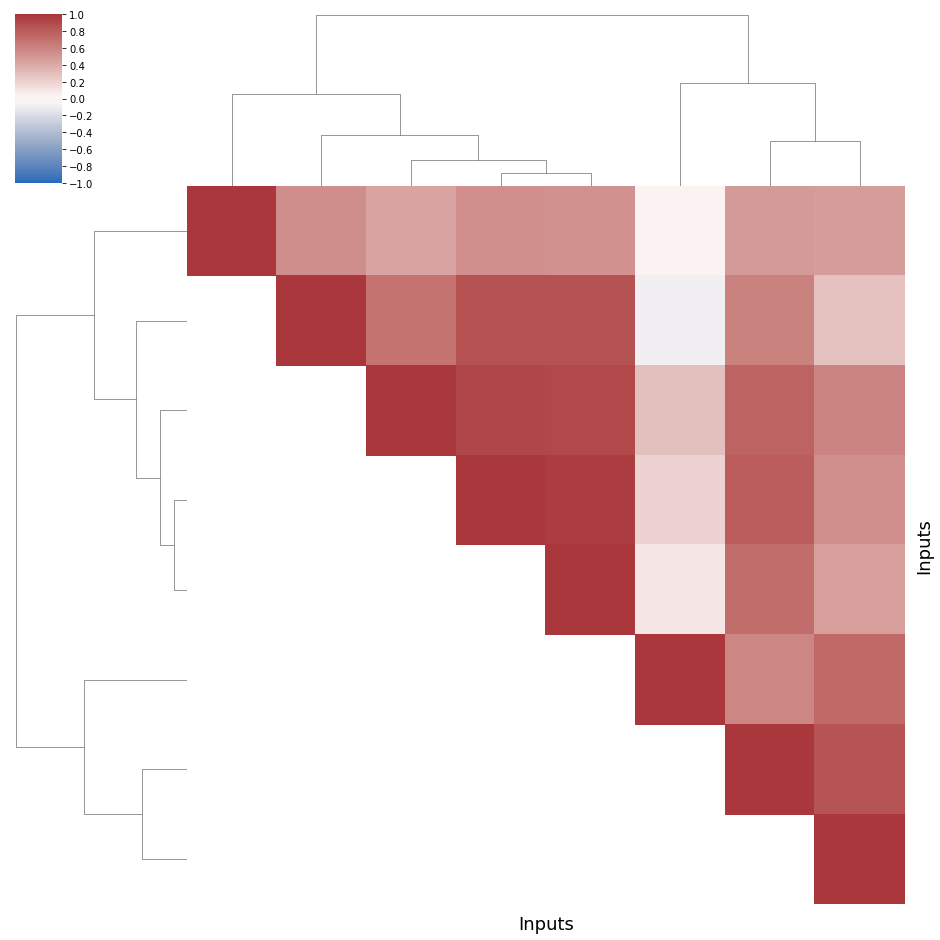

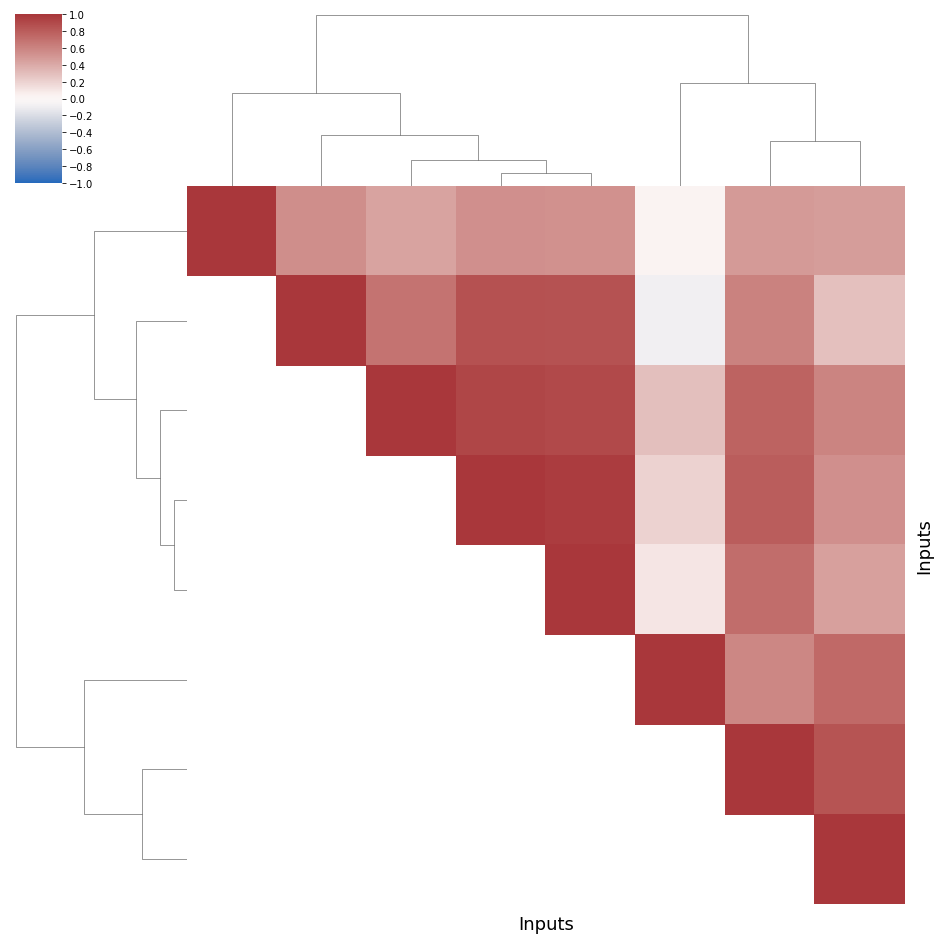

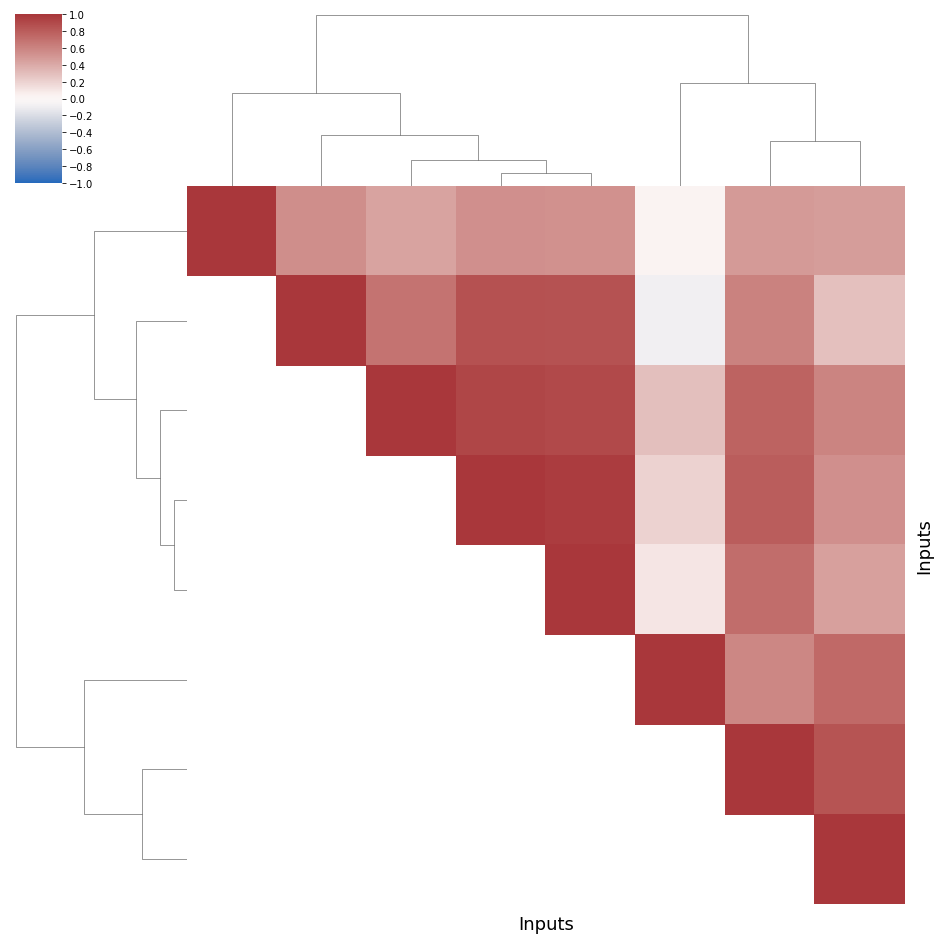

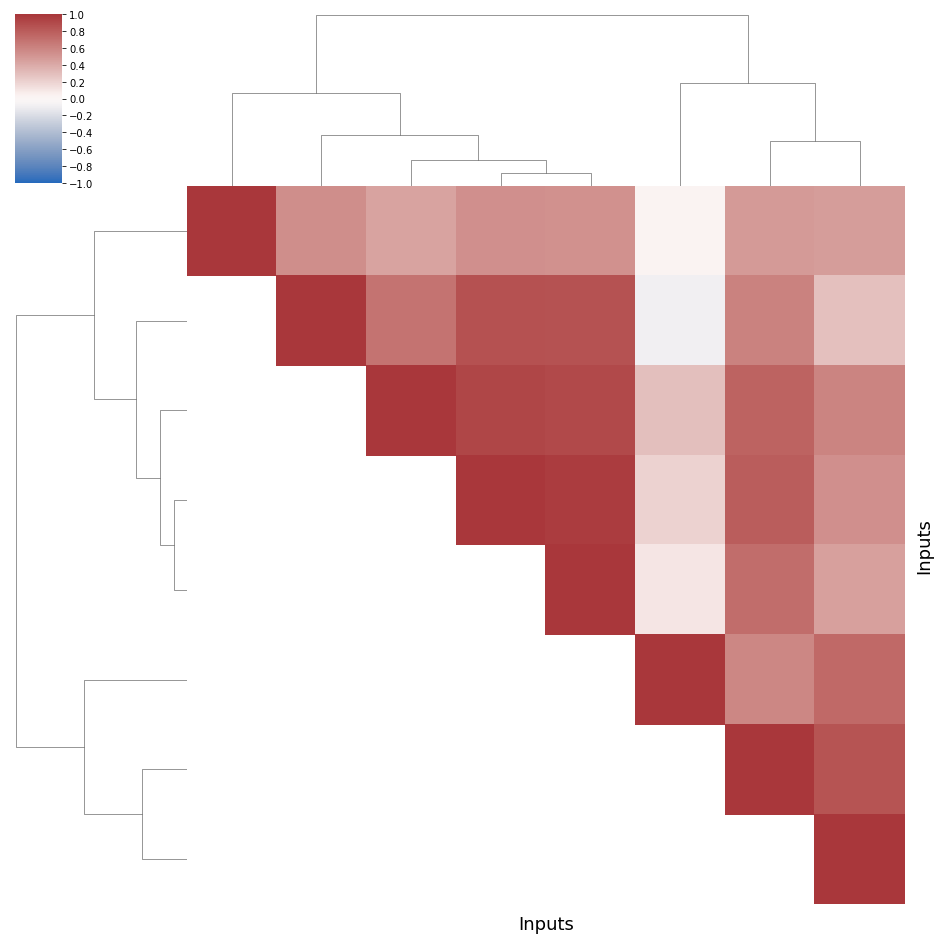

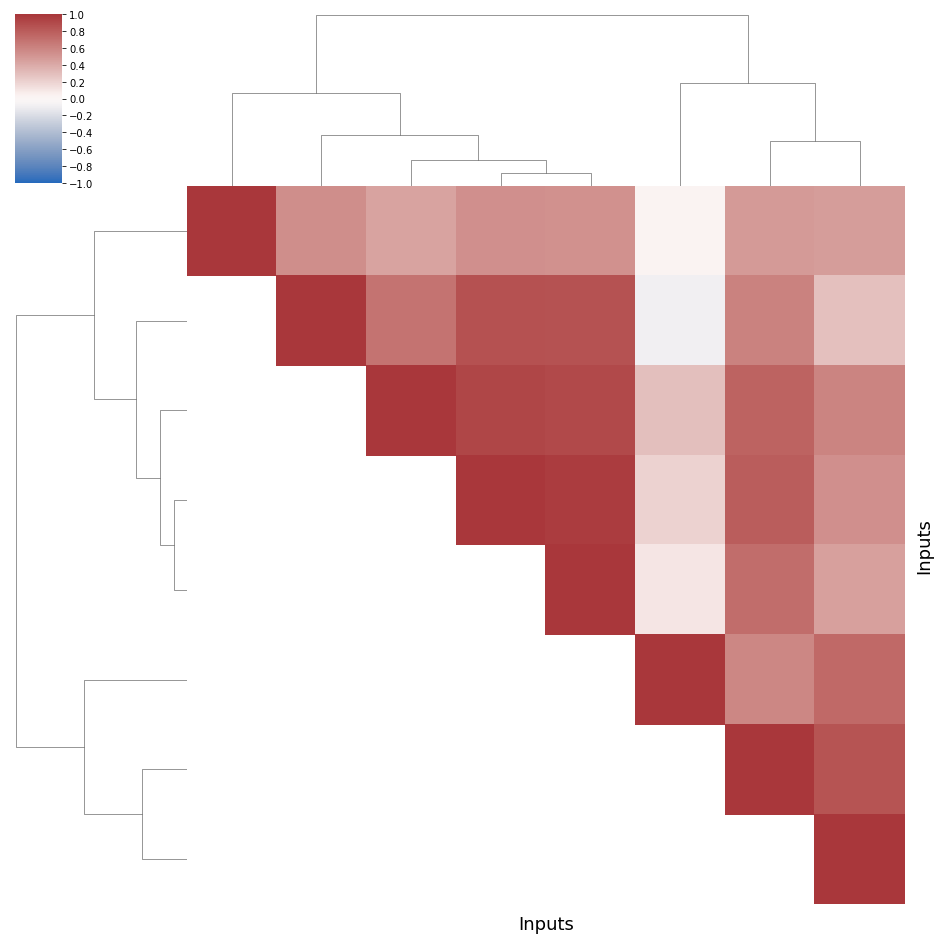

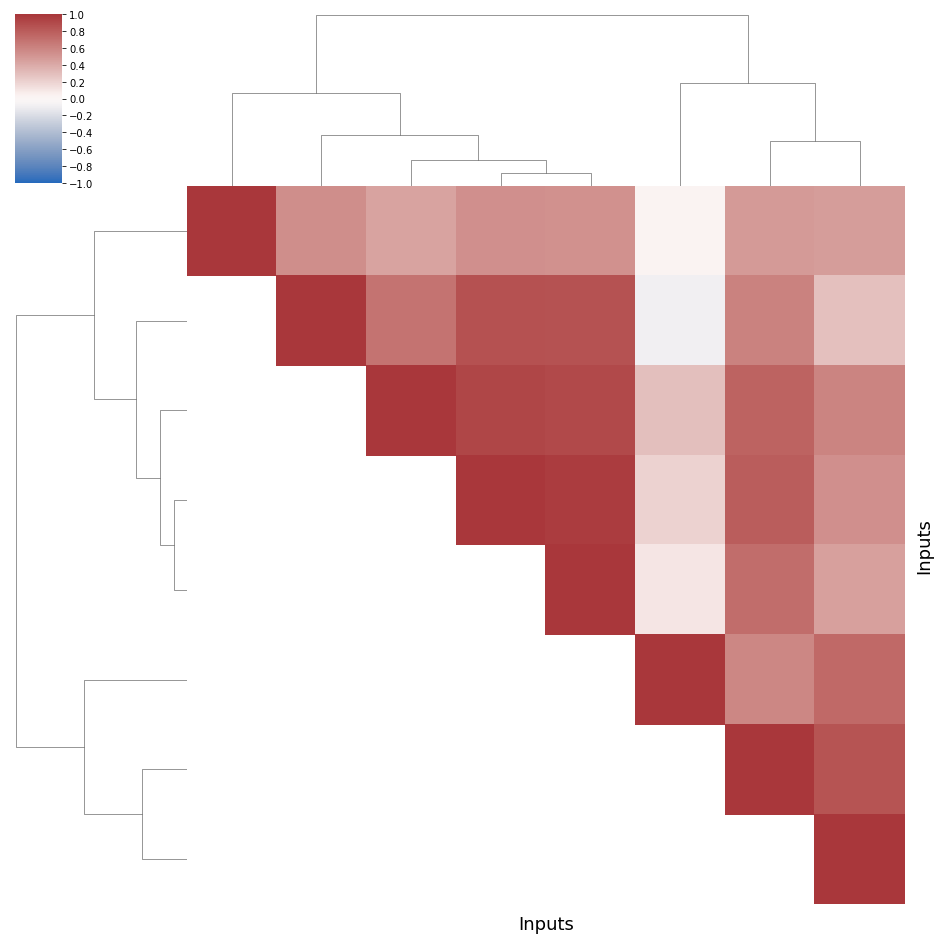

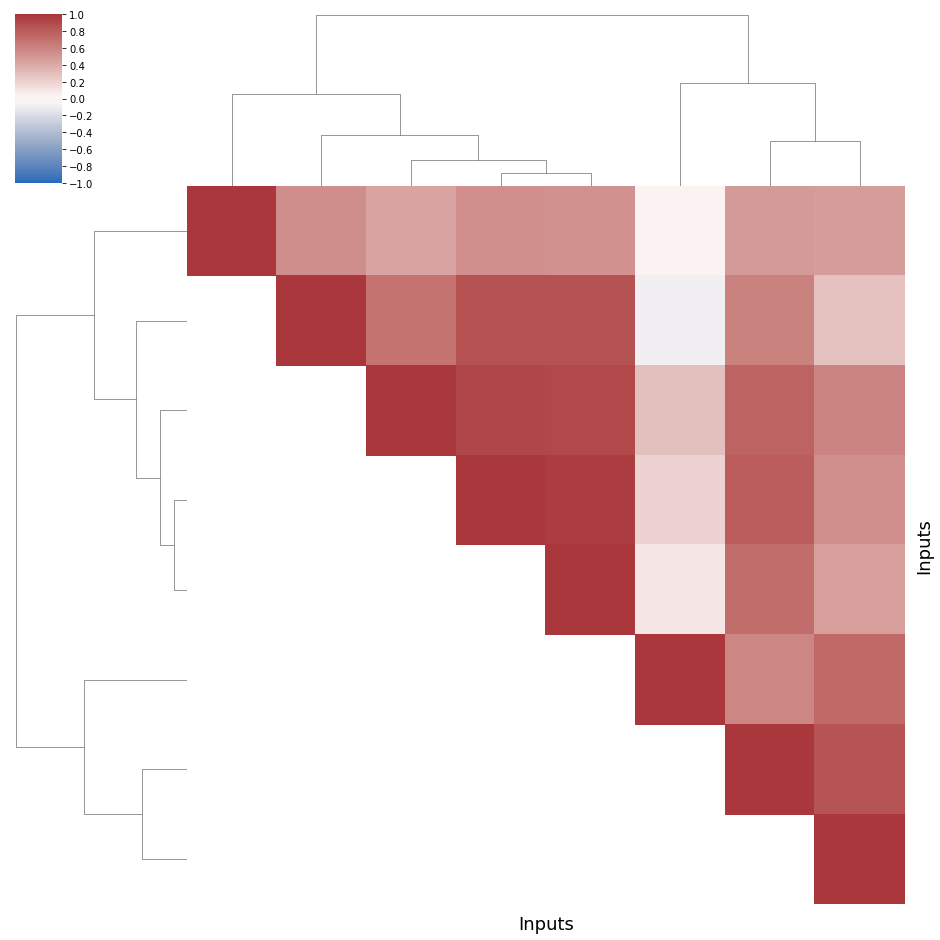

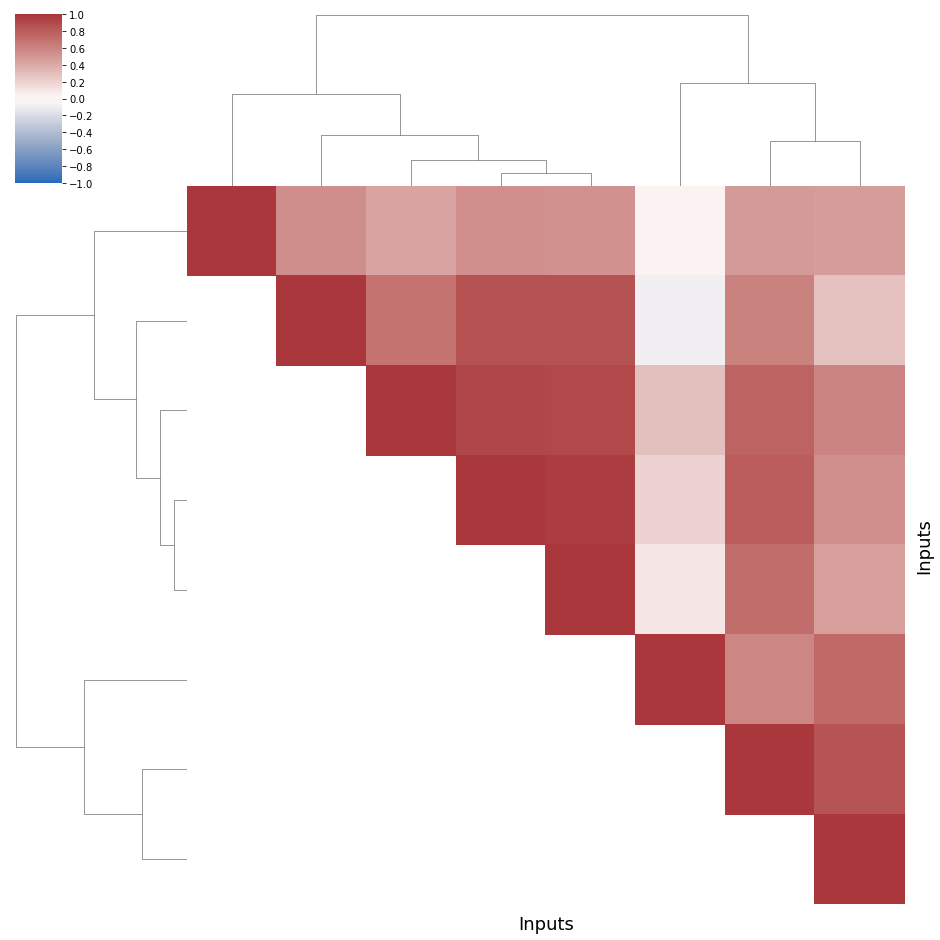

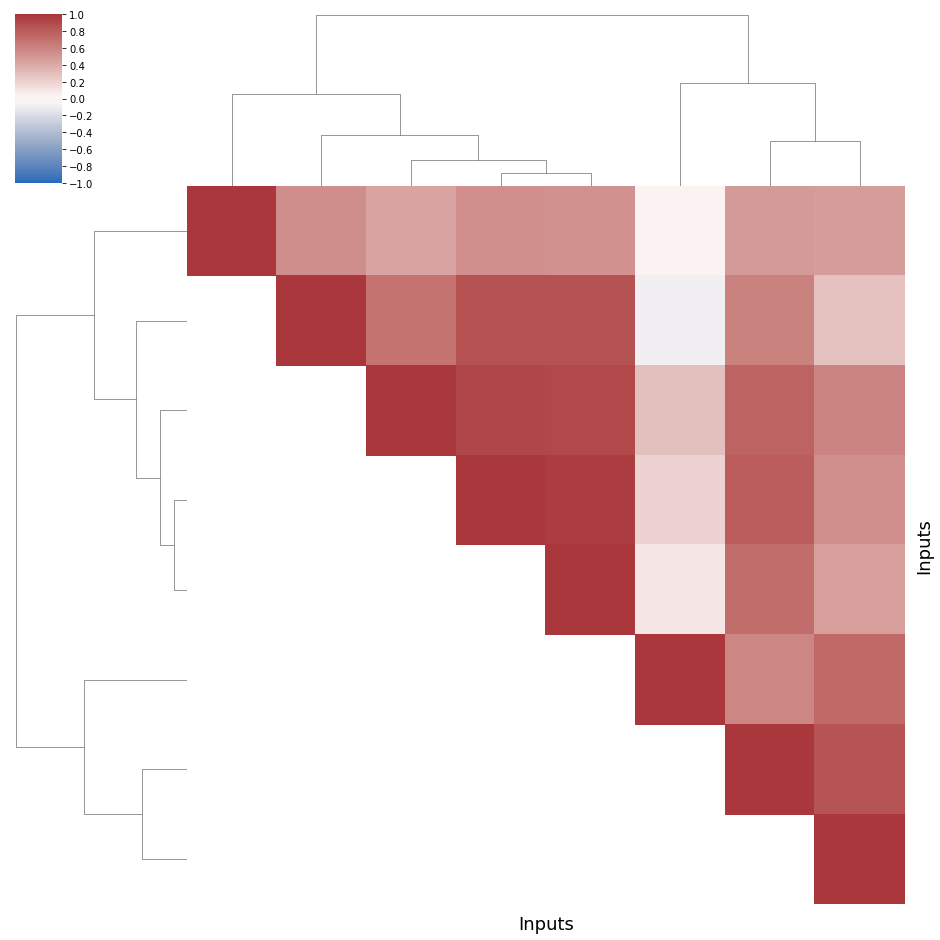

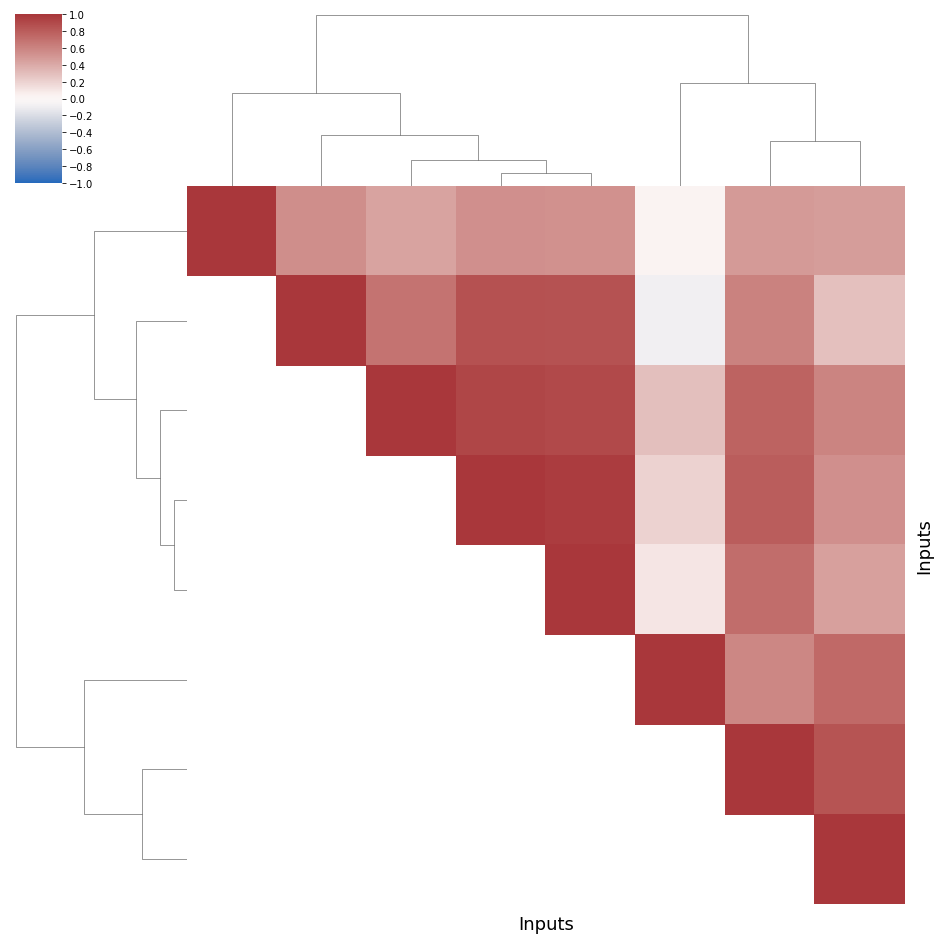

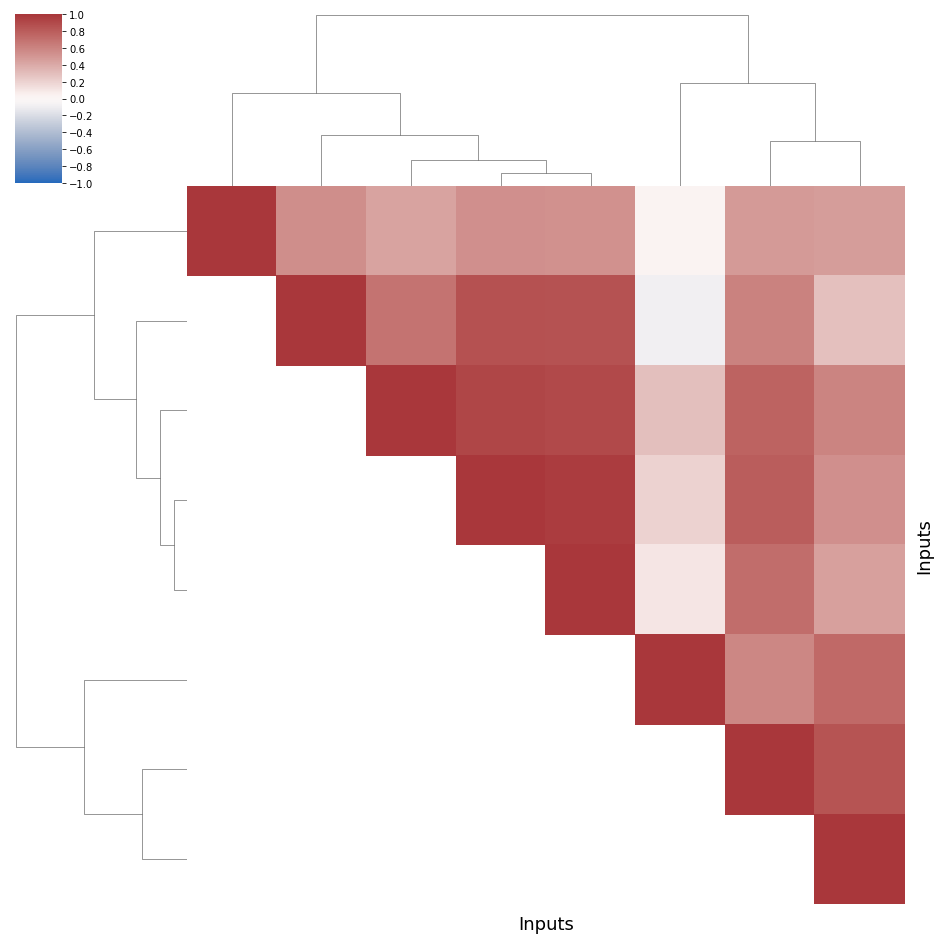

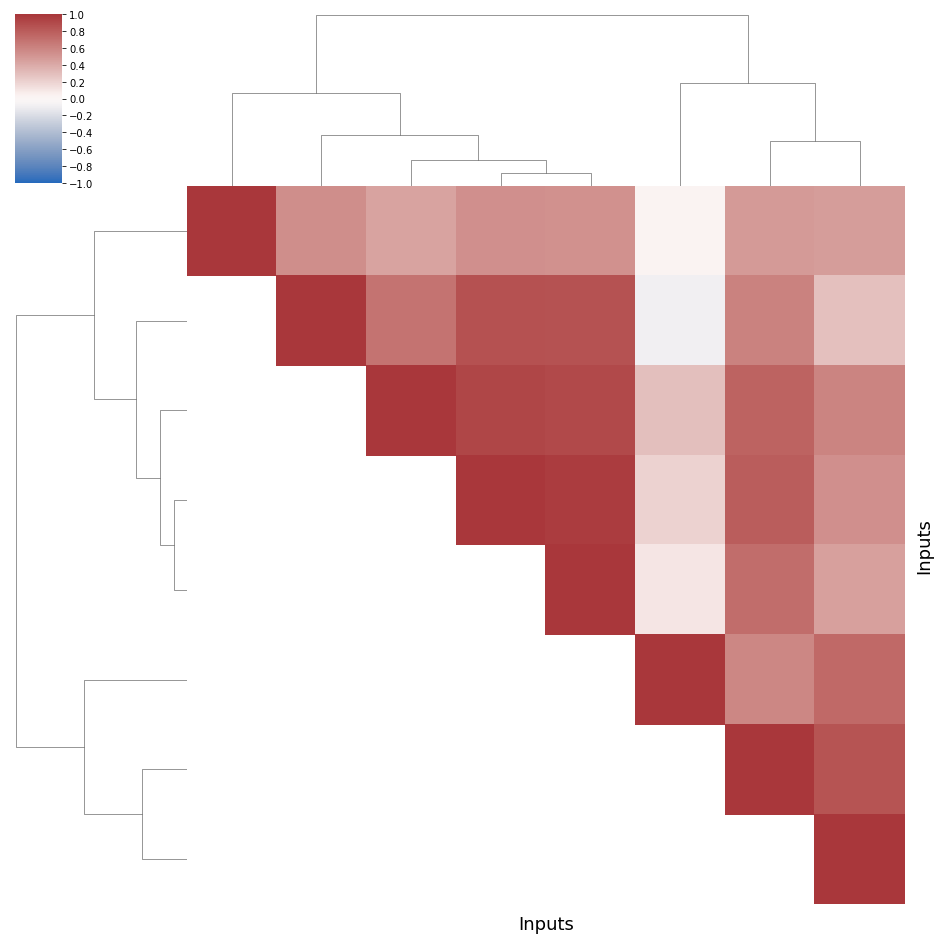

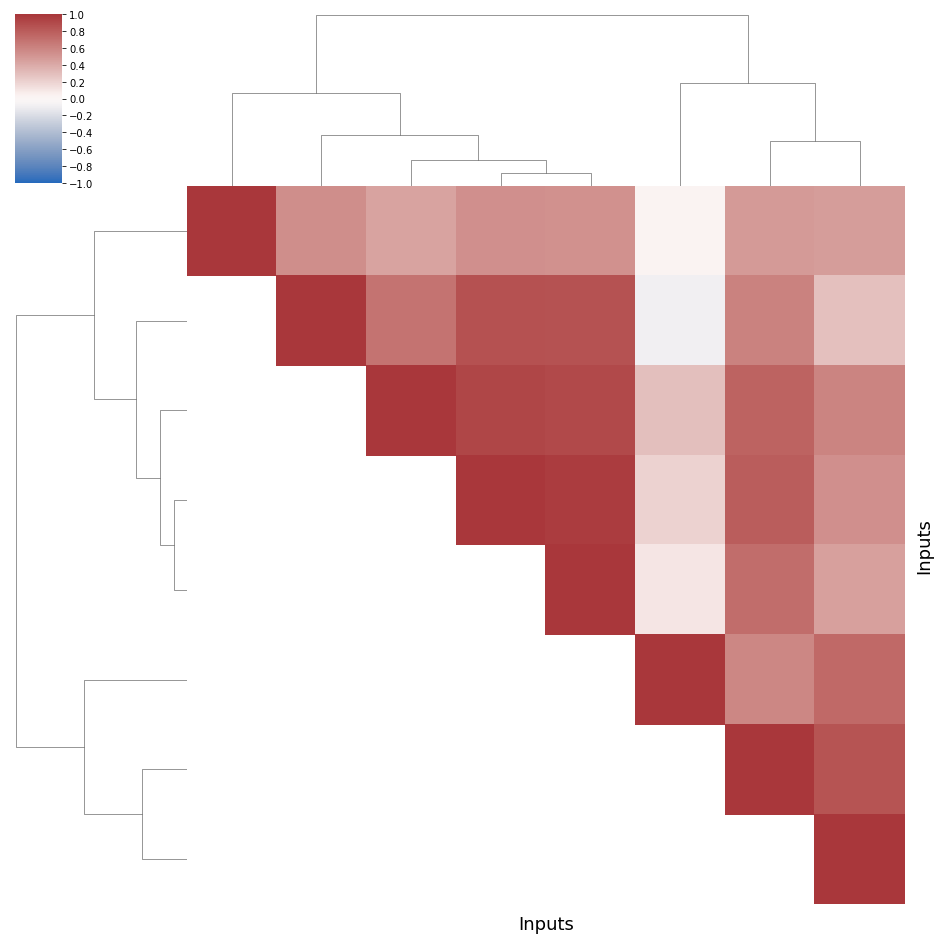

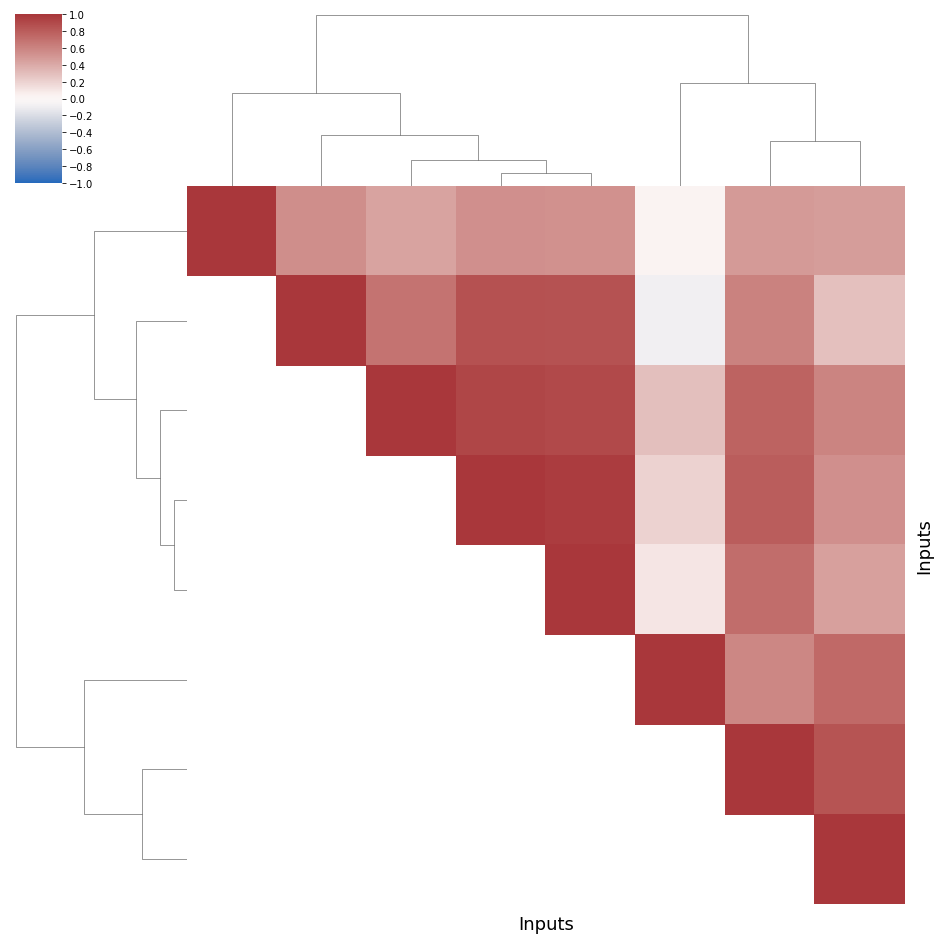

In [33]:
for index_hardware in range(hard_count):
    plot_correlationmatrix_dendogram(index_hardware, "kbs")

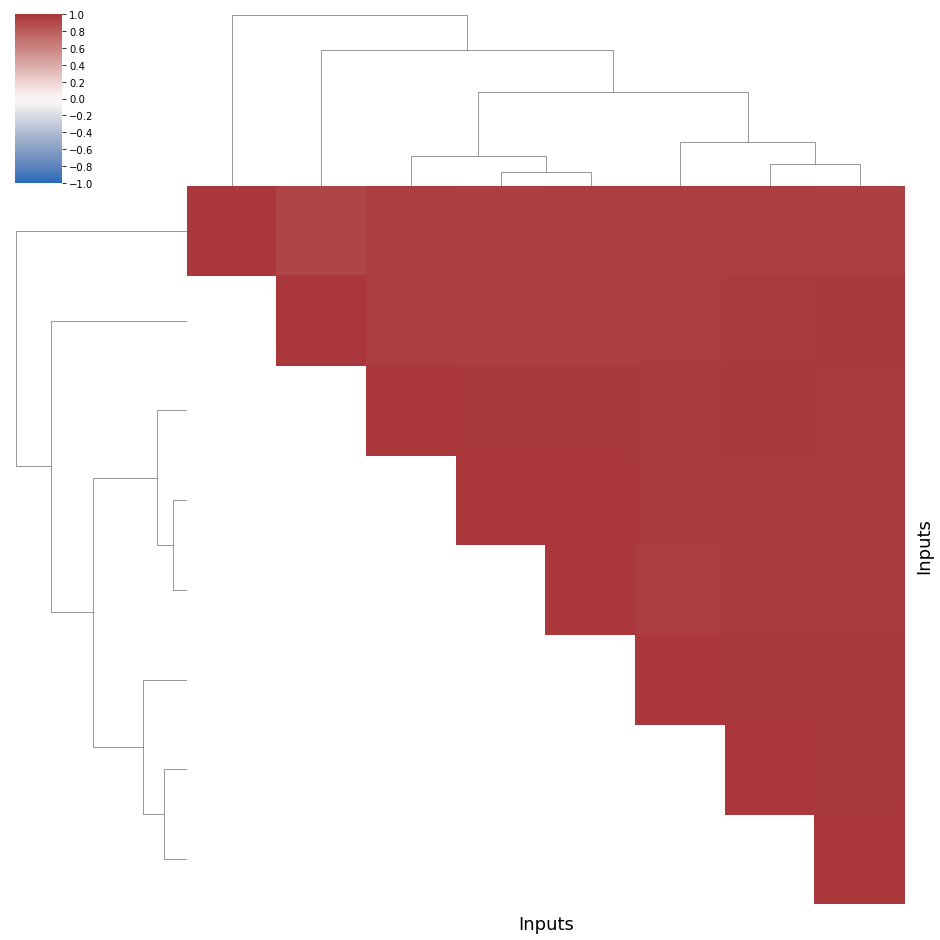

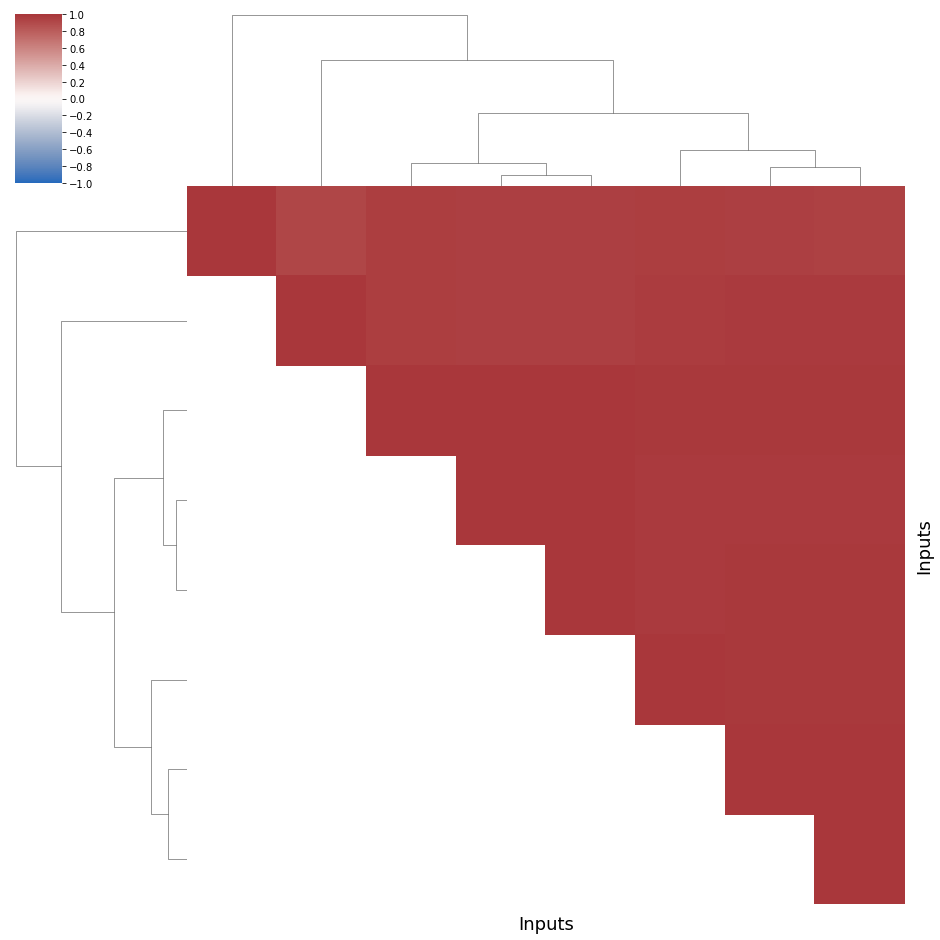

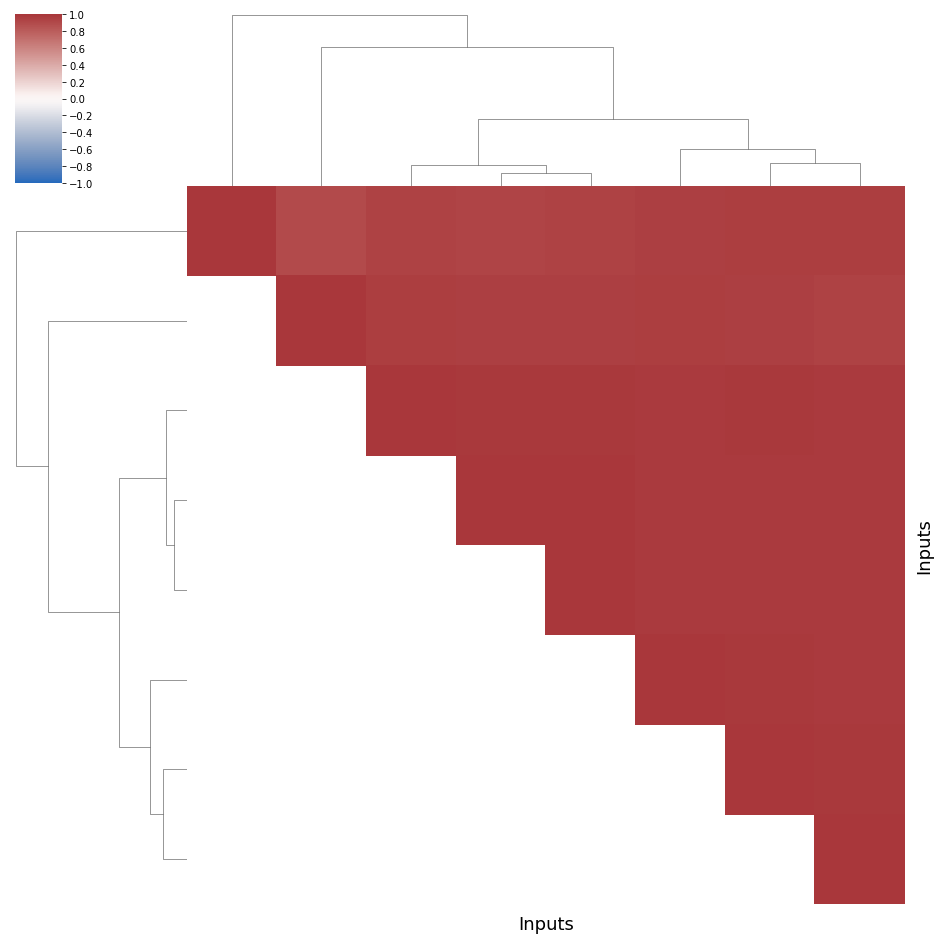

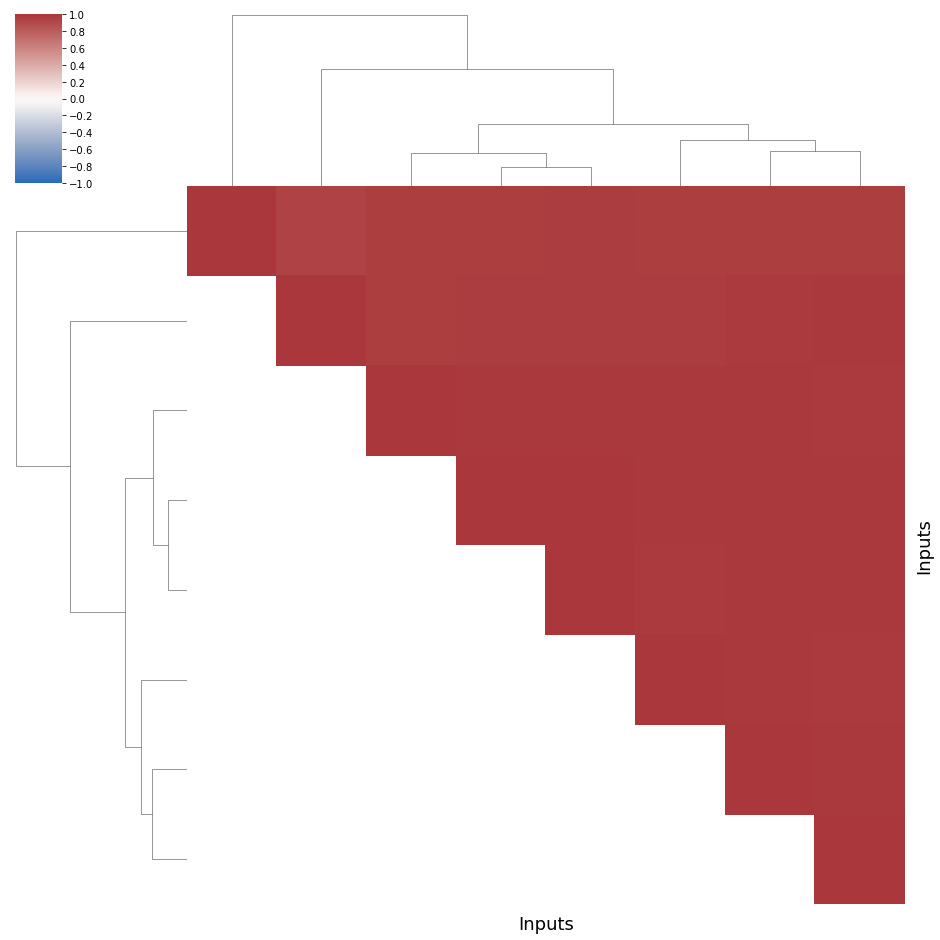

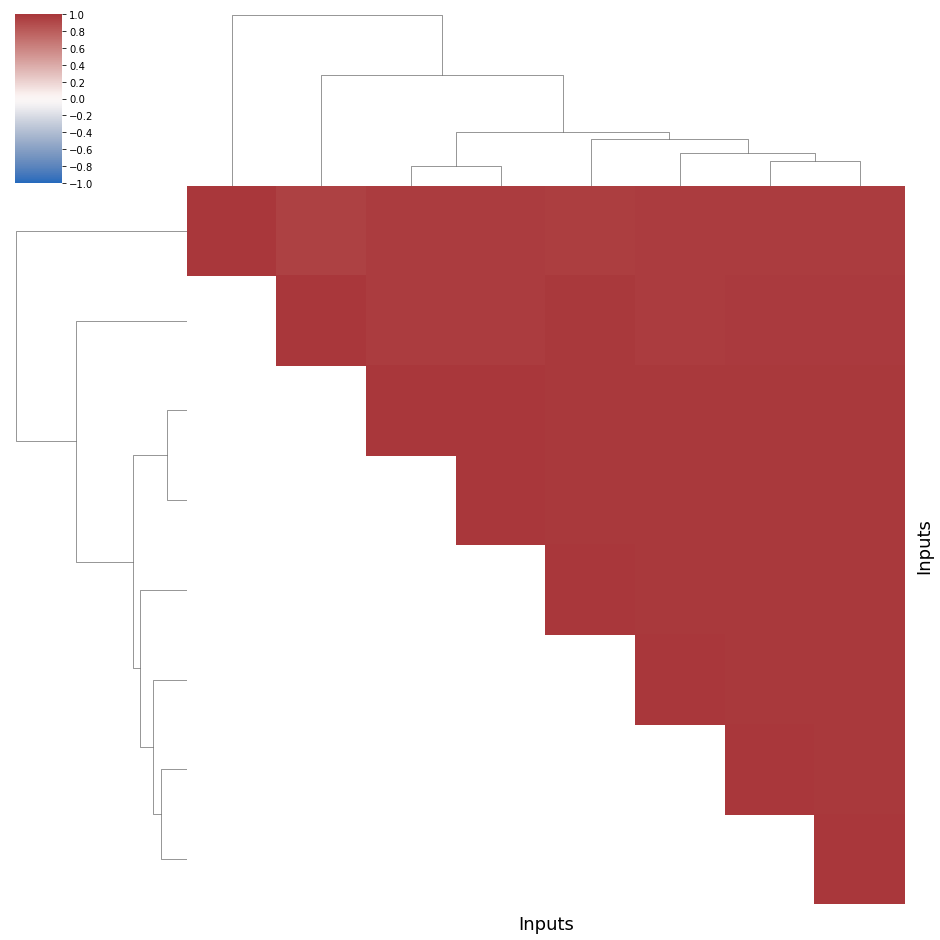

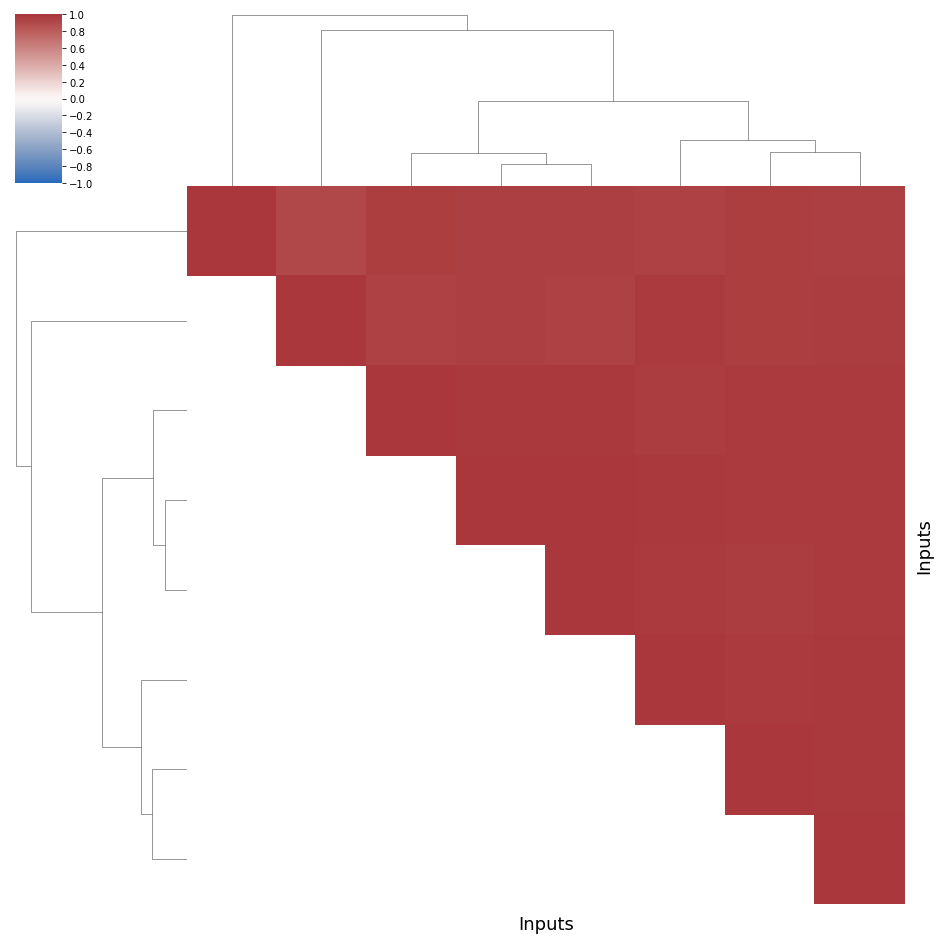

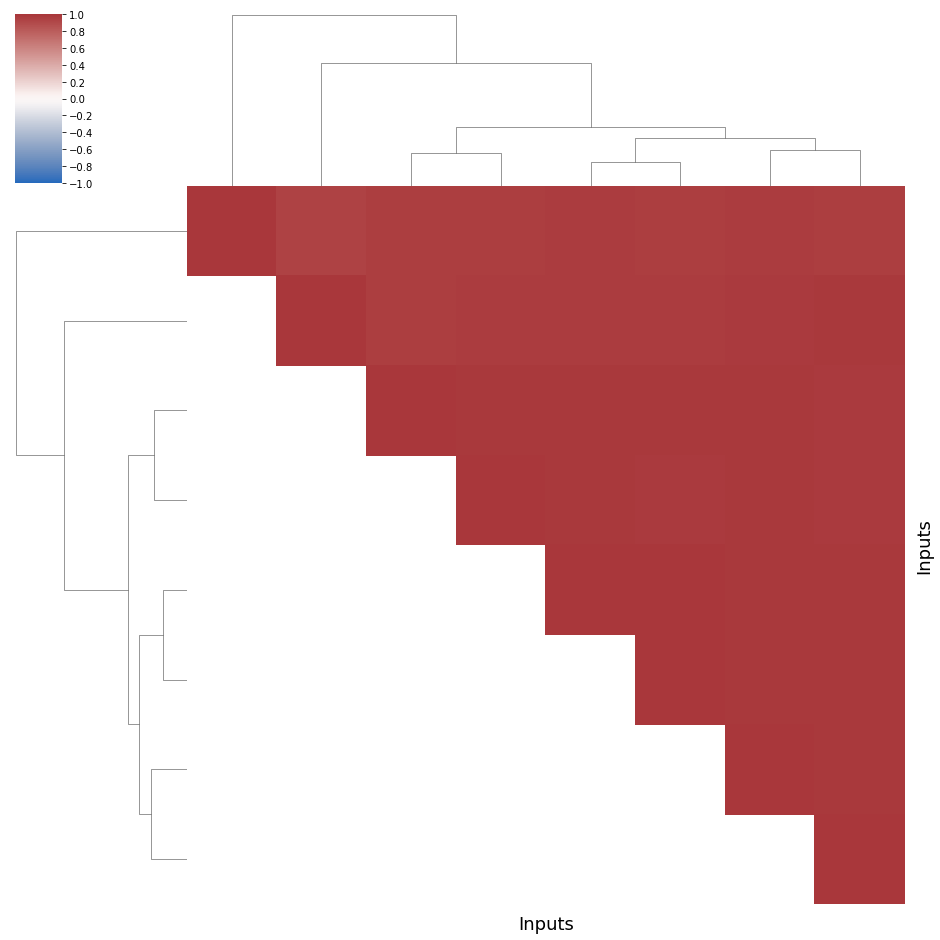

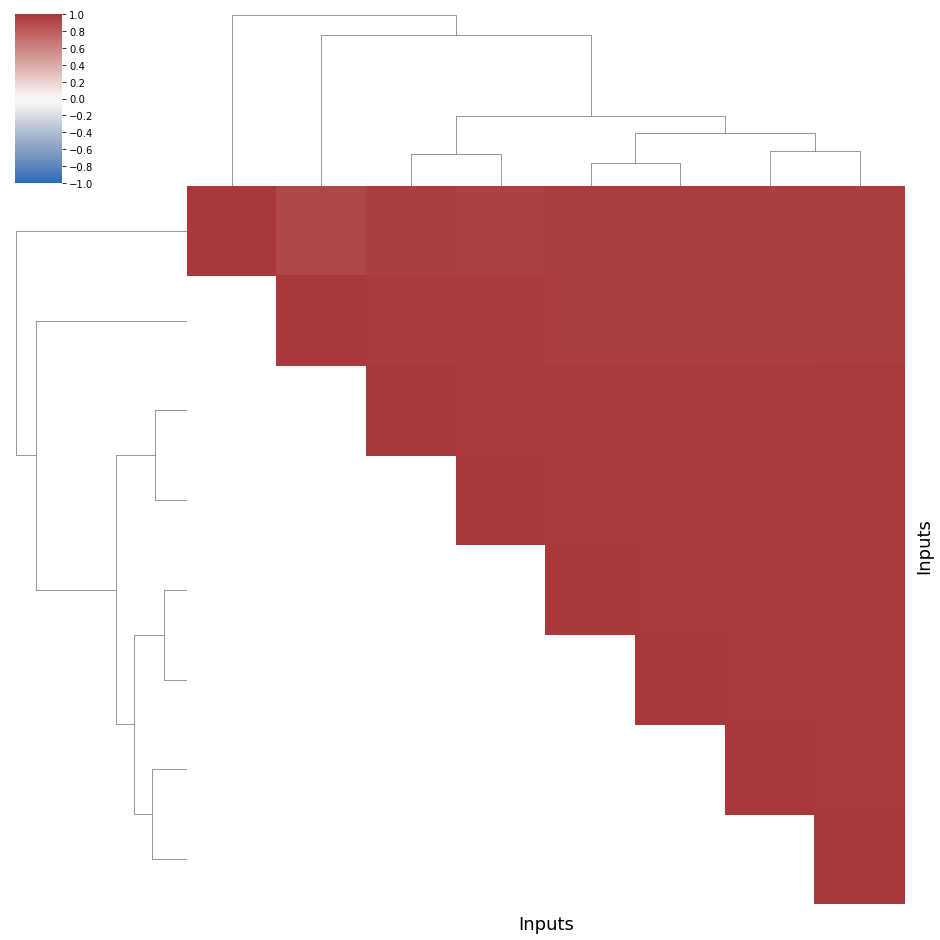

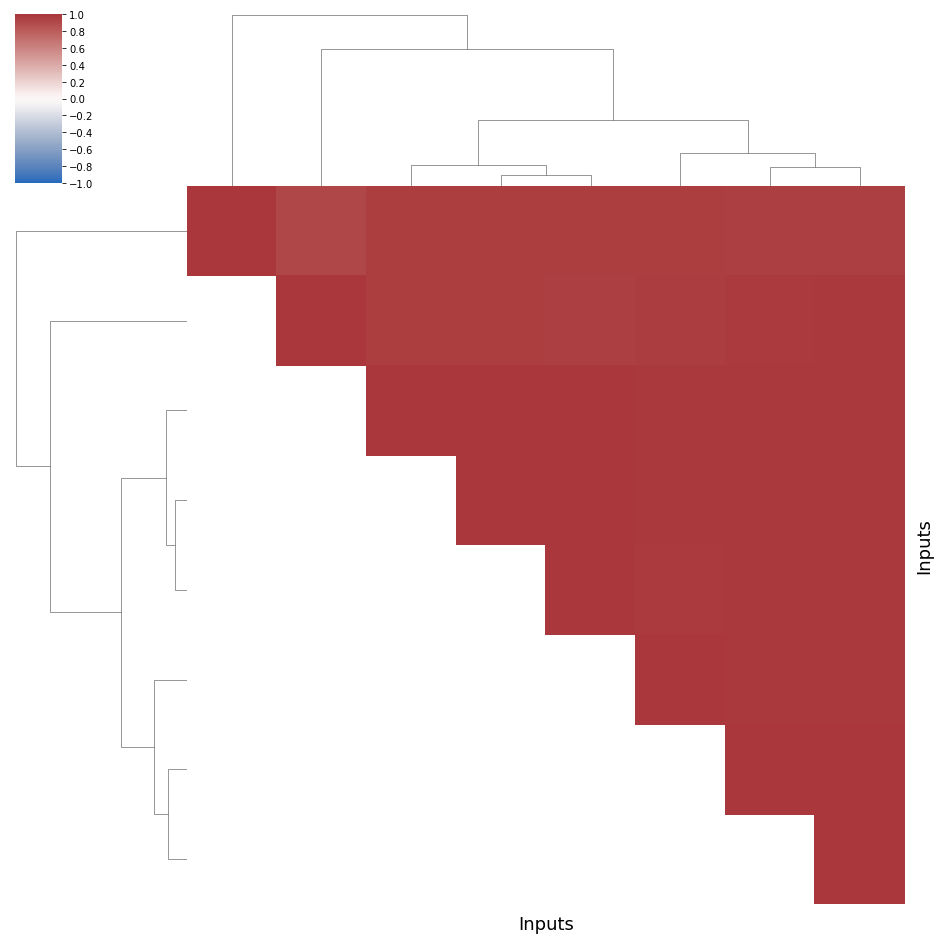

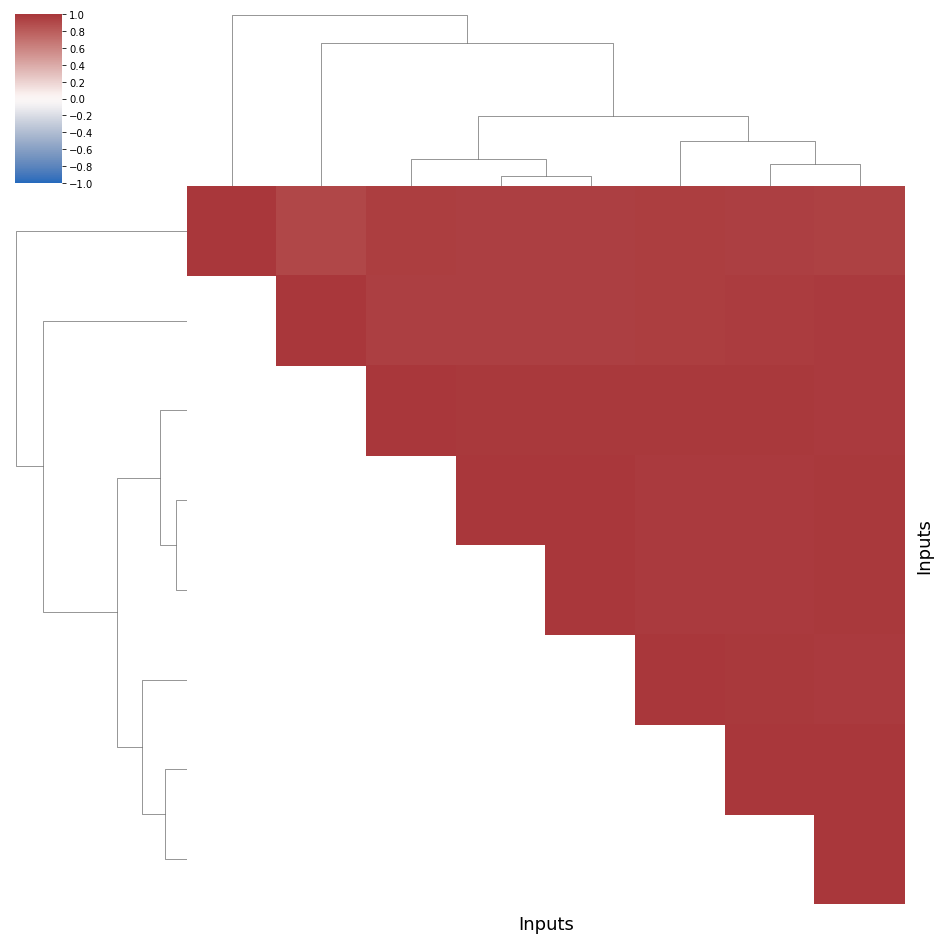

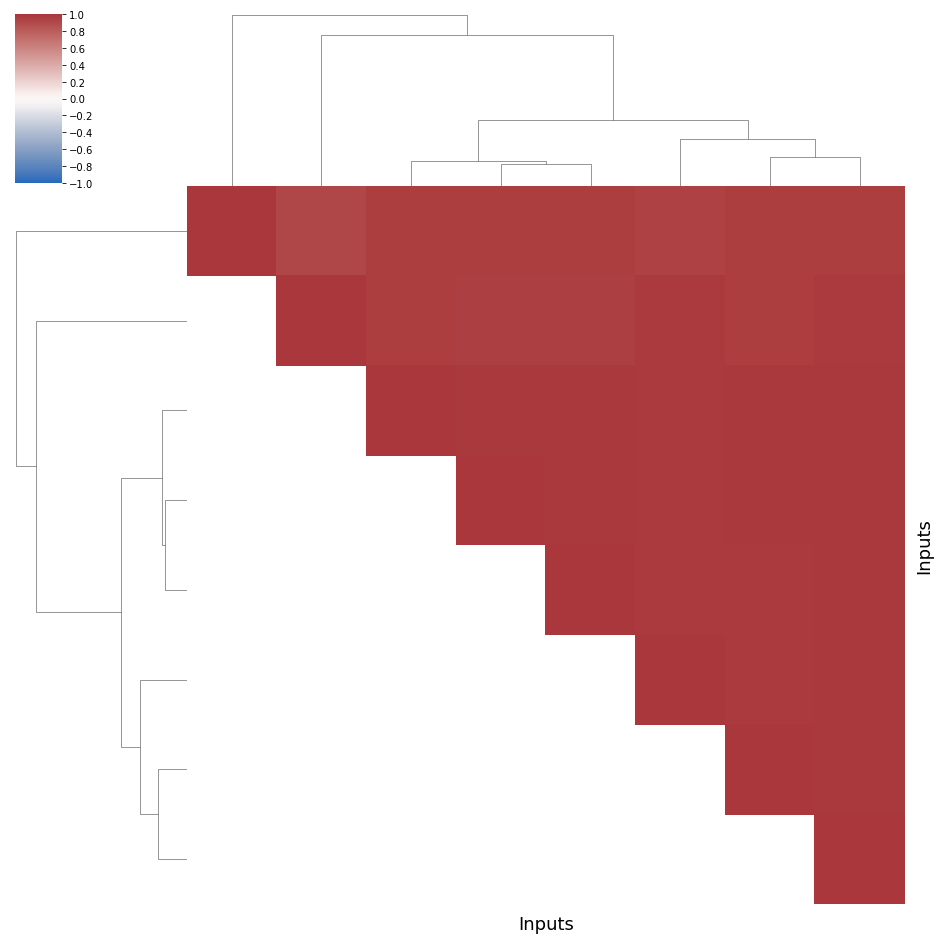

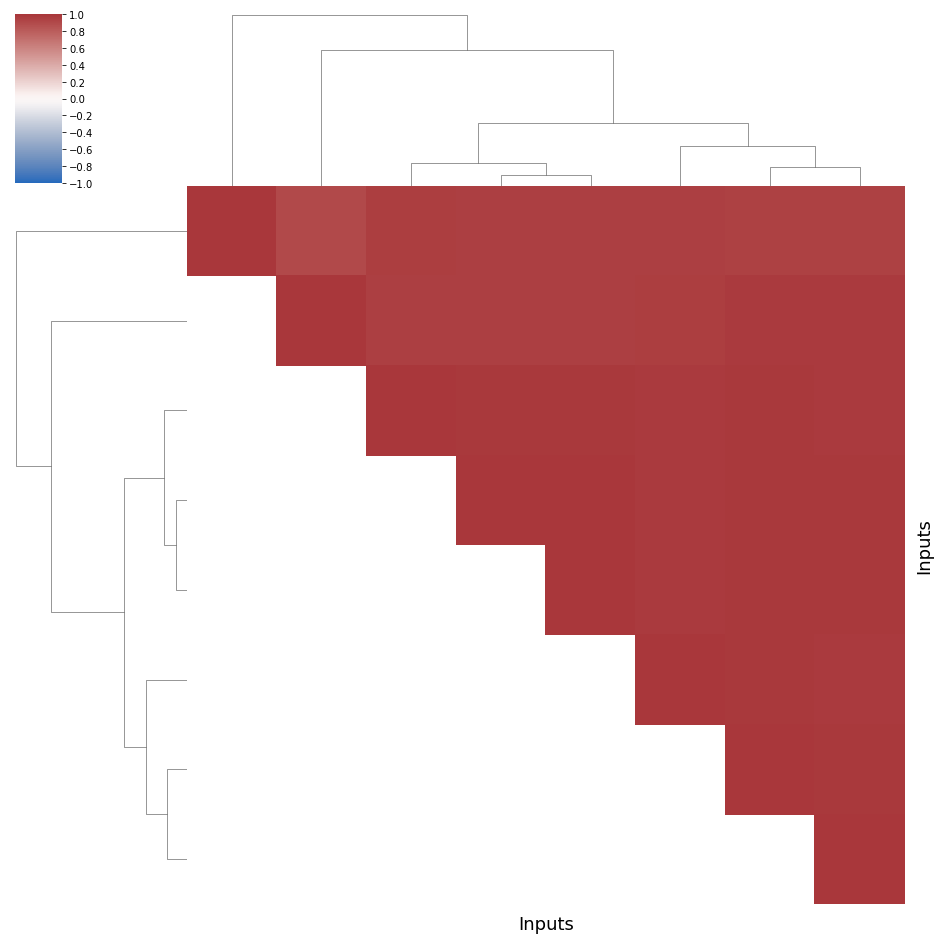

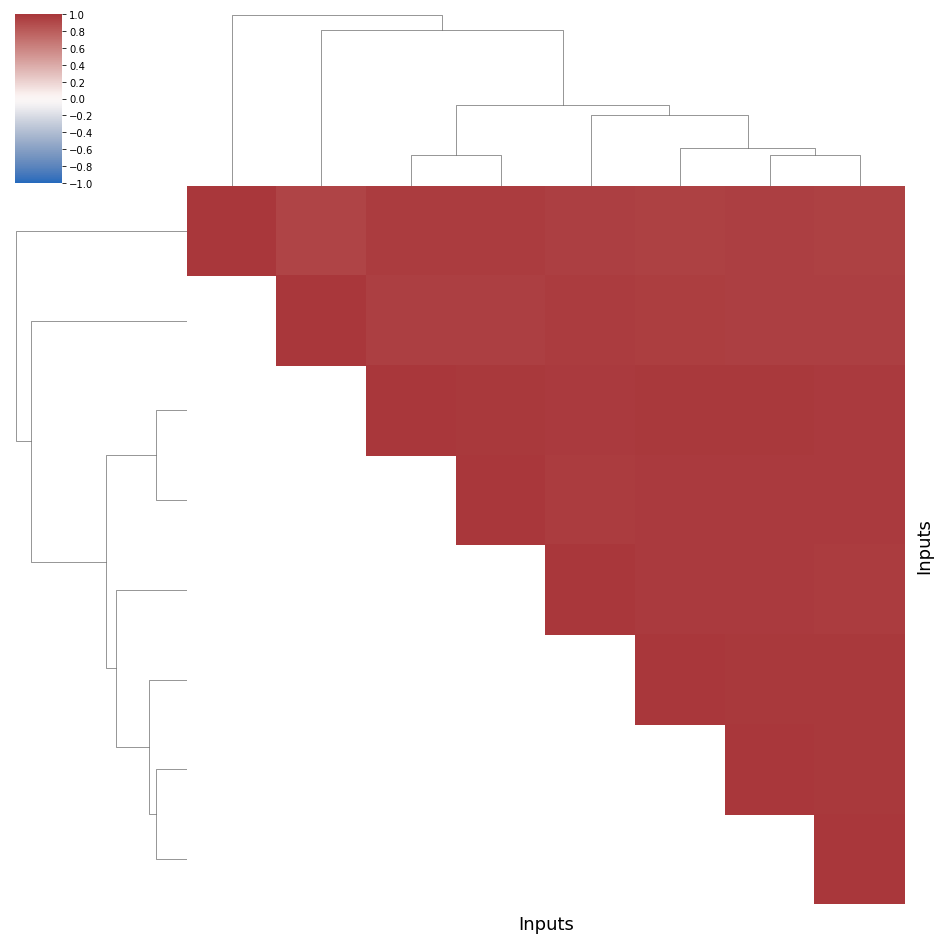

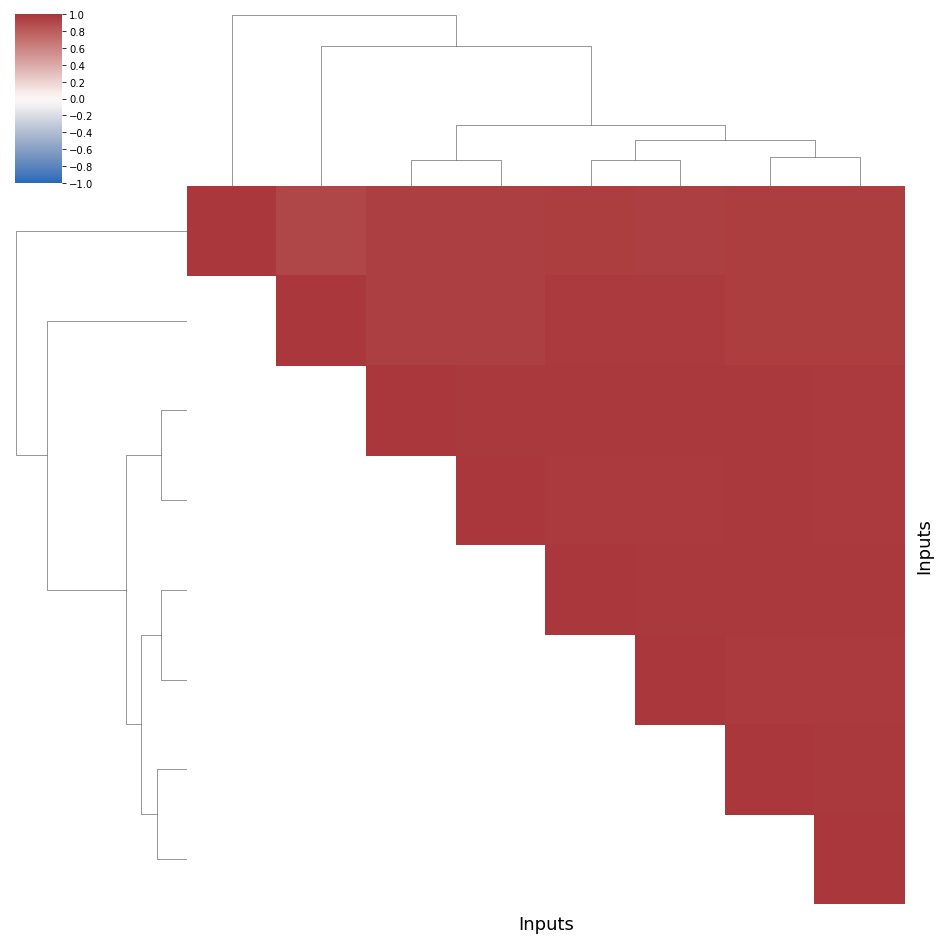

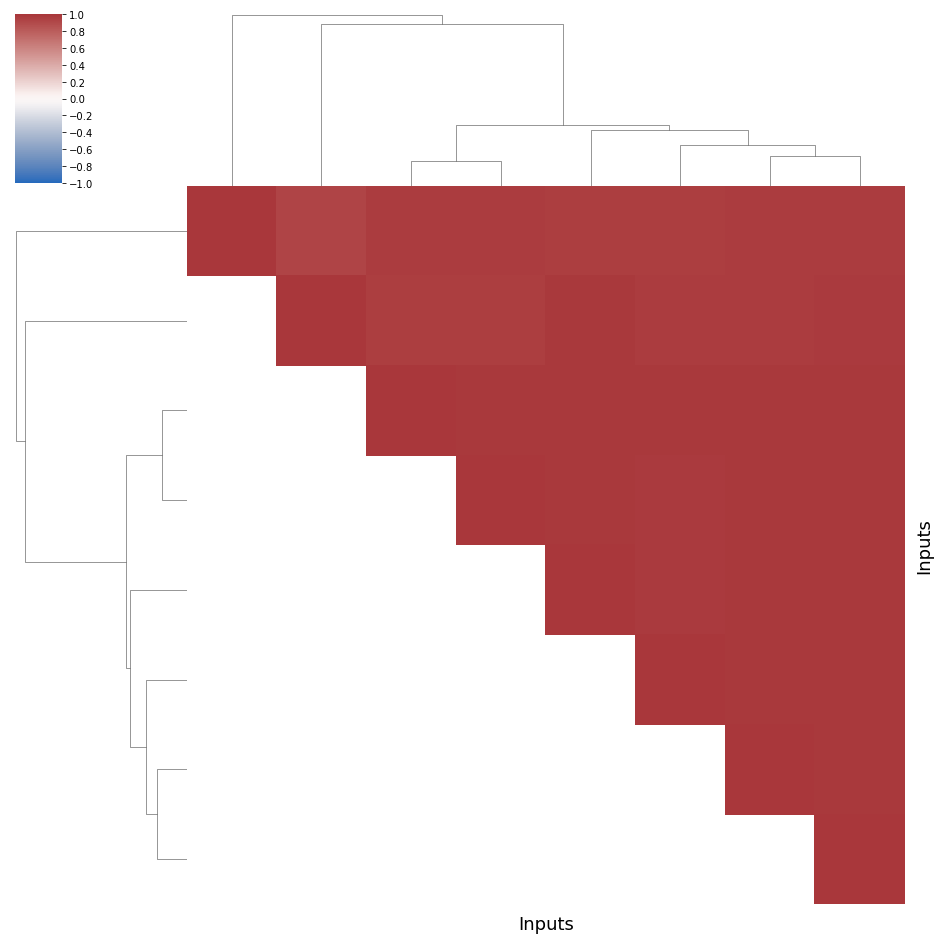

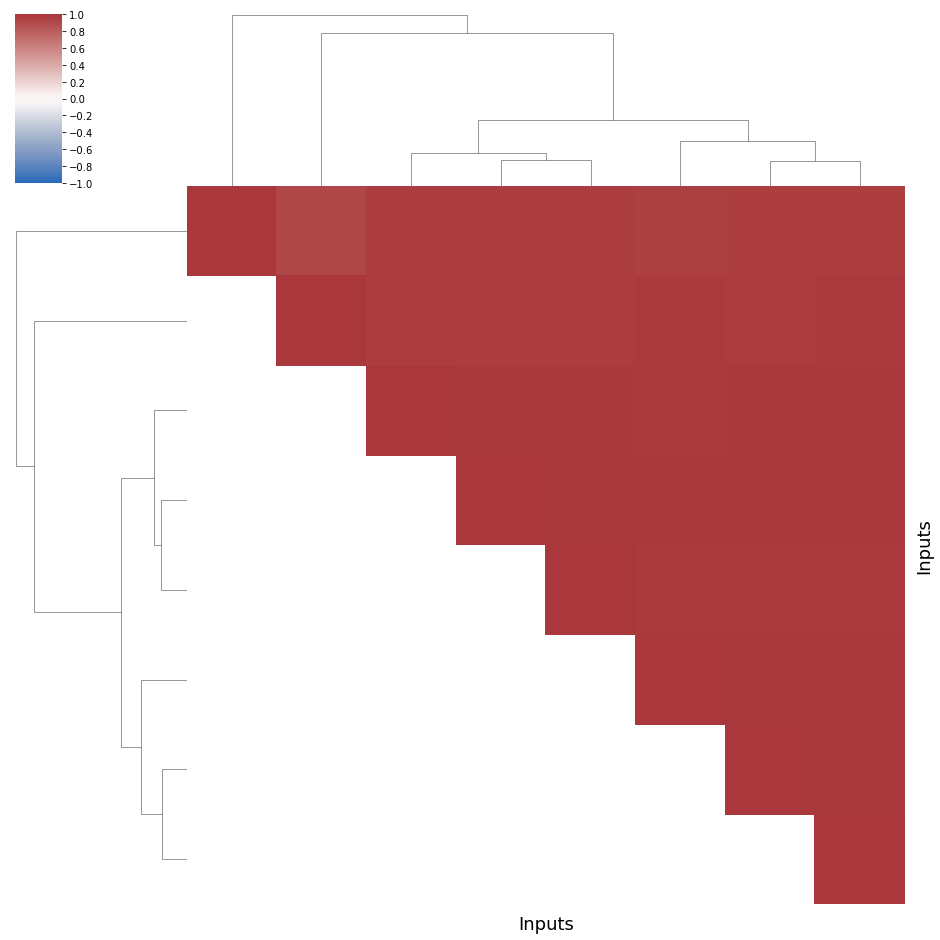

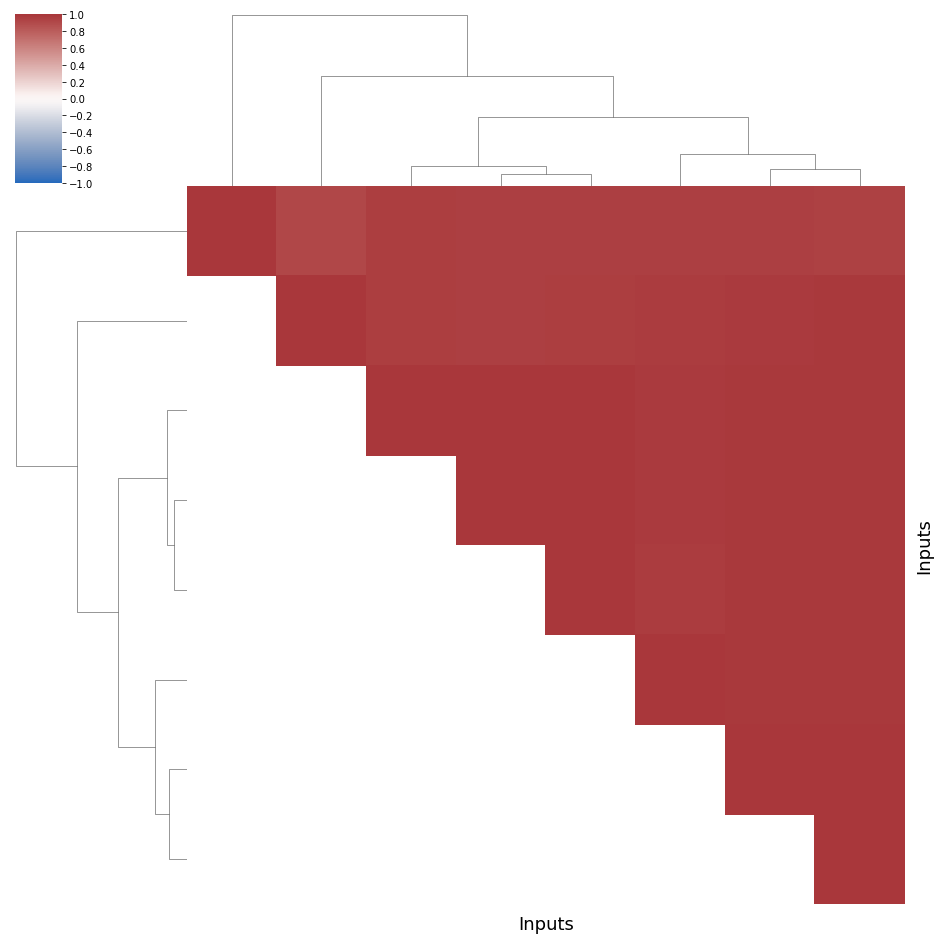

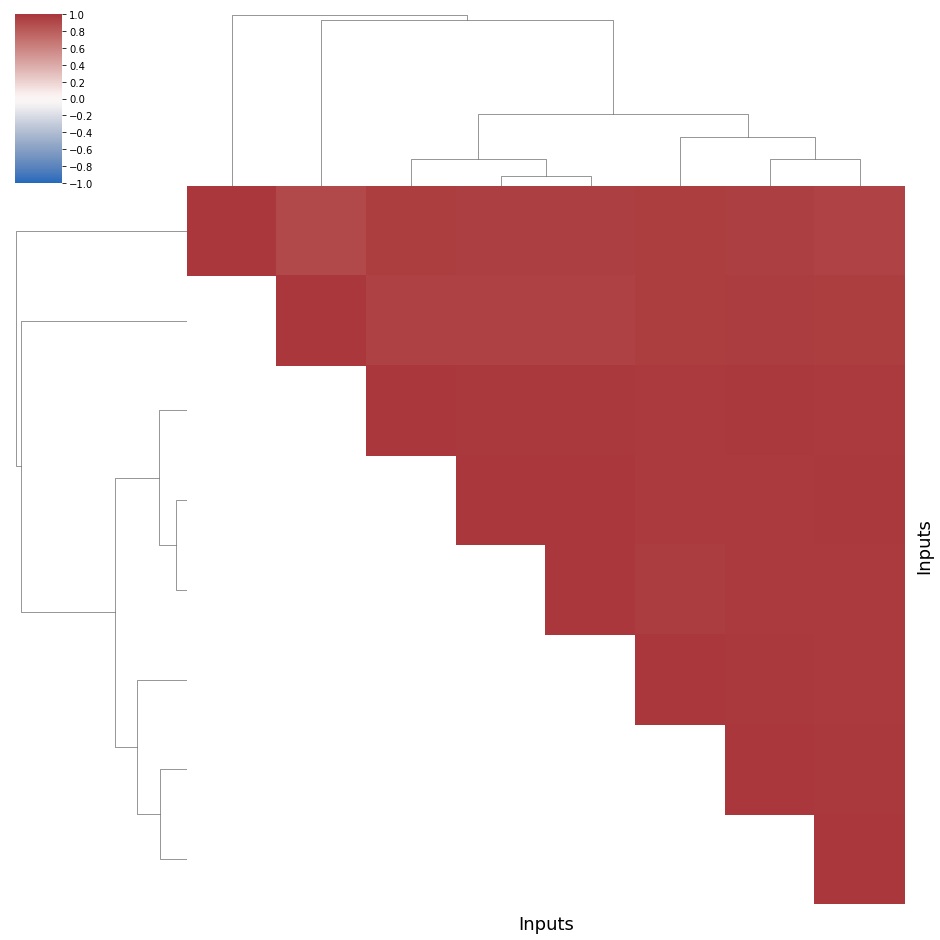

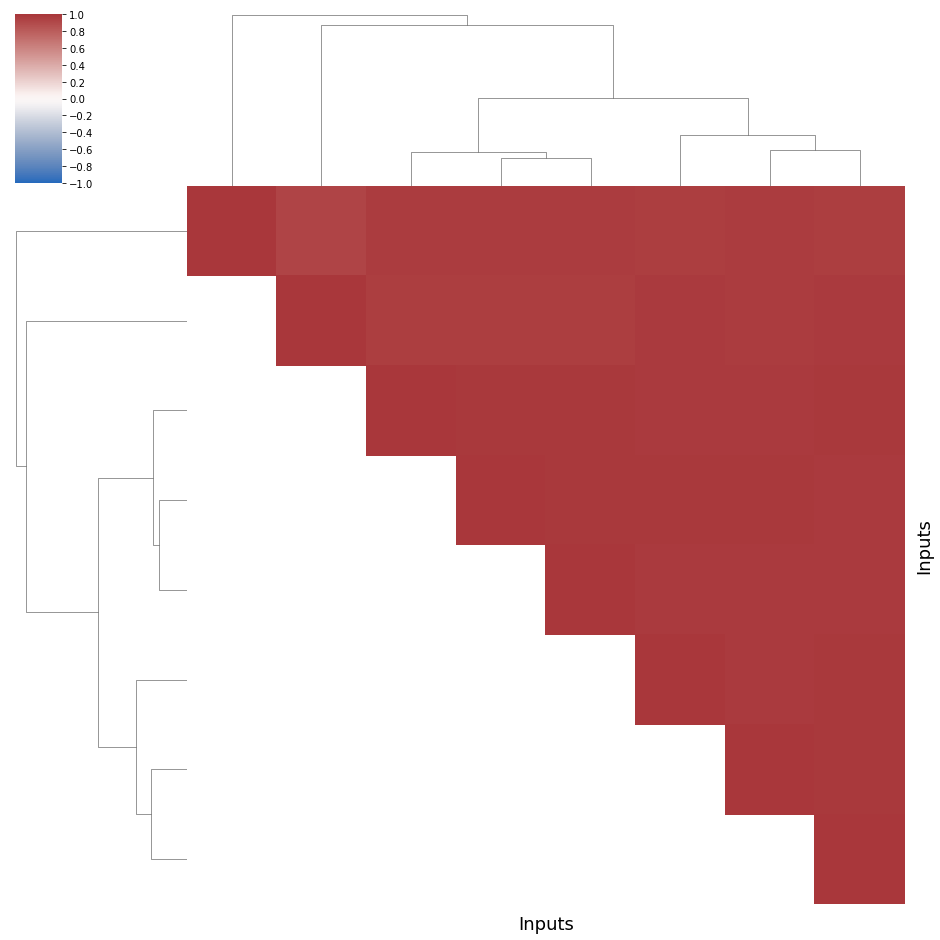

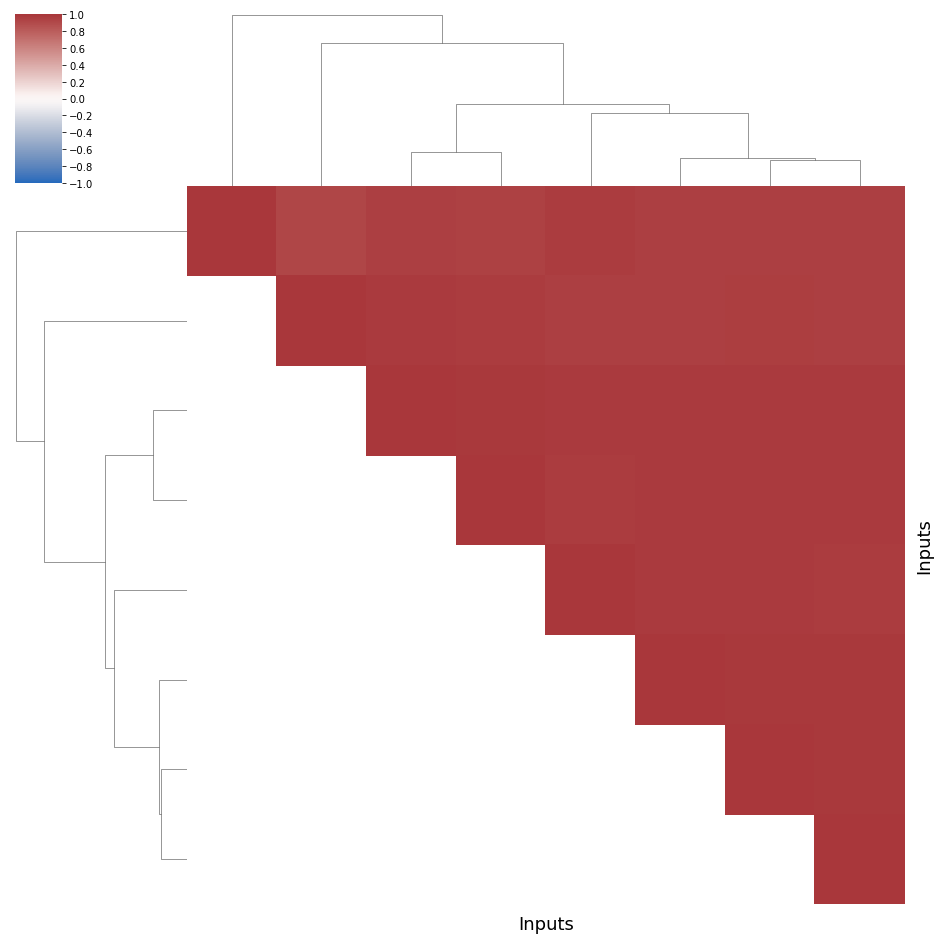

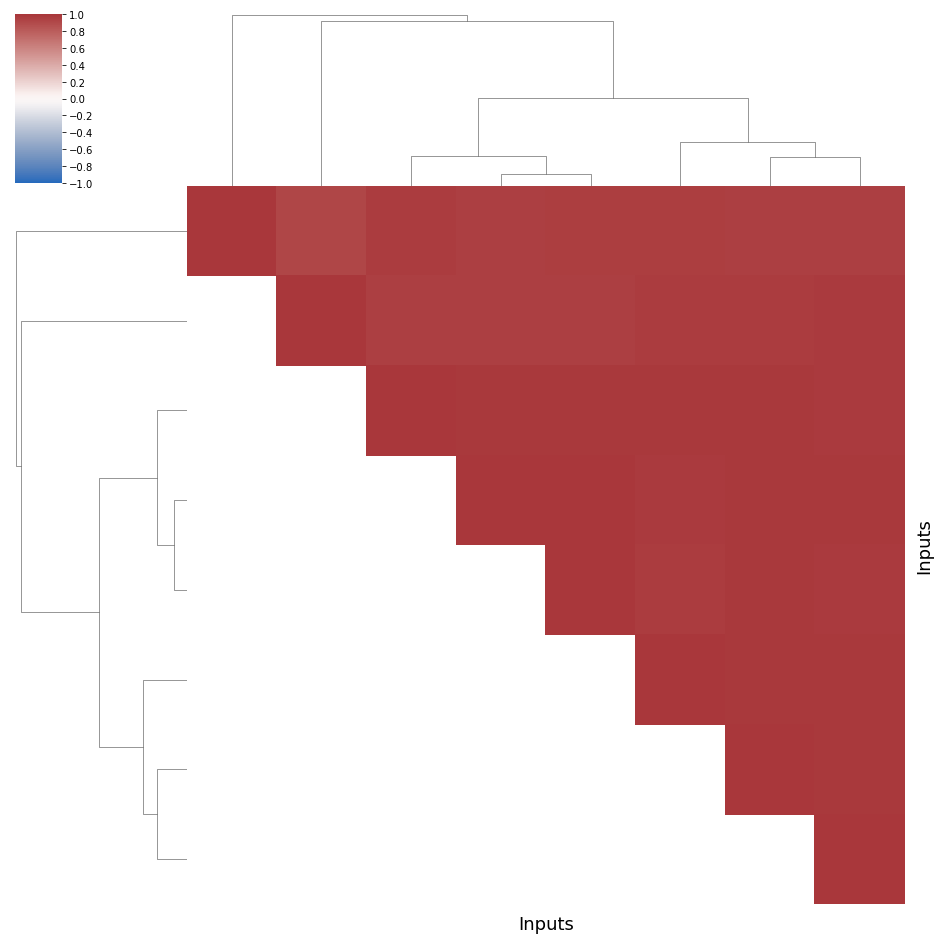

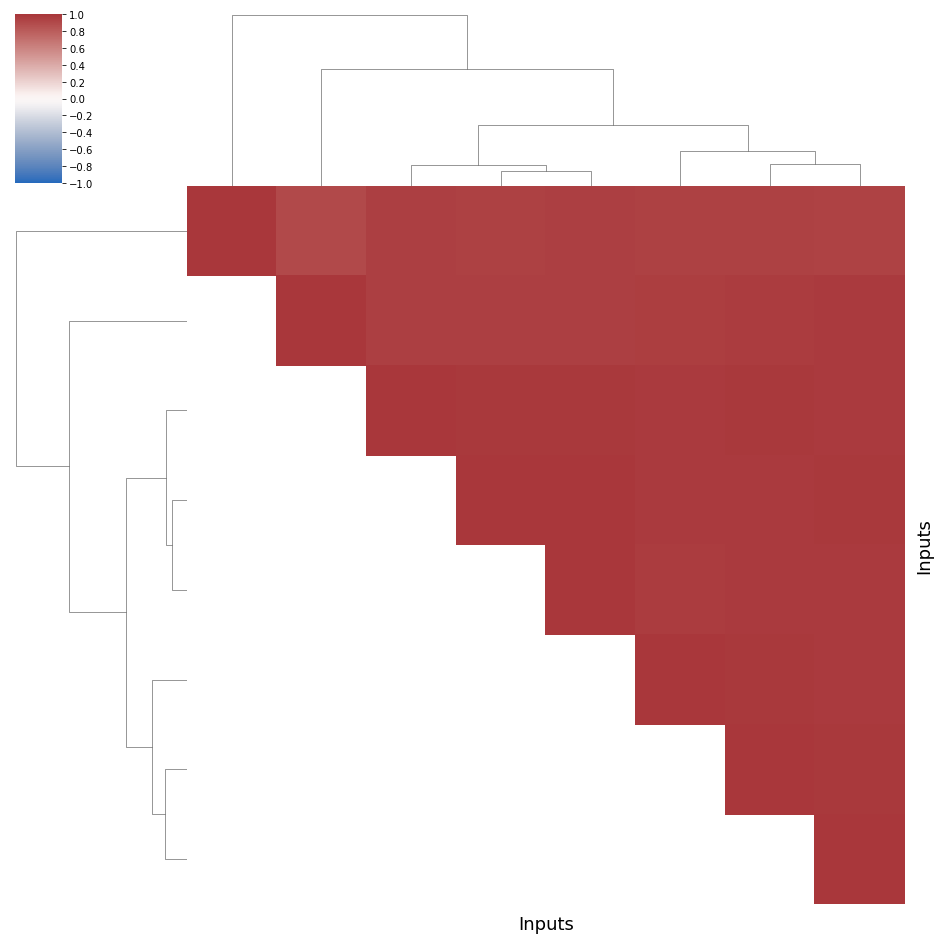

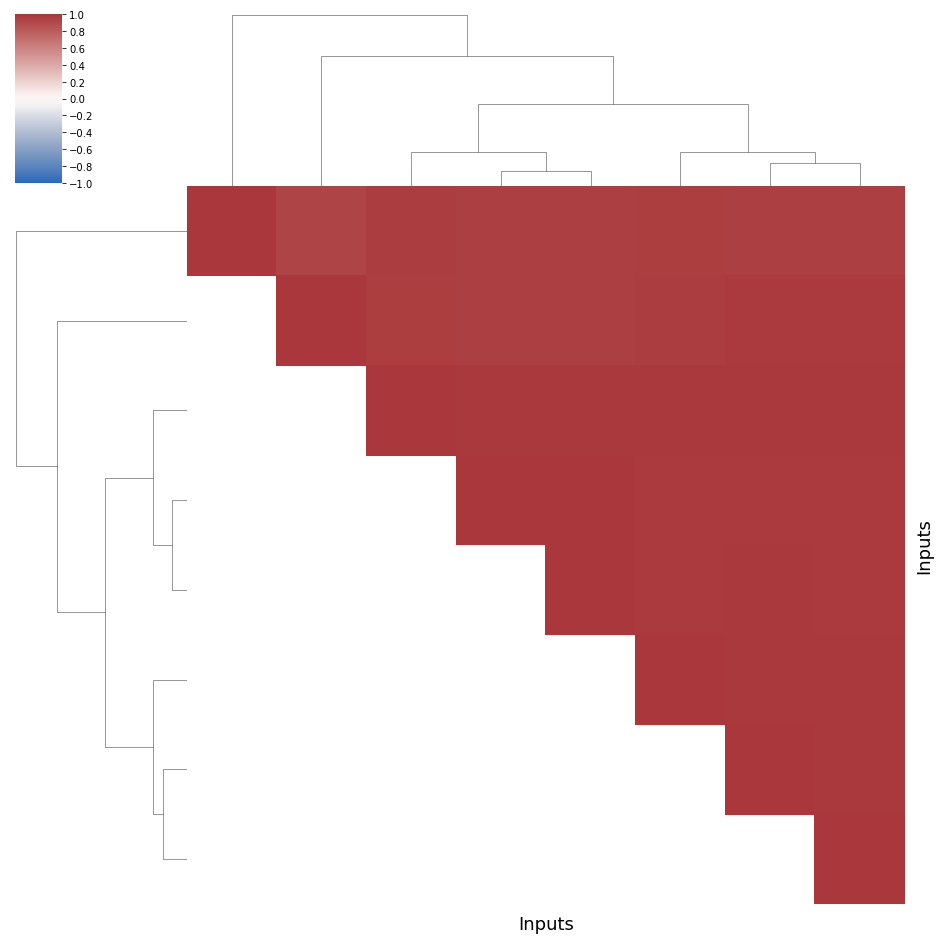

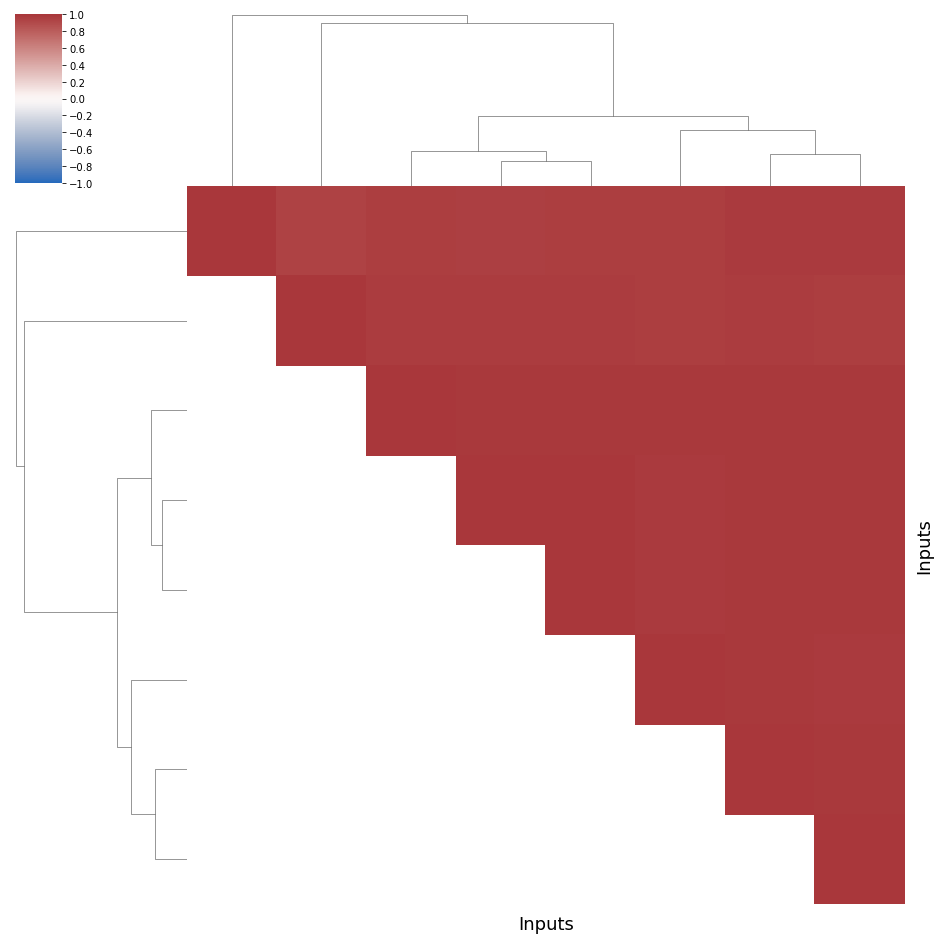

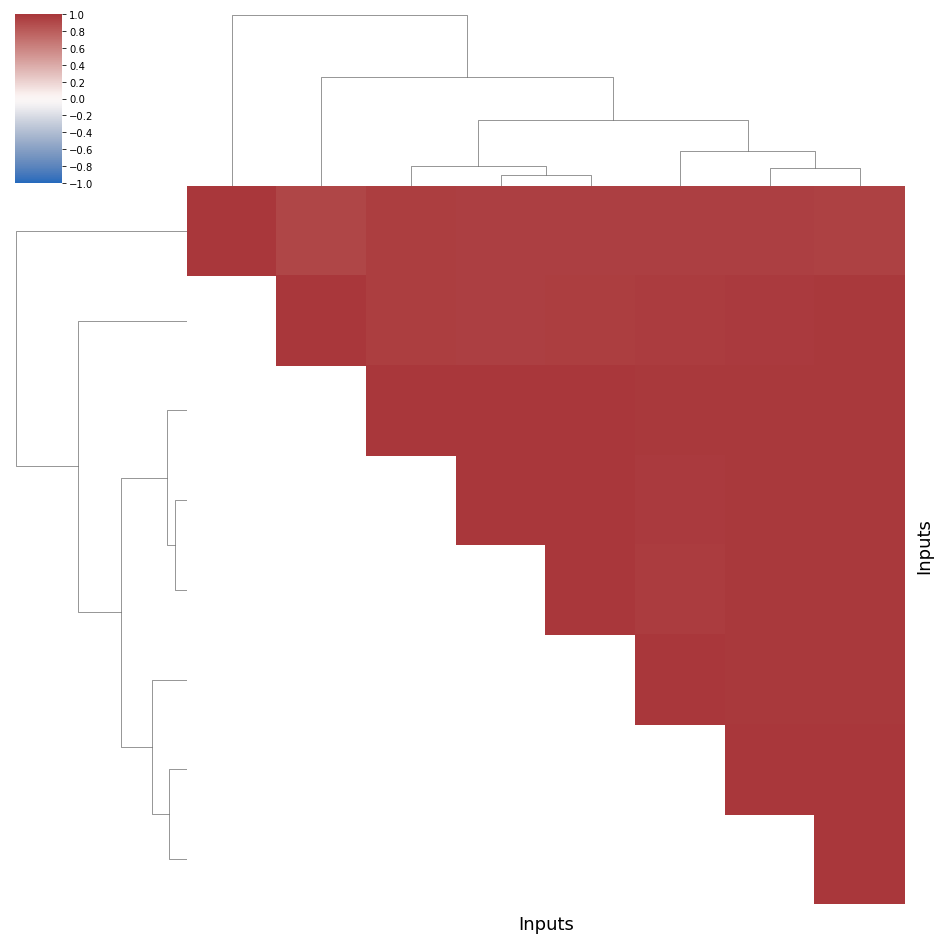

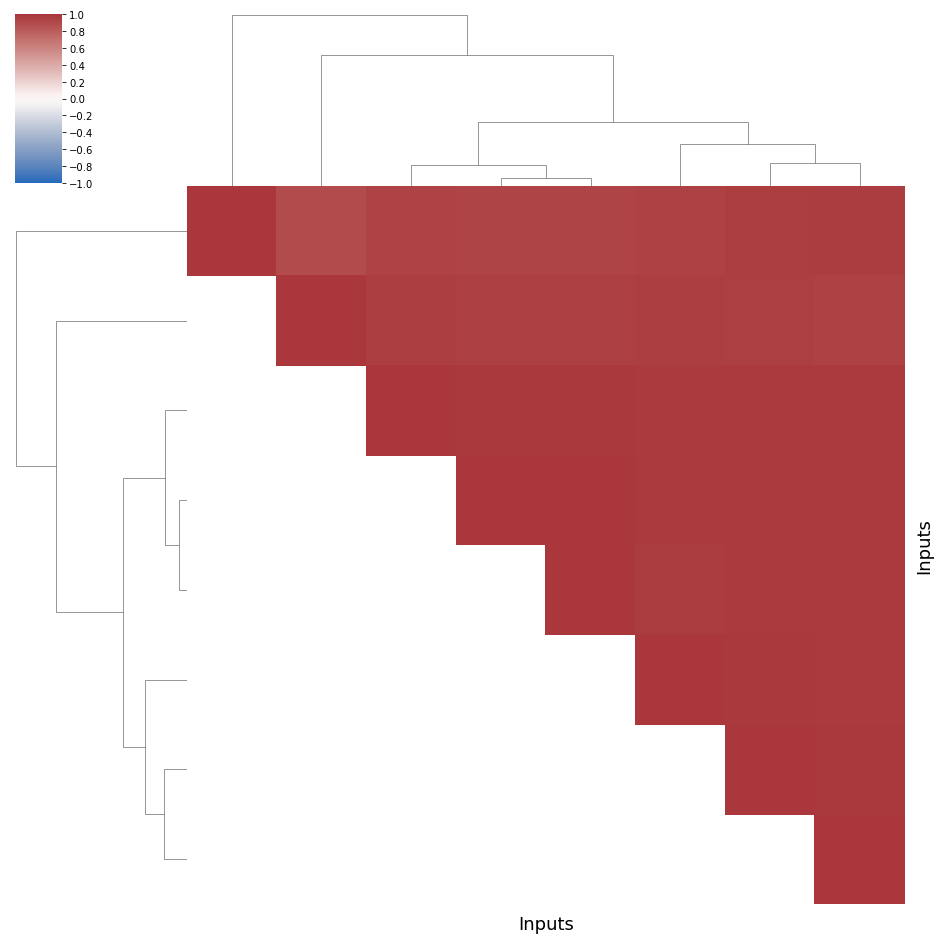

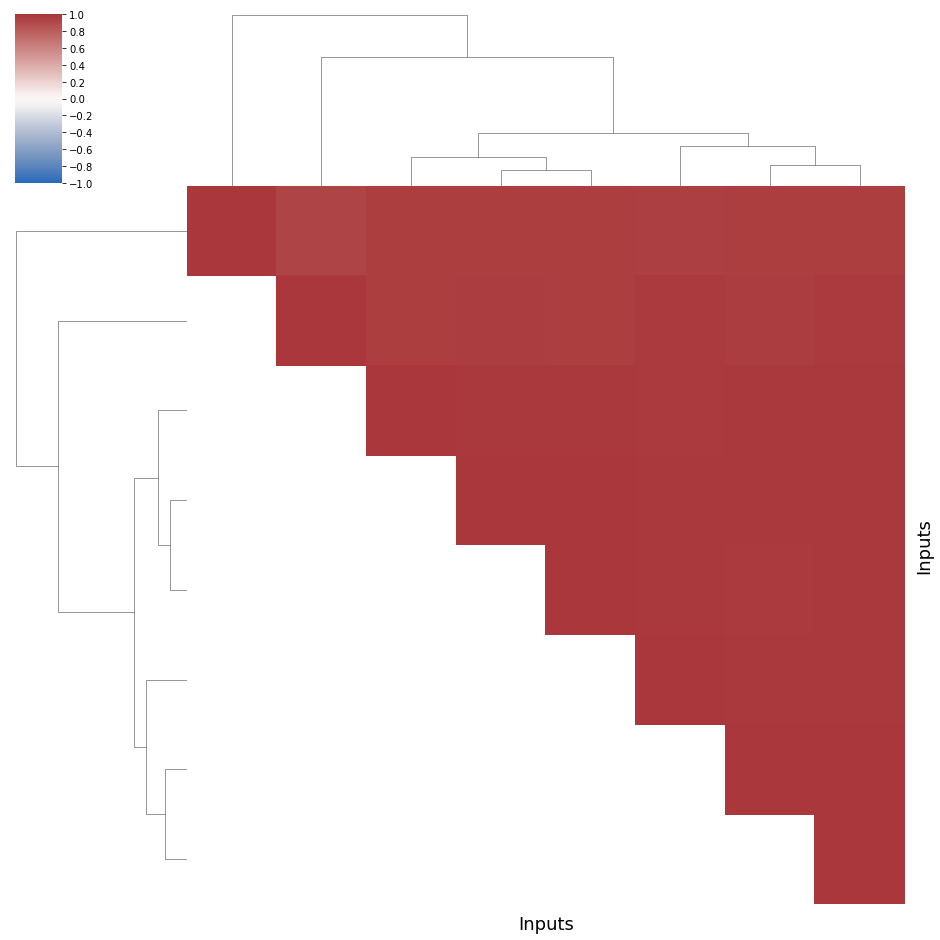

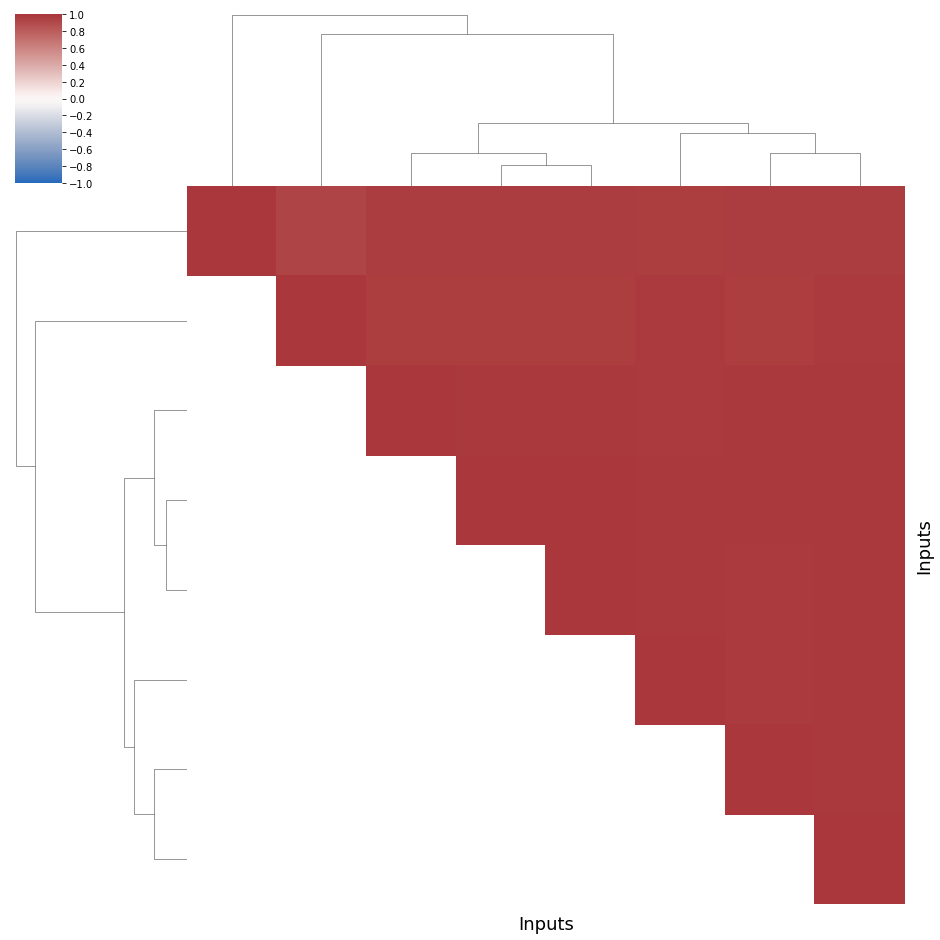

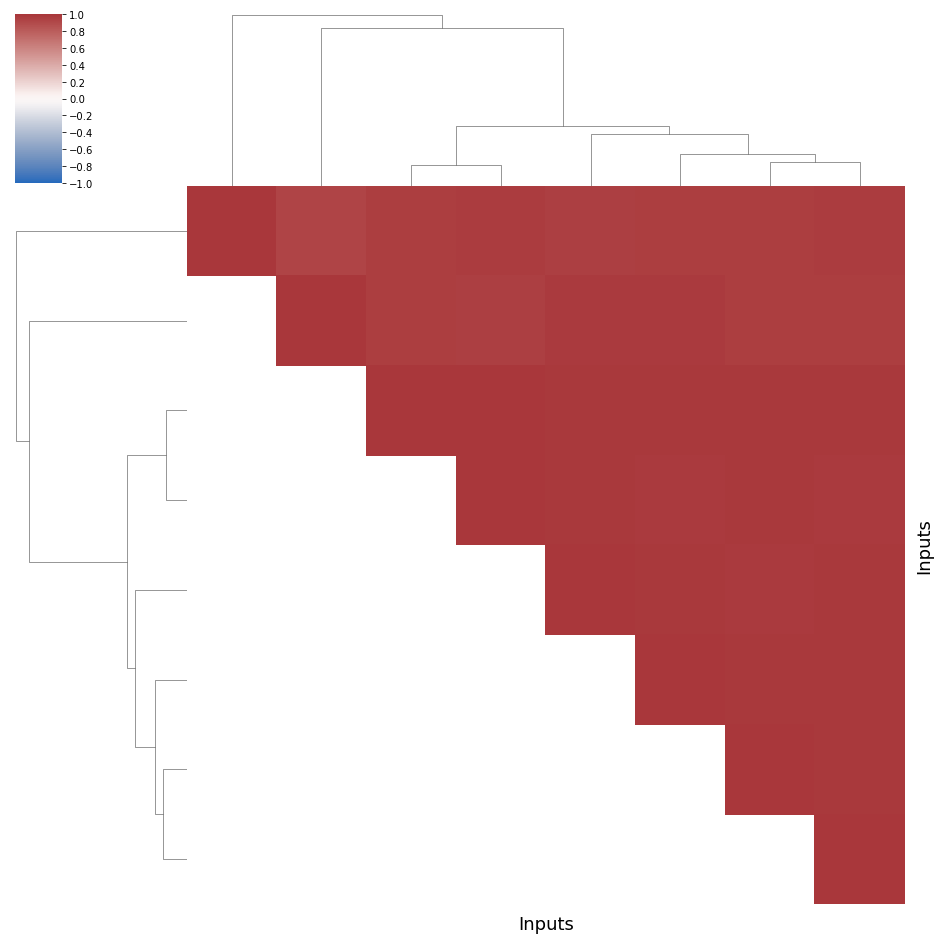

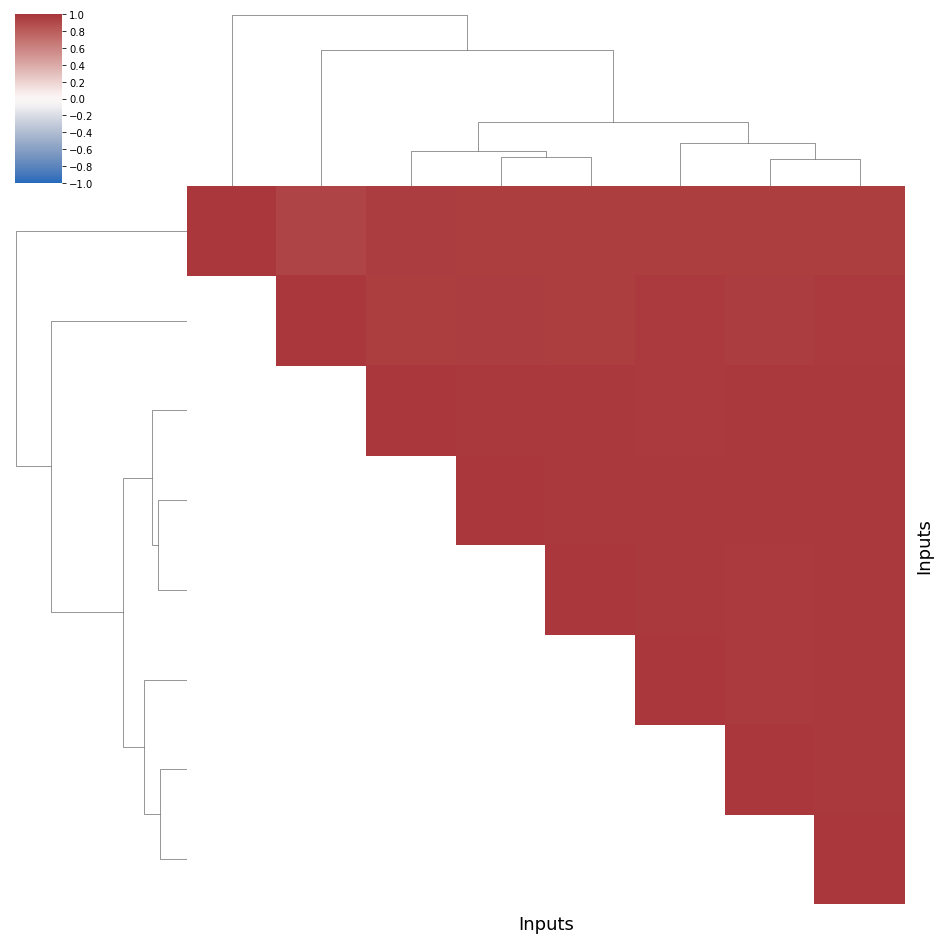

In [34]:
for index_hardware in range(hard_count):
    plot_correlationmatrix_dendogram(index_hardware, "fps")

## Correlations between hardware

In [37]:
def plot_correlationmatrix_dendogram_hard(index_input, dim):
    # index_hardware : the index of the hardware
    # dim : dimension
    # output : a plot of an ordered correlogram of the different compile-time options

    corr = [[0 for x in range(hard_count)] for y in range(hard_count)]

    for i in range(hard_count):
        for j in range(hard_count):
            # A distribution of bitrates will have a correlaiton of 1 with itself
            if (i == j):
                corr[i][j] = 1
            else:
                # we compute the Spearman correlation between the input video i and the input video j
                corr[i][j] = sc.spearmanr(data[i, index_input][dim],
                                          data[j, index_input][dim]).correlation

    # we transform our matrix into a dataframe
    df = pd.DataFrame(corr)
    # we replace nan correlations (with a distribution whose values are all equal to 0)
    df = df.fillna(0)

    # group the videos, we choose the ward method 
    # single link method (minimum of distance) leads to numerous tiny clusters
    # centroid or average tend to split homogeneous clusters
    # and complete link aggregates unbalanced groups. 
    links = linkage(df, method="ward",)
    order = leaves_list(links)
    
    # Generate a mask for the upper triangle
    # we order the correlation following the aggregation clustering
    mask = np.zeros_like(corr, dtype=np.bool)

    for i in range(hard_count):
        for j in range(hard_count):    
            if i>j:
                mask[order[i]][order[j]] = True
    
    # compute the actual clustermap
    g = sns.clustermap(df, cmap="vlag", mask=mask, method="ward",
                   linewidths=0, figsize=(13, 13), 
                   cbar_kws={"ticks":[k/5 for k in np.arange(-10,10,1)]}, 
                   vmin =-1)
    g.ax_heatmap.set_yticklabels([])
    g.ax_heatmap.set_xticklabels([])
    g.ax_heatmap.tick_params(right=False, bottom=False)
    # abcissa and ordered labels
    g.ax_heatmap.set_xlabel("Inputs", fontsize = 18)
    g.ax_heatmap.set_ylabel("Inputs", fontsize = 18)
    # we show the graph
    plt.show()

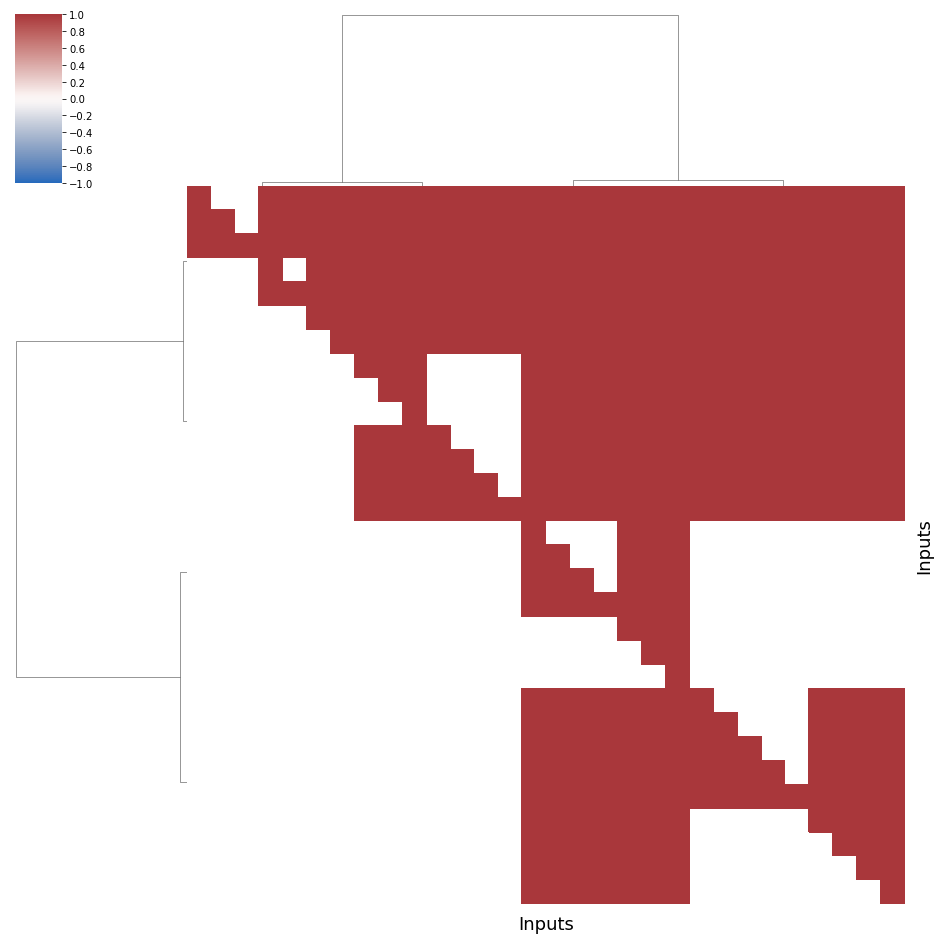

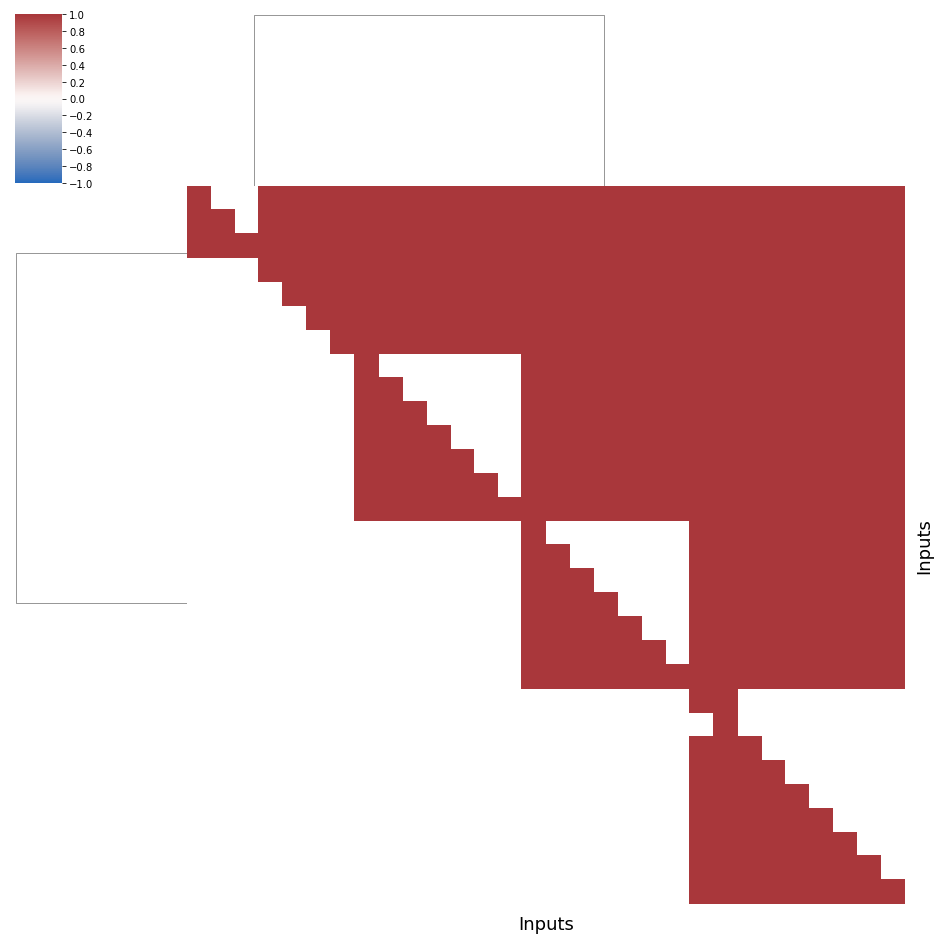

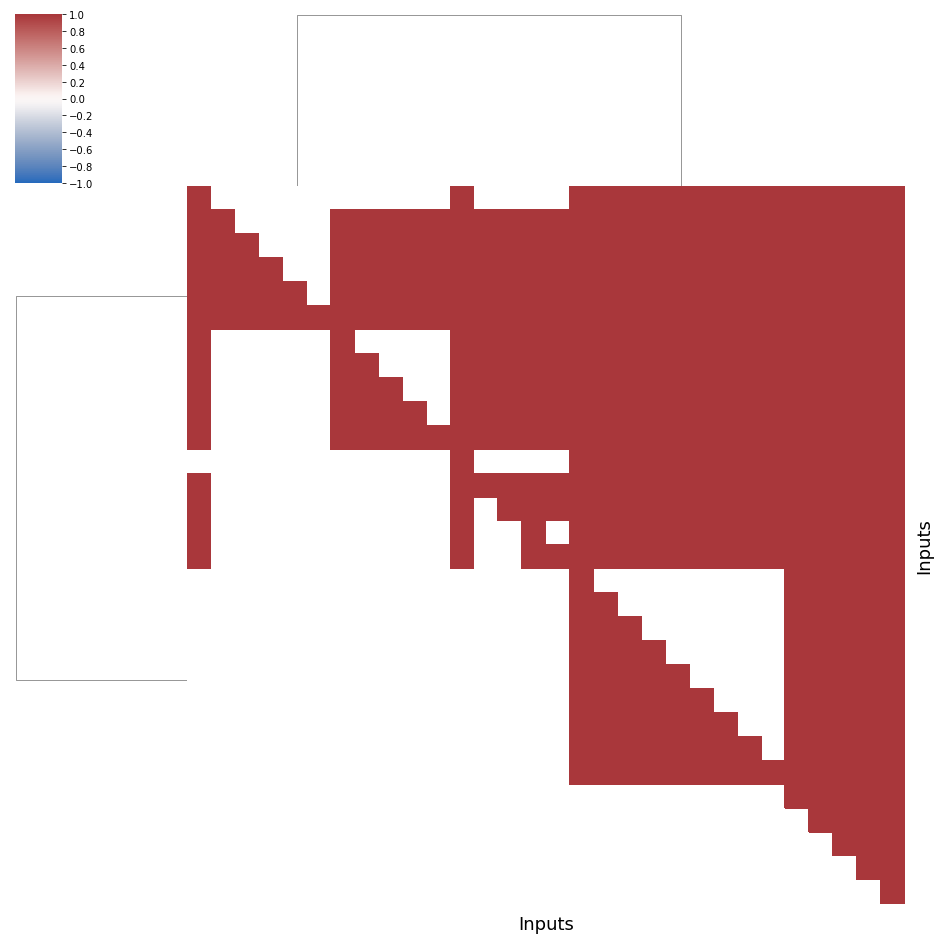

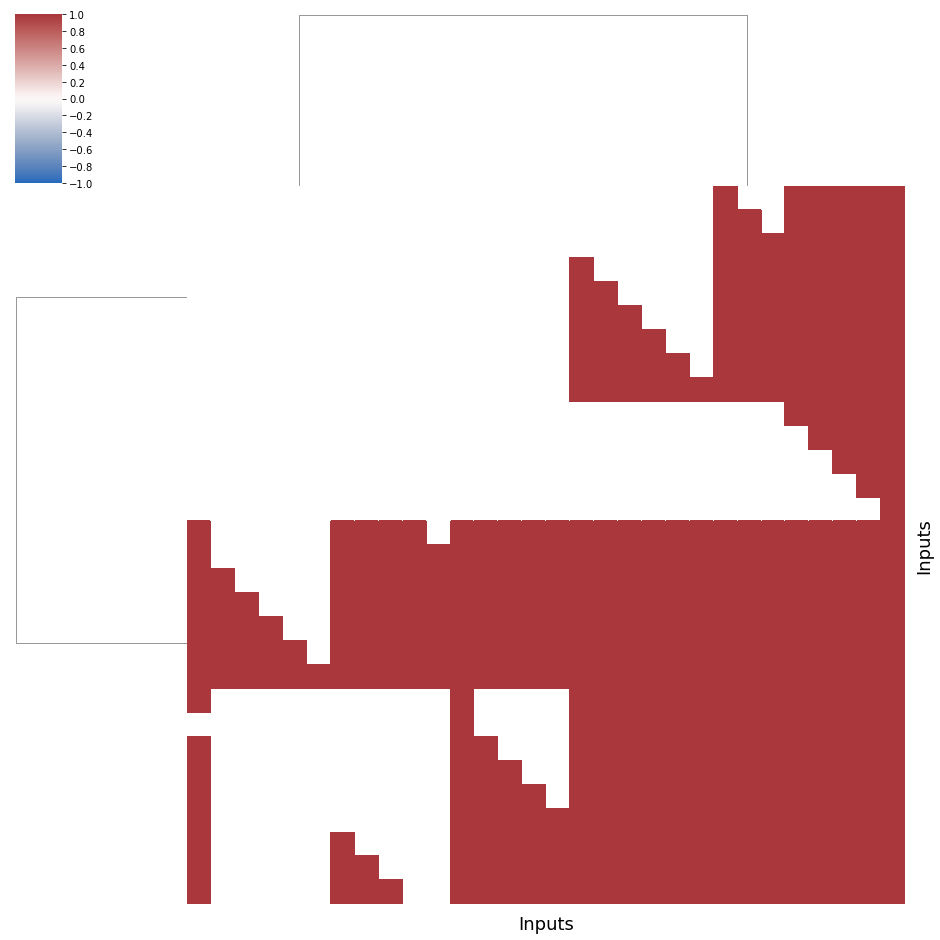

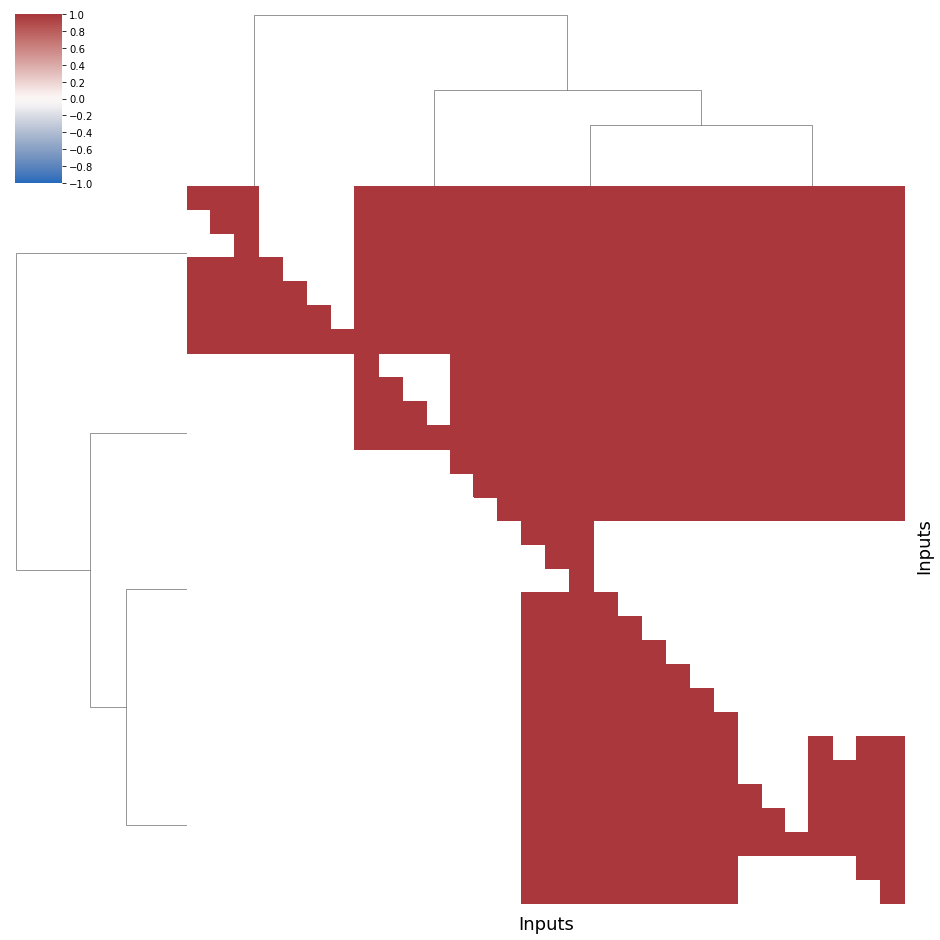

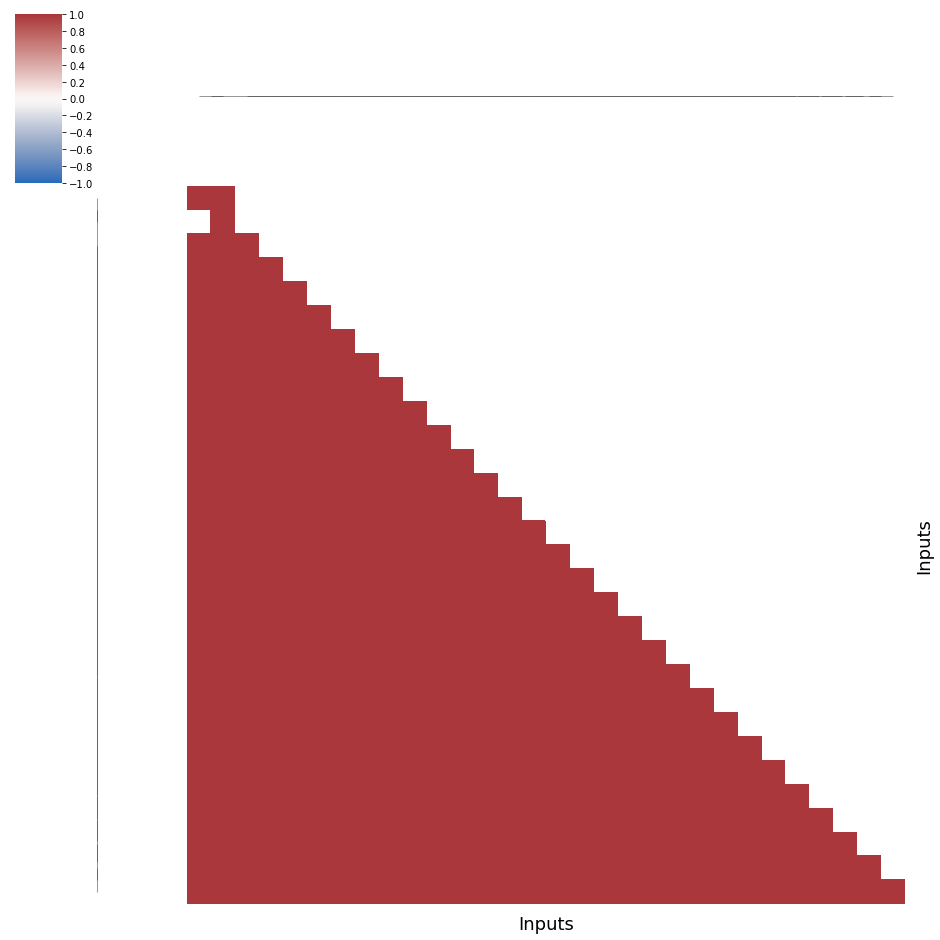

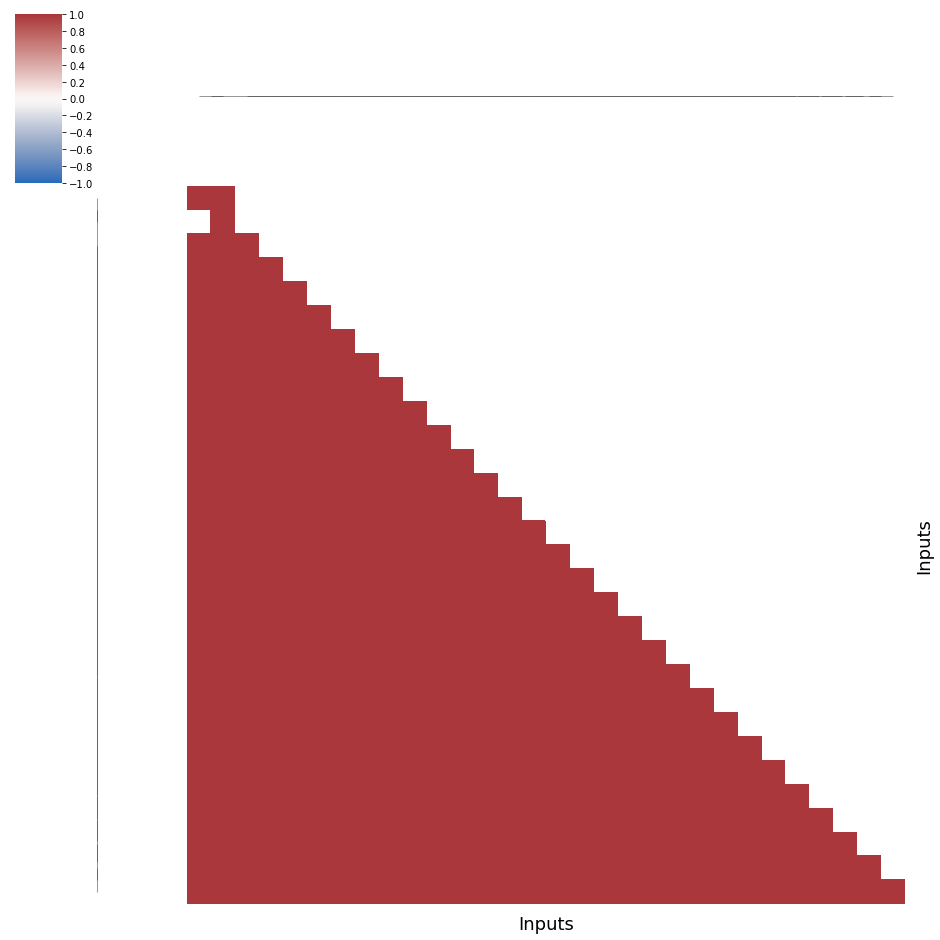

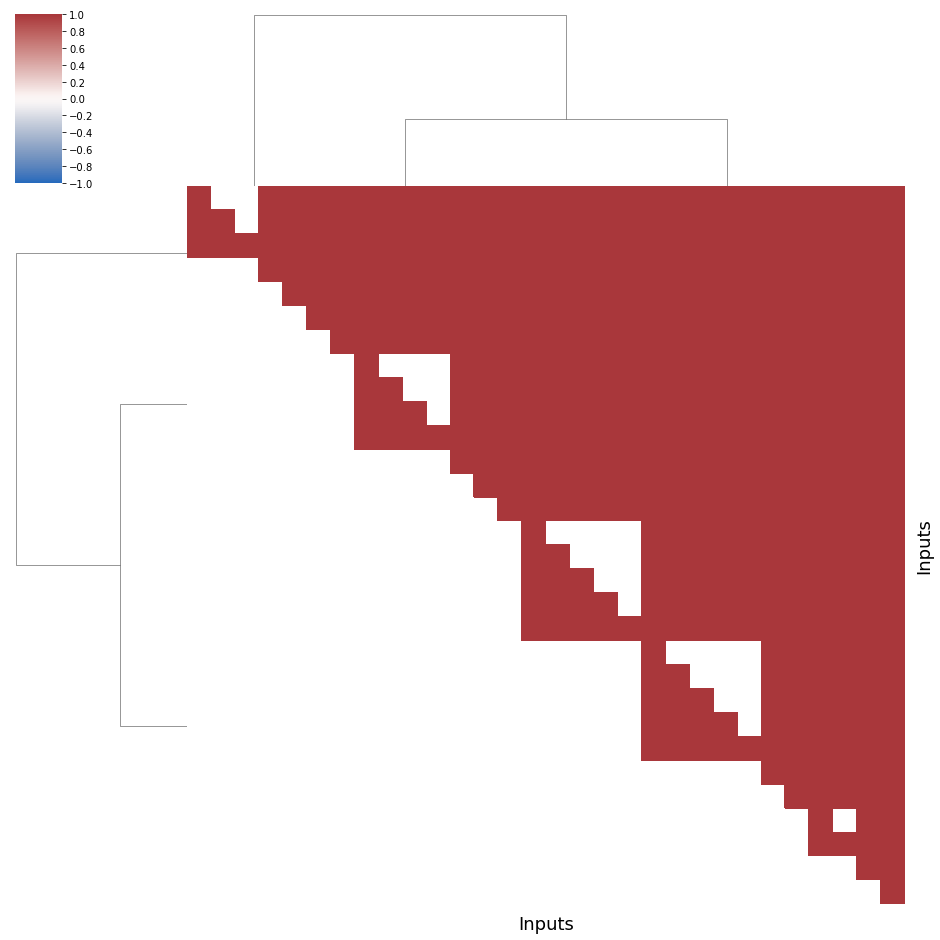

In [38]:
for index_input in range(inputs_count):
    plot_correlationmatrix_dendogram_hard(index_input, "kbs")

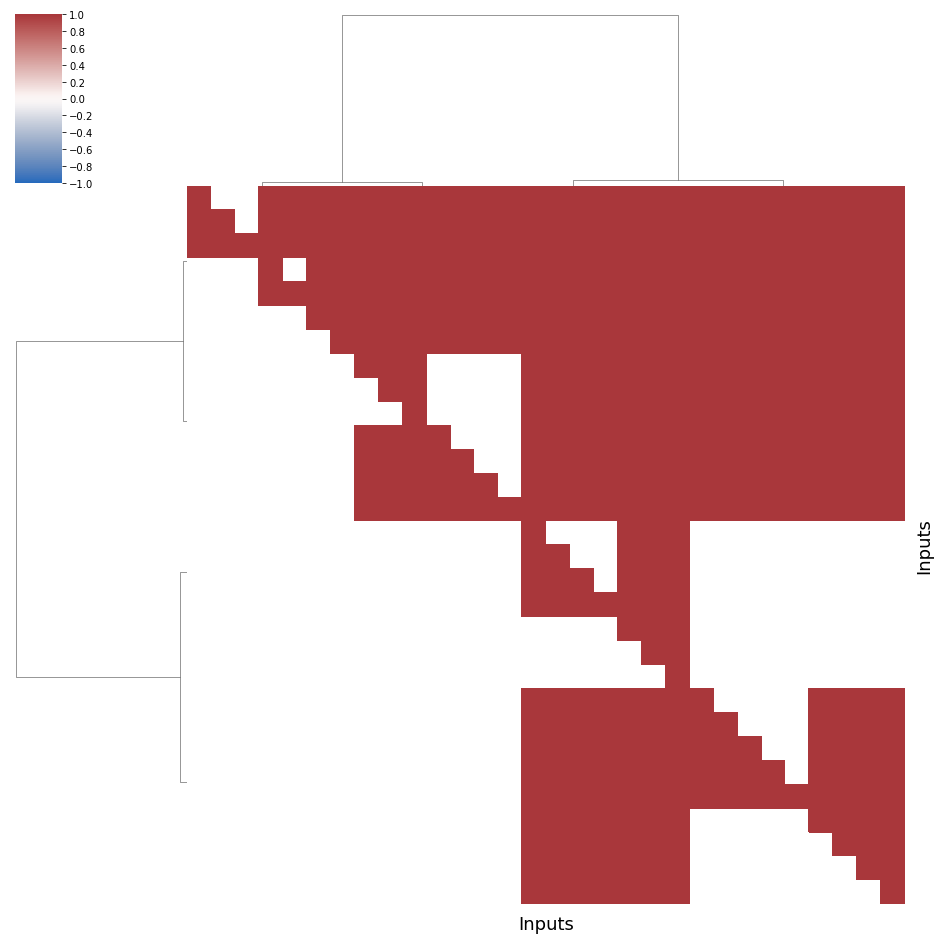

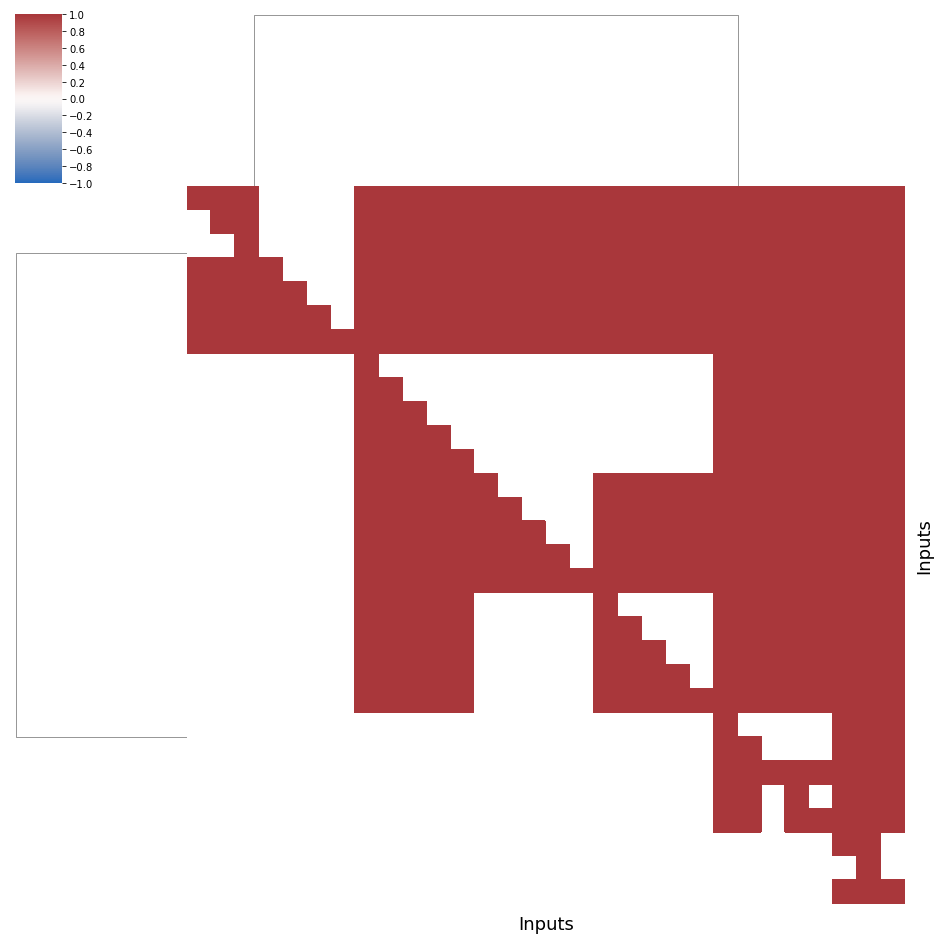

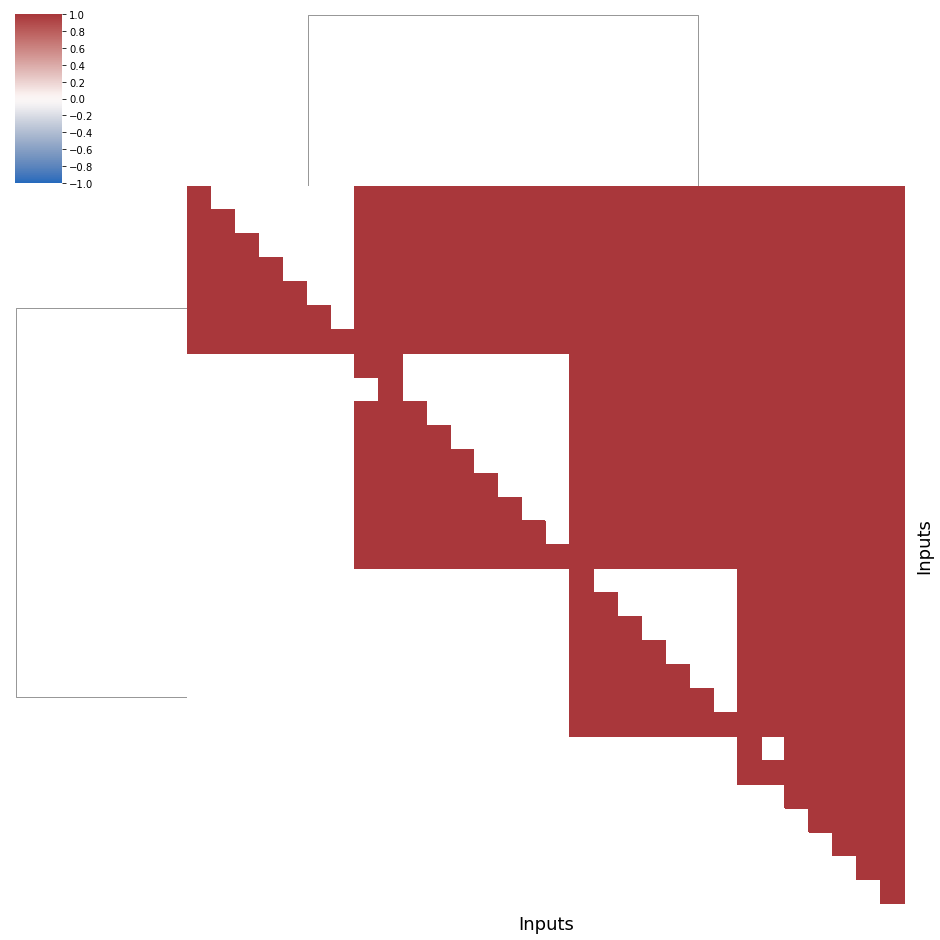

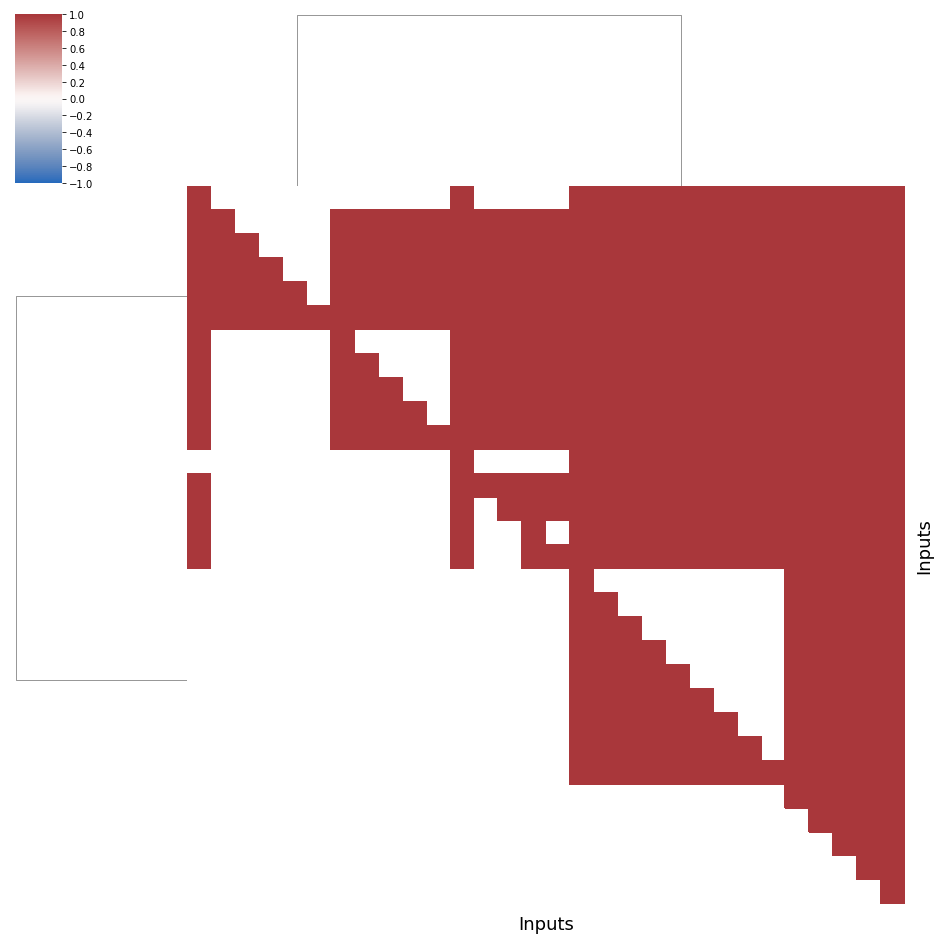

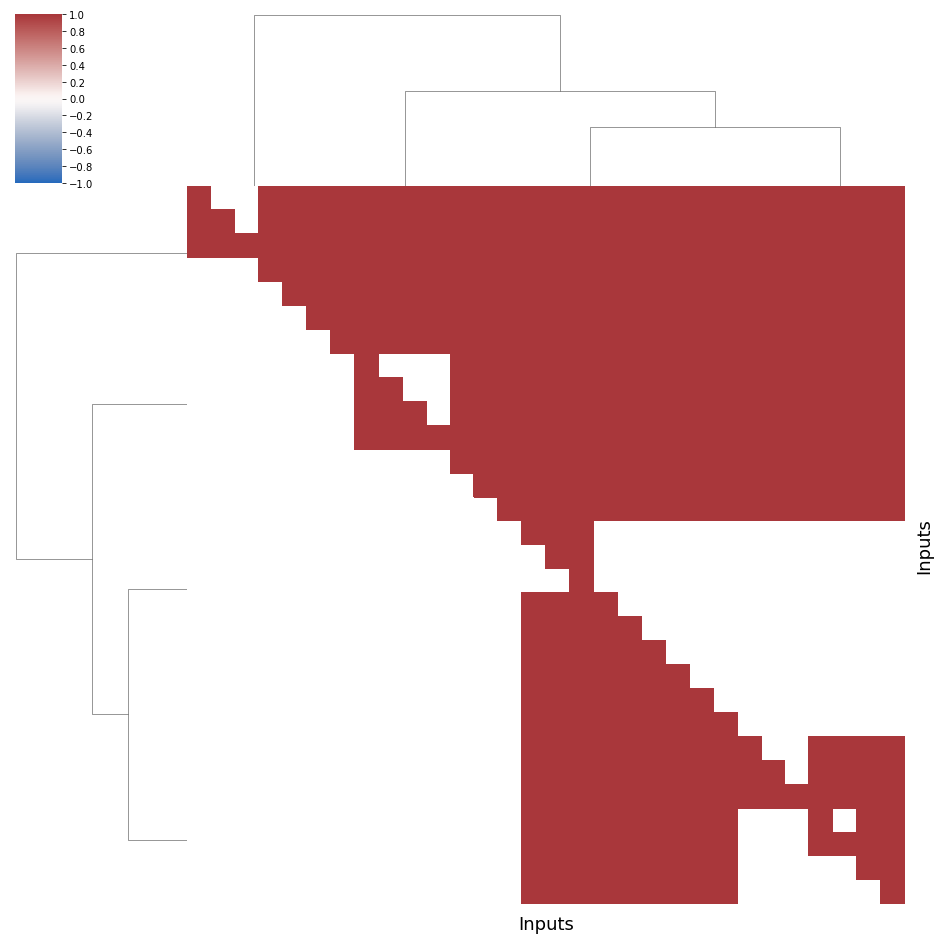

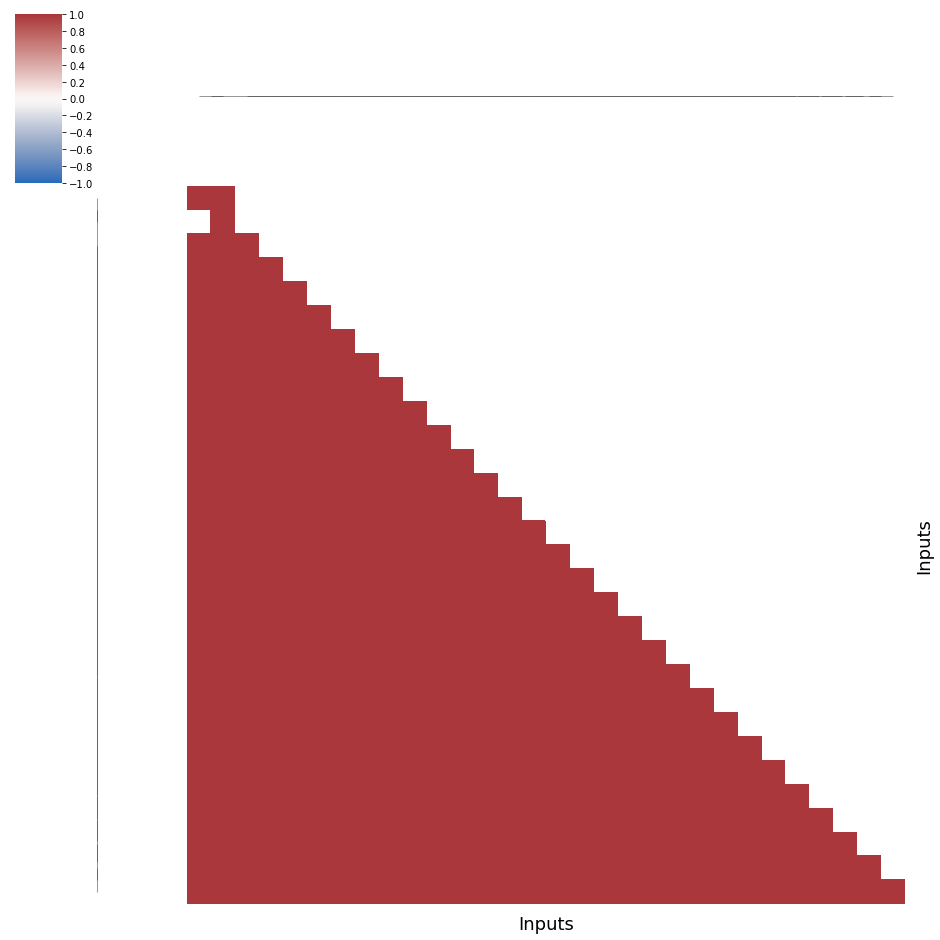

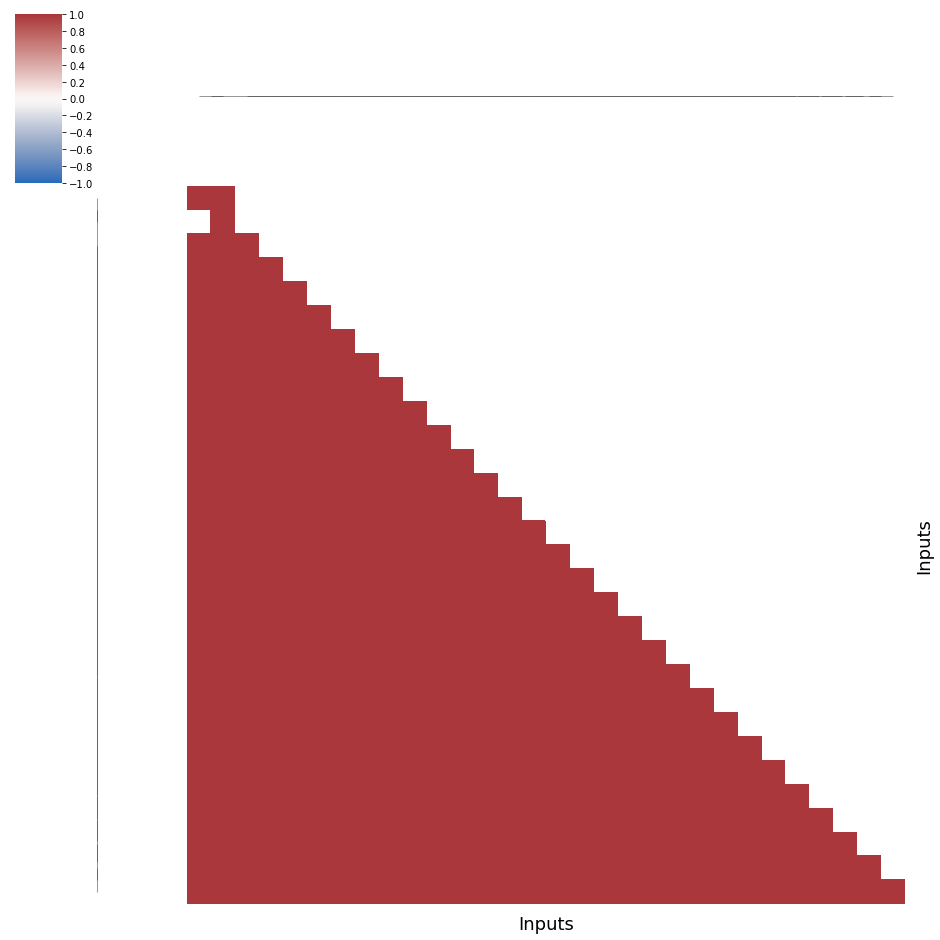

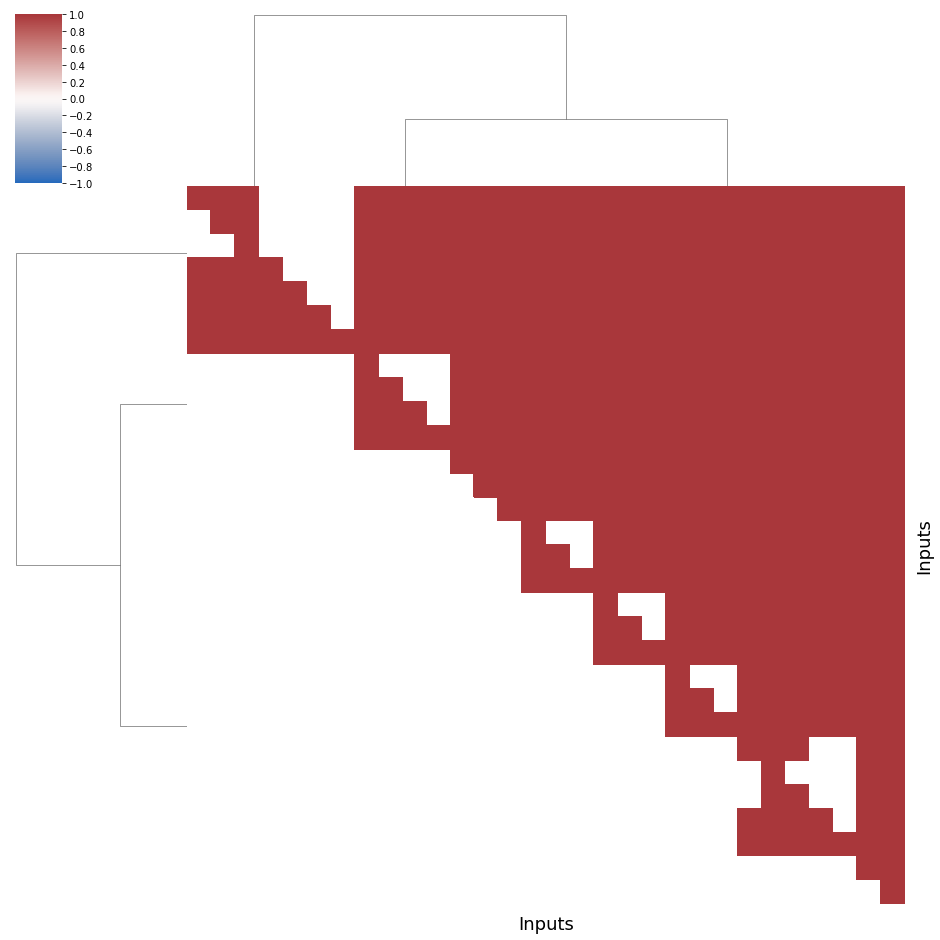

In [39]:
for index_input in range(inputs_count):
    plot_correlationmatrix_dendogram_hard(index_input, "size")

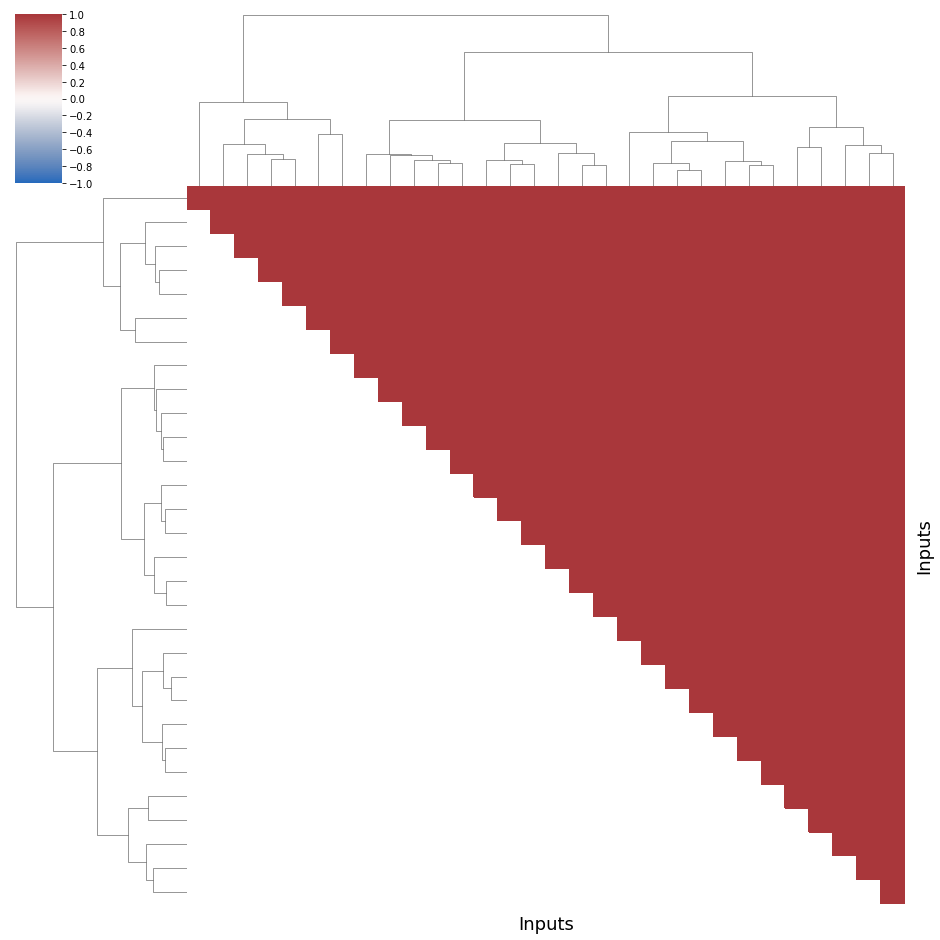

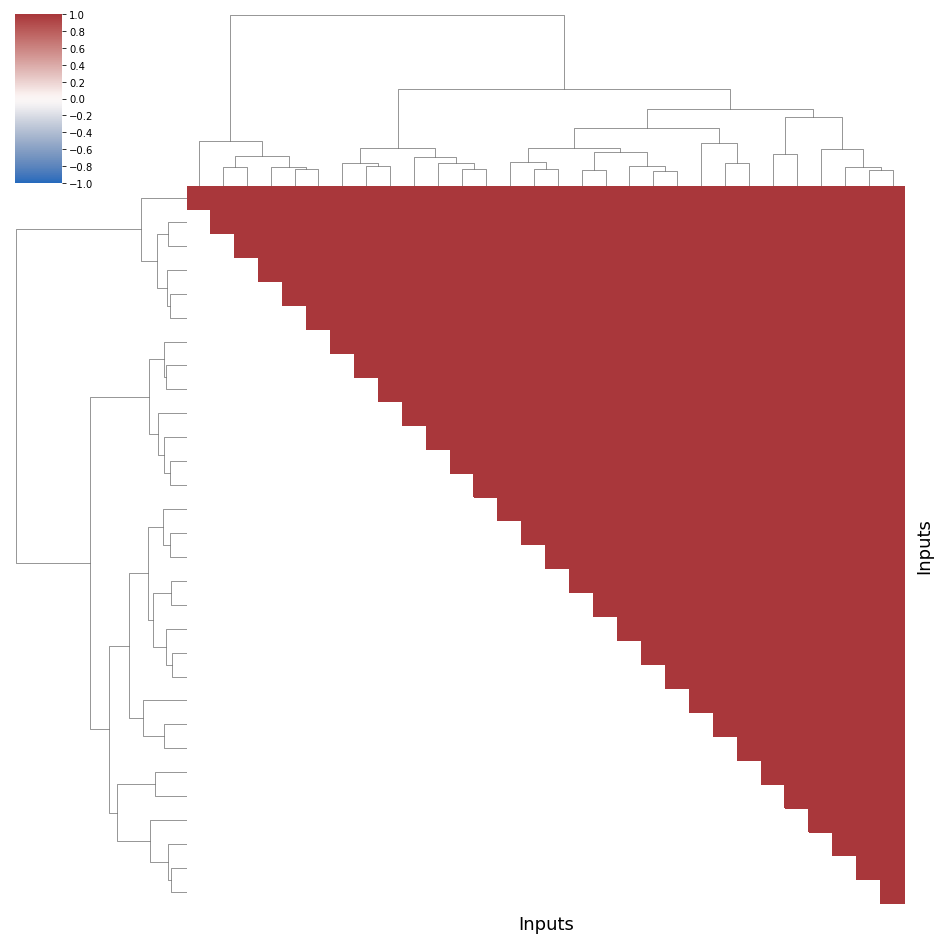

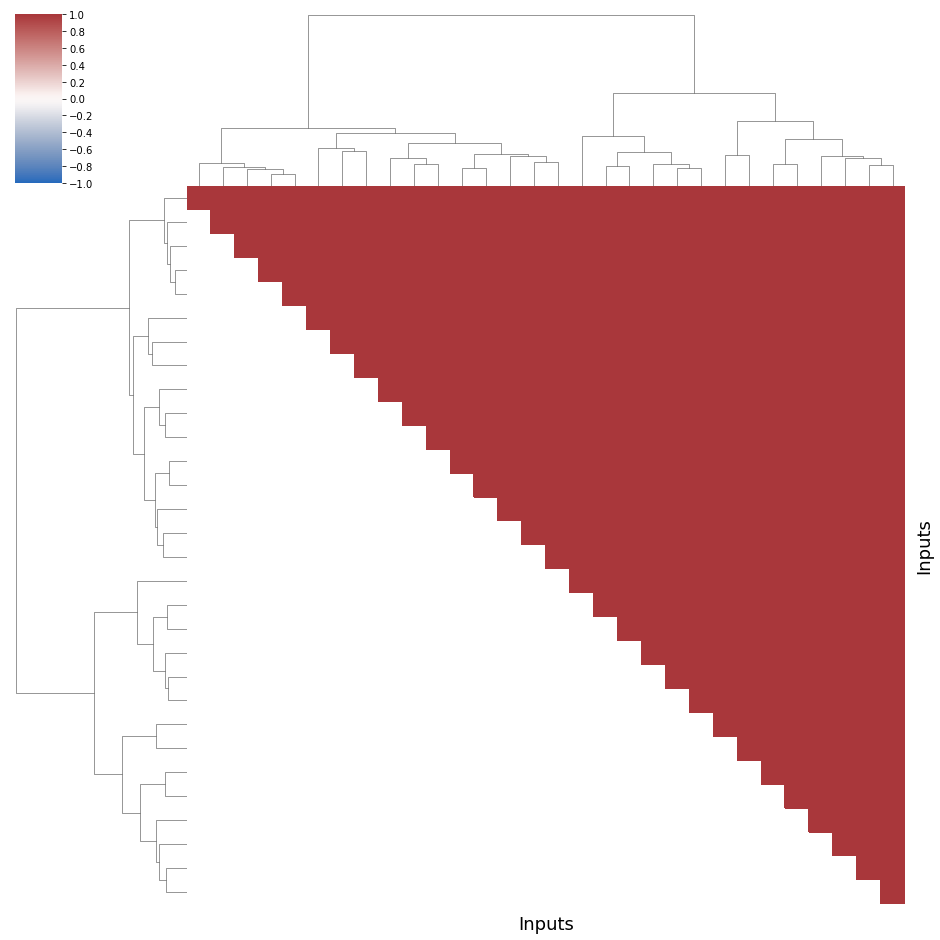

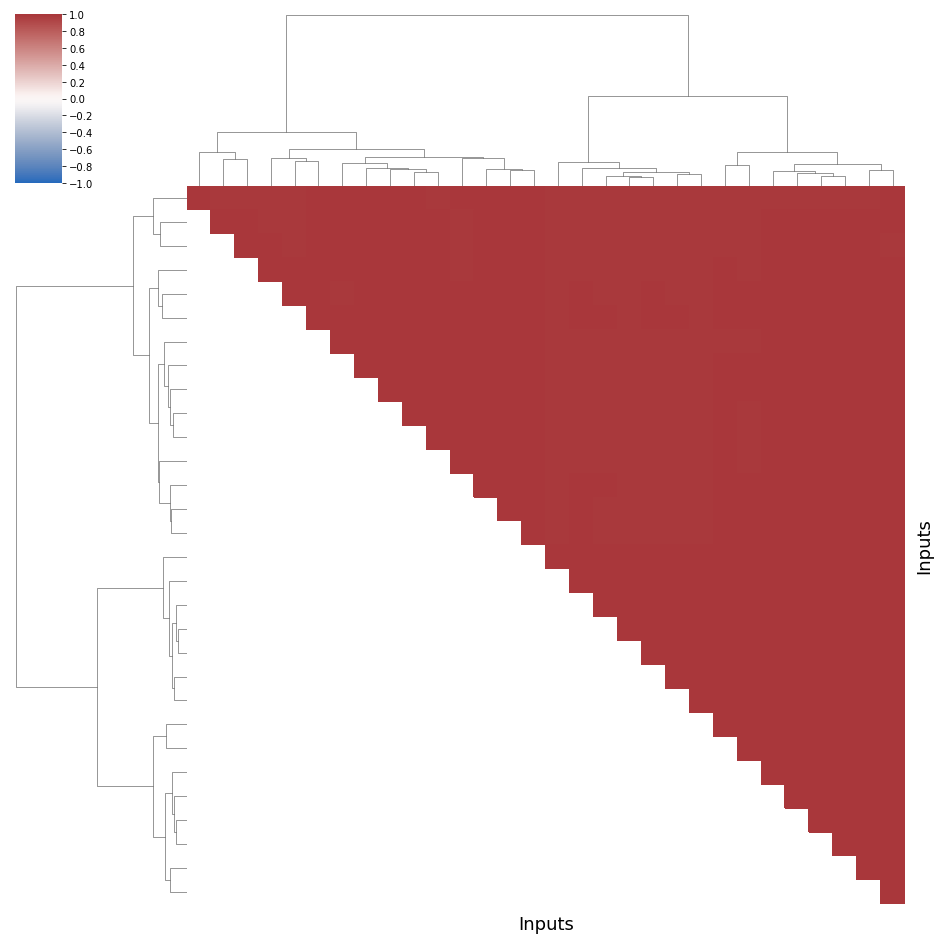

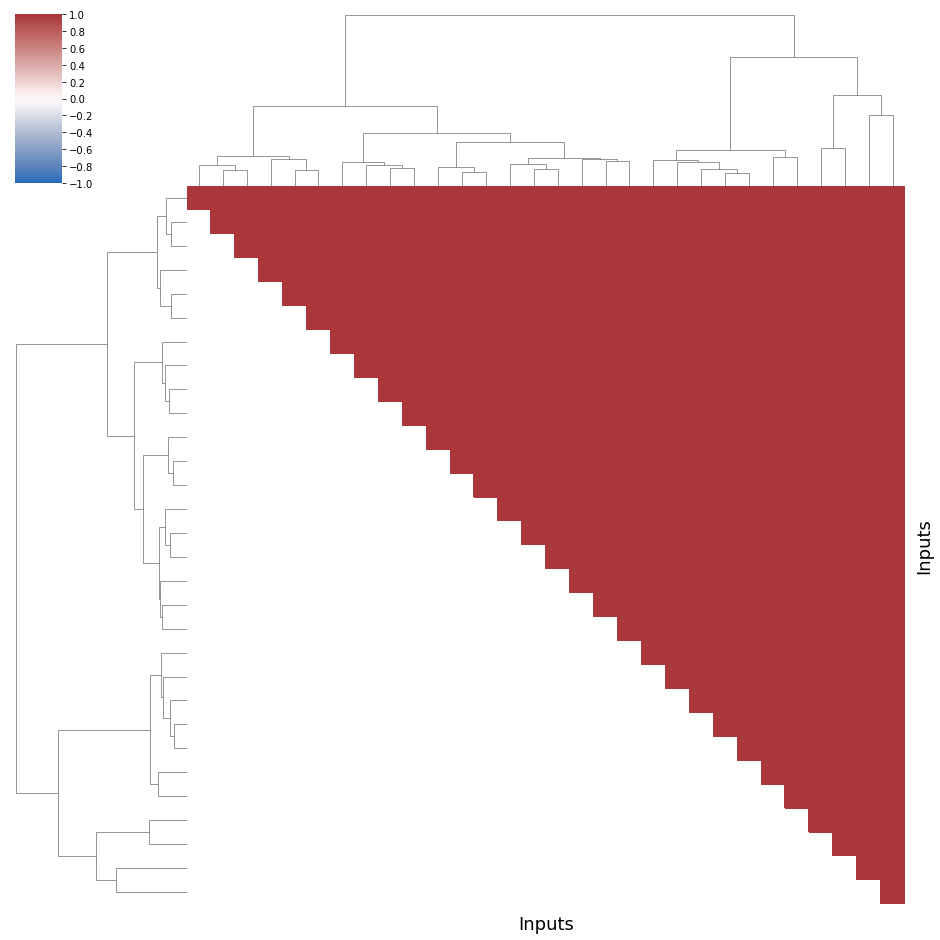

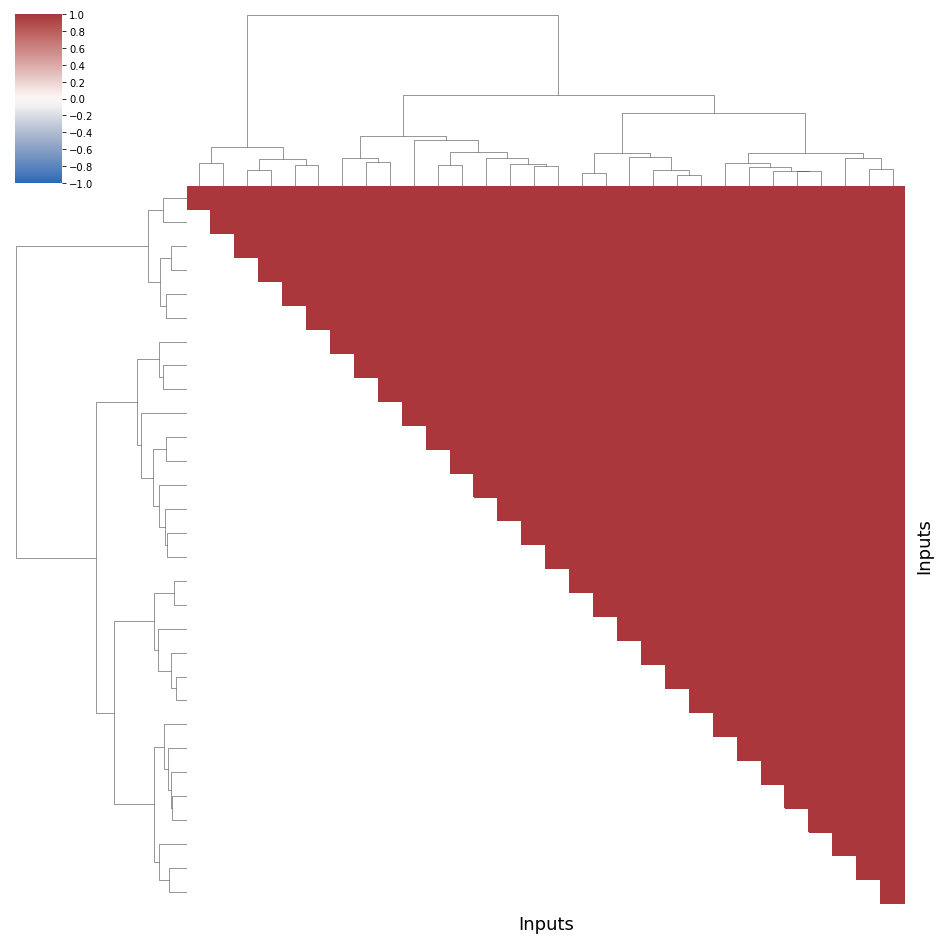

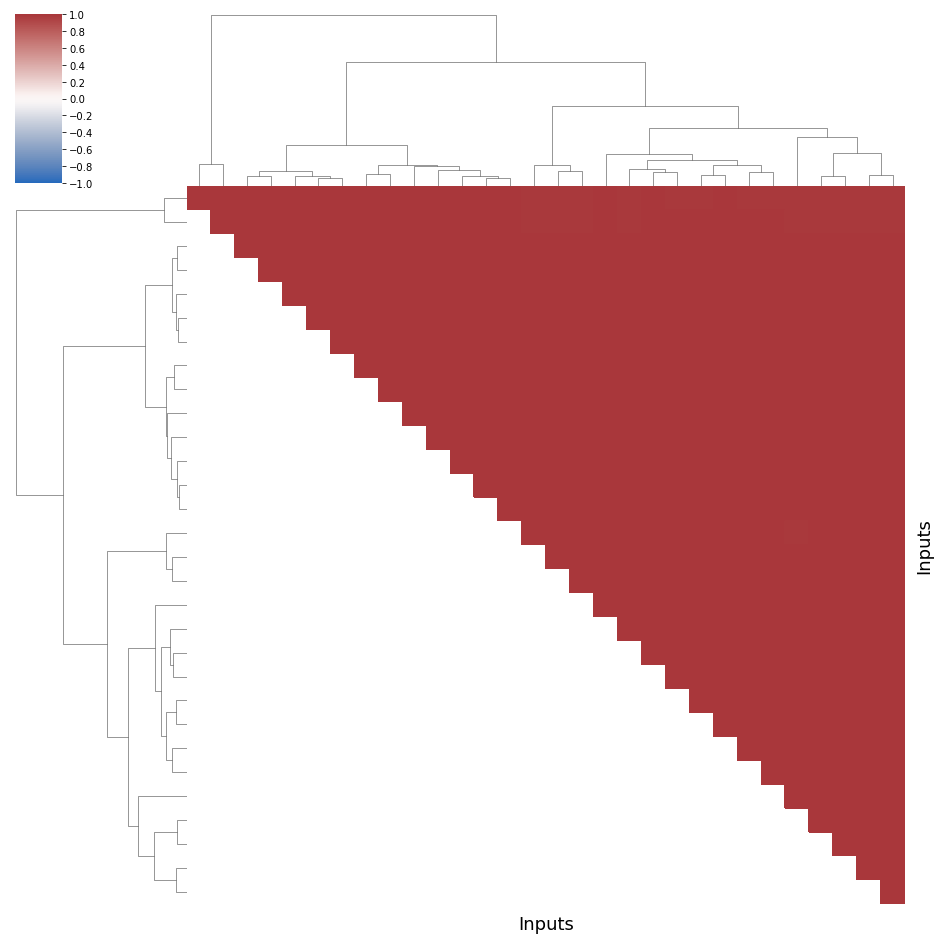

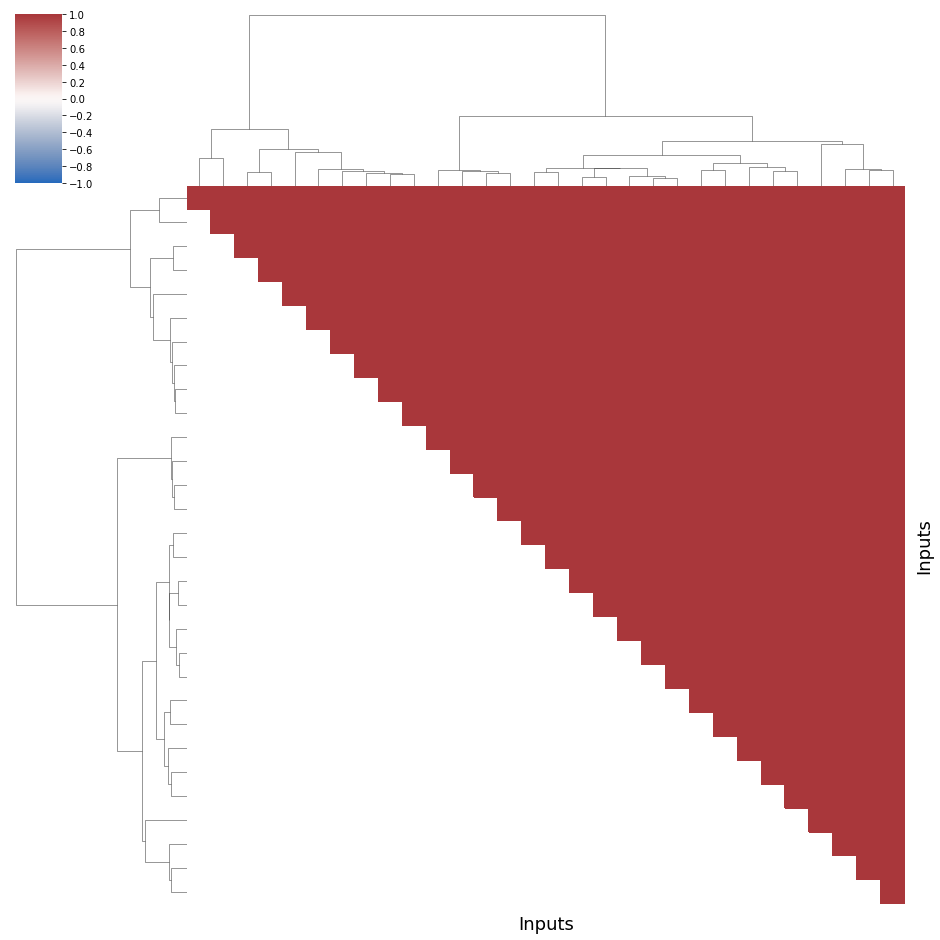

In [40]:
for index_input in range(inputs_count):
    plot_correlationmatrix_dendogram_hard(index_input, "etime")

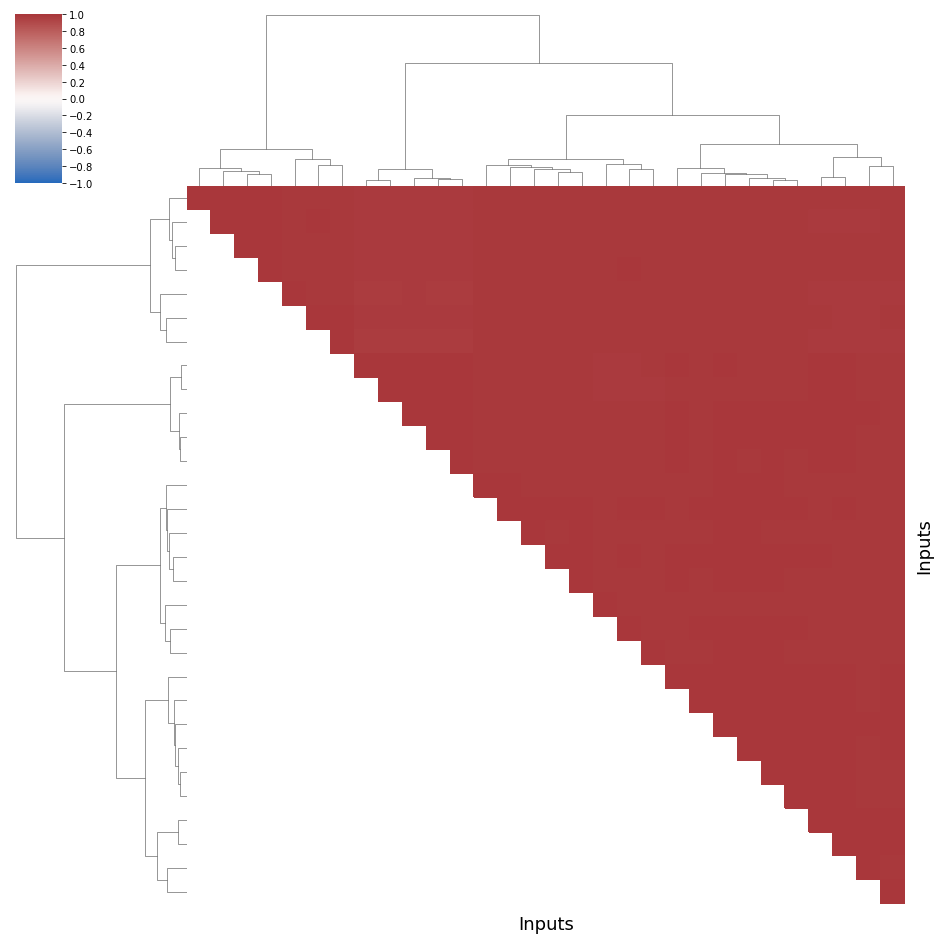

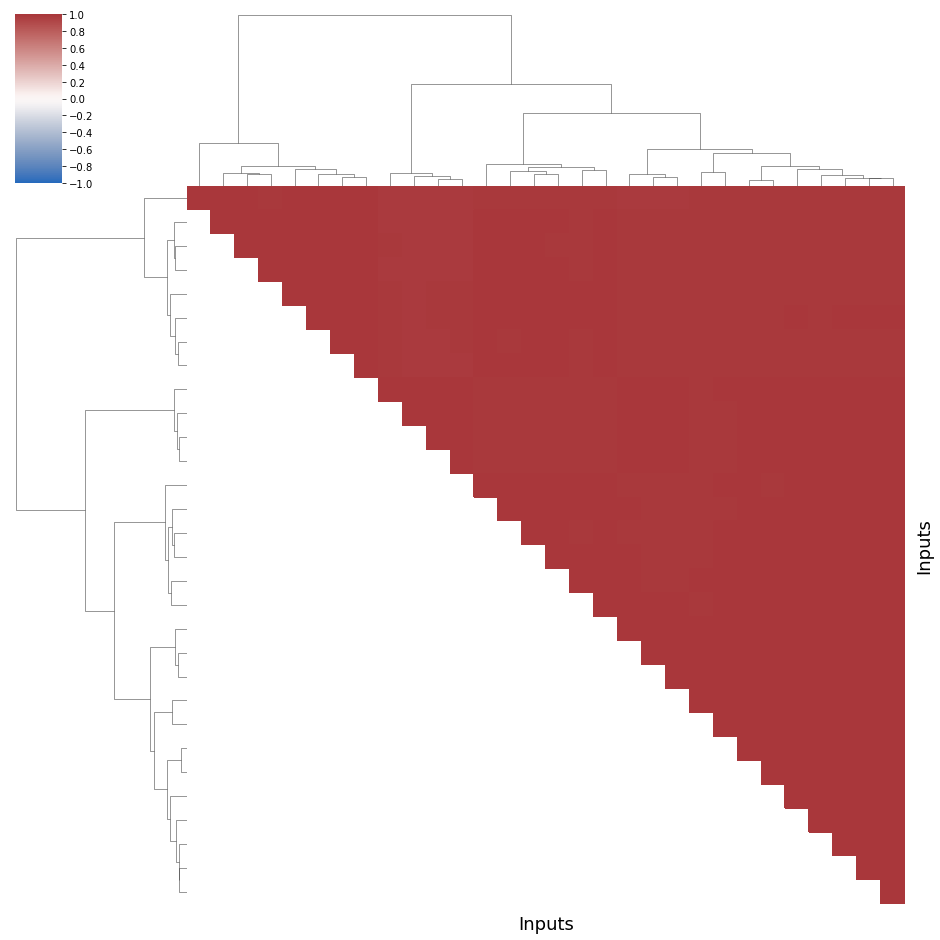

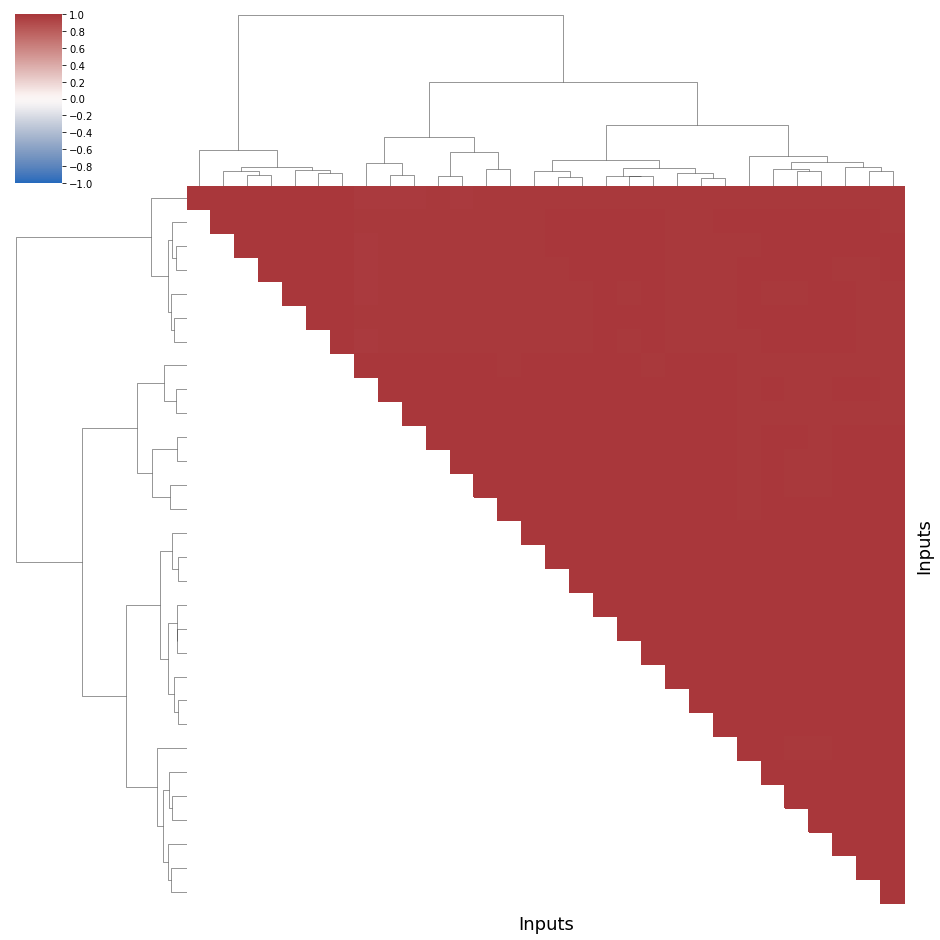

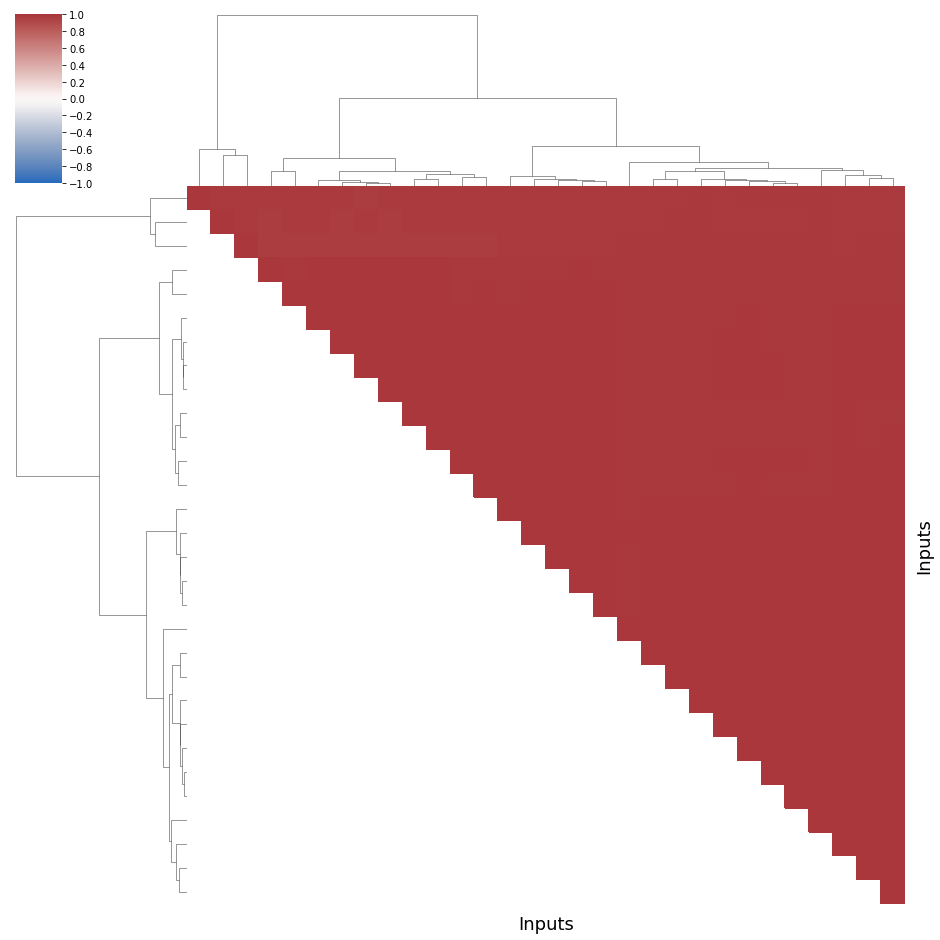

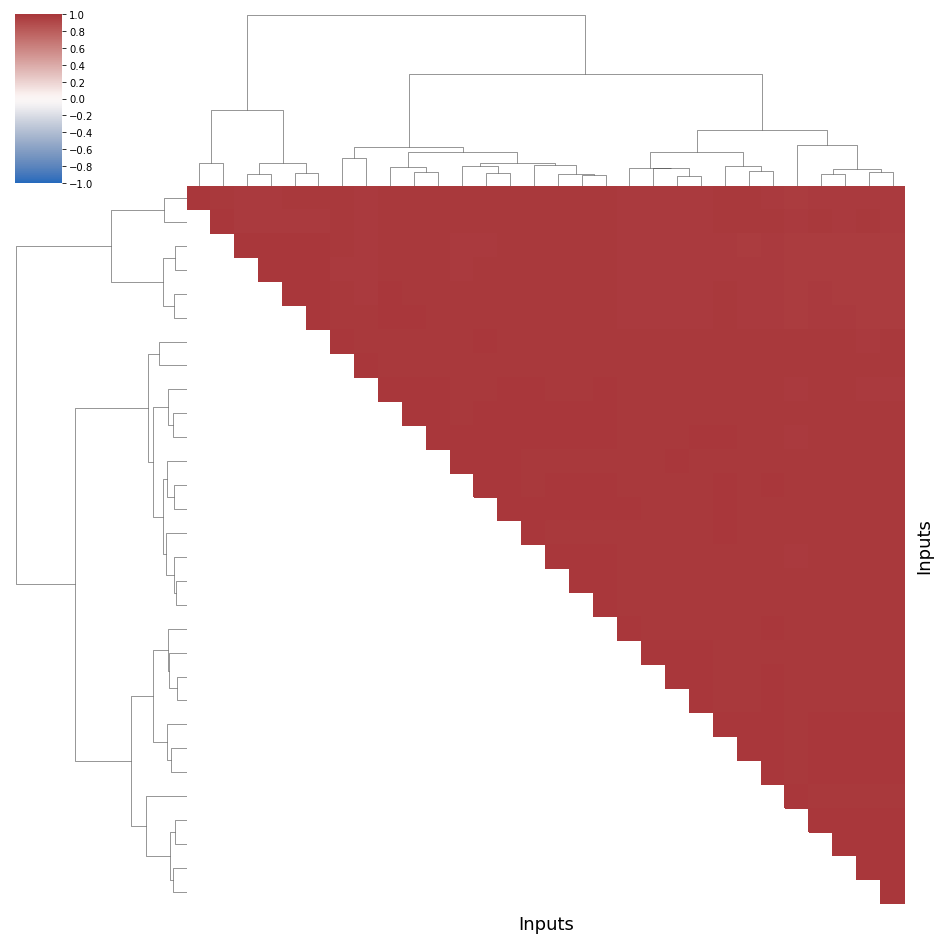

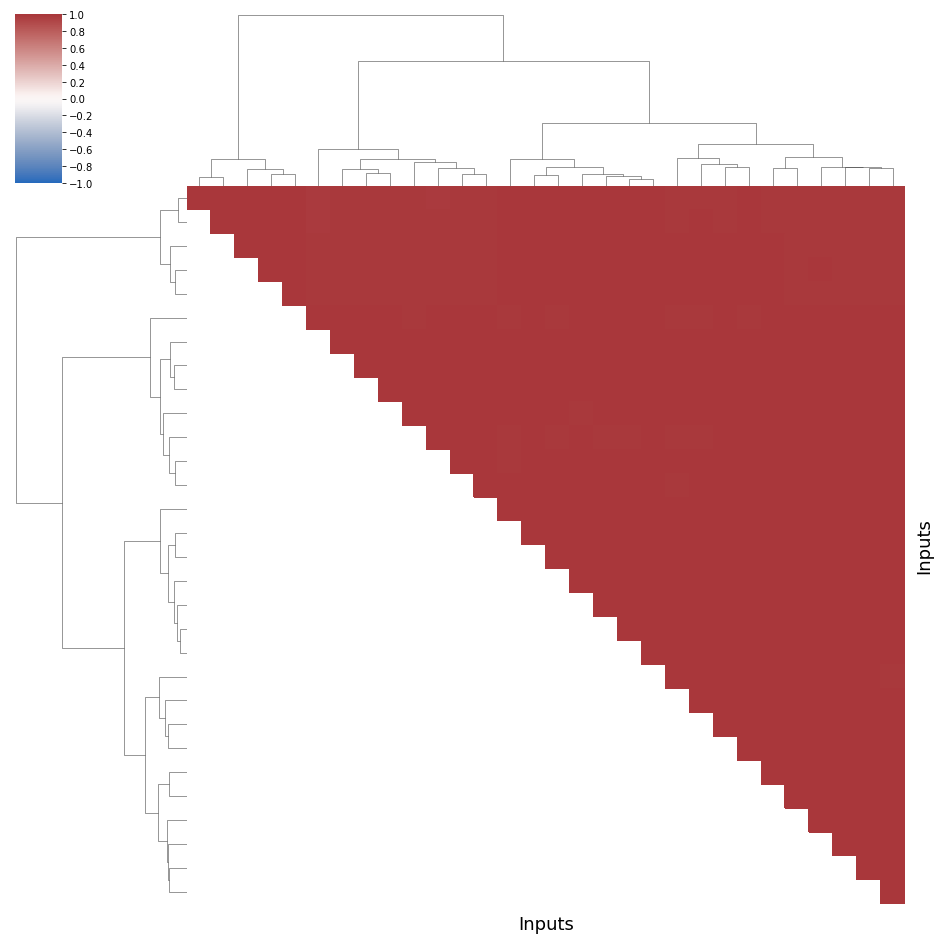

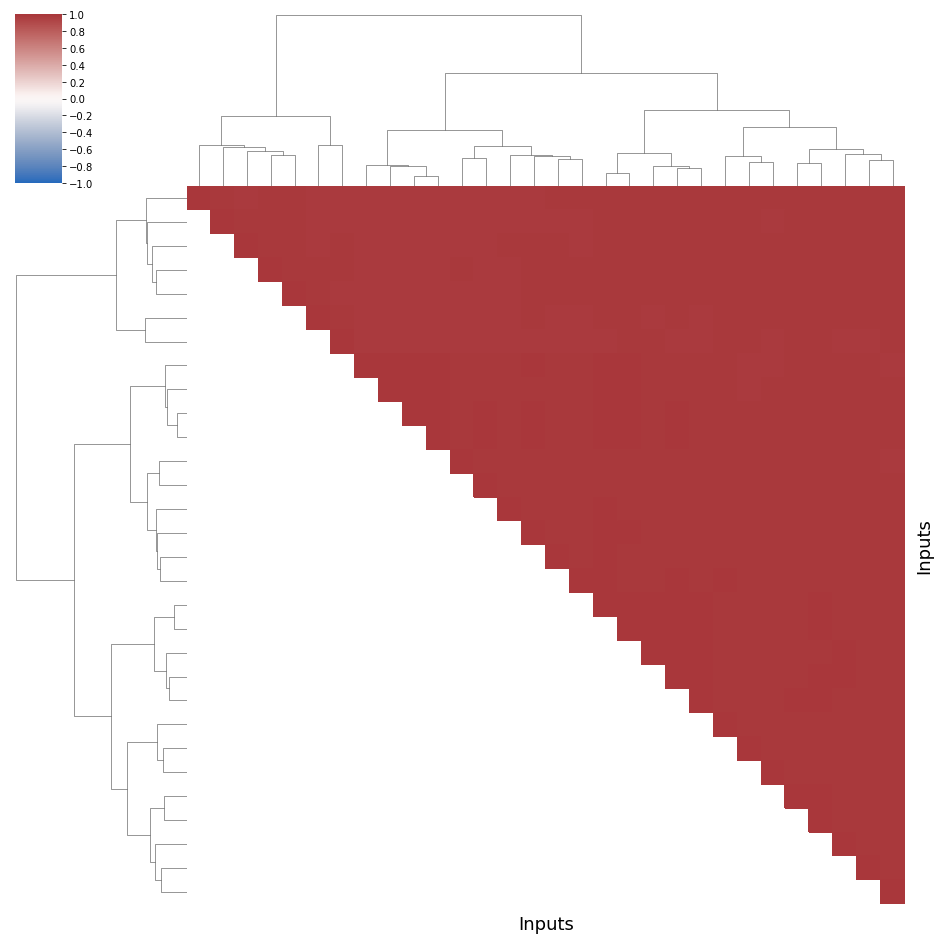

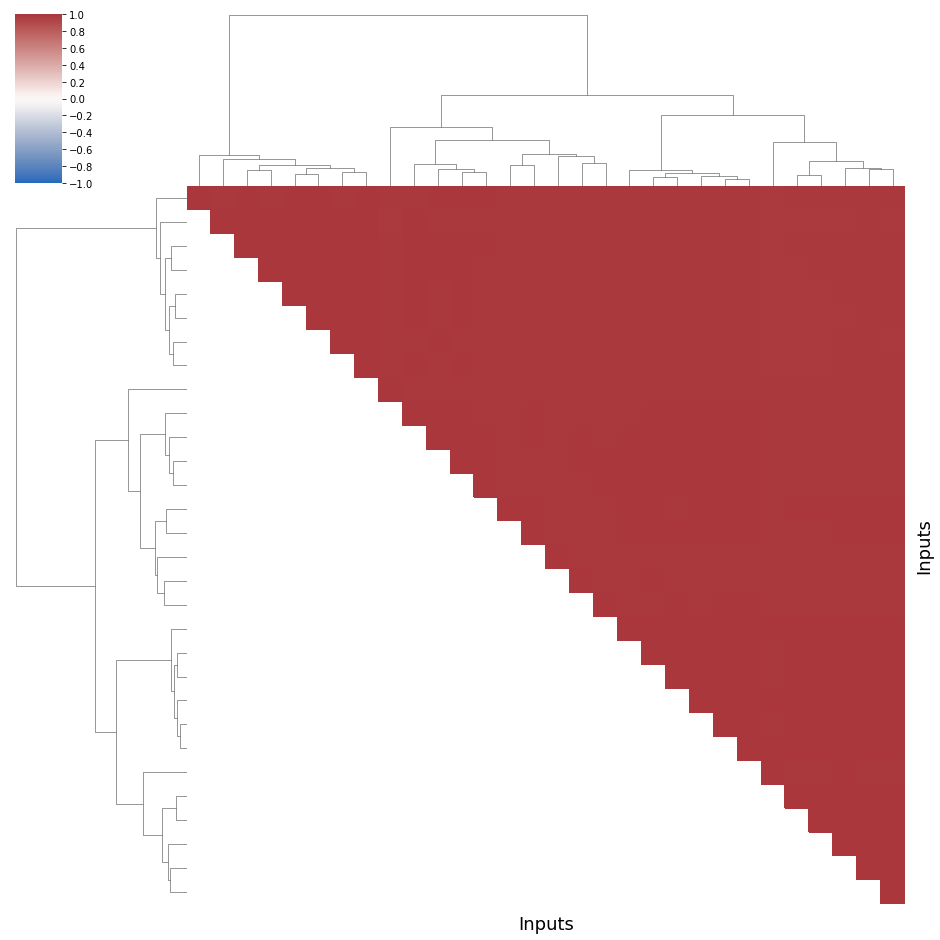

In [41]:
for index_input in range(inputs_count):
    plot_correlationmatrix_dendogram_hard(index_input, "fps")